In [1]:
import scvi
from scvi.dataloaders import SemiSupervisedDataSplitter, DataSplitter
from scvi.model import SCANVI
# import scarches as sca
import scib

import scanpy as sc
import pandas as pd
import numpy as np

Global seed set to 0
During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


In [2]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [3]:
url = "https://figshare.com/ndownloader/files/24539828"
adata = sc.read("pancreas.h5ad", backup_url=url)
print(adata)

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}


AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    layers: 'counts'


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/tech' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/tech' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/celltype' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/celltype' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/home/icb/soroor.h

In [4]:
adata.obs.tech.value_counts()

inDrop3       3605
smartseq2     2394
celseq2       2285
inDrop1       1937
inDrop2       1724
smarter       1492
inDrop4       1303
celseq        1004
fluidigmc1     638
Name: tech, dtype: int64

In [5]:
query = np.array([s in ["smartseq2", "celseq2"] for s in adata.obs.tech])

adata_ref = adata[~query].copy()
adata_query = adata[query].copy()

In [6]:
sc.pp.highly_variable_genes(
    adata_ref,
    n_top_genes=2000,
    batch_key="tech",
    subset=True
)

adata_query = adata_query[:, adata_ref.var_names].copy()

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/

In [7]:
scvi.model.SCVI.setup_anndata(adata_ref, batch_key="tech", layer="counts")

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [8]:
arches_params = dict(
    use_layer_norm="both",
    use_batch_norm="none",
    encode_covariates=True,
    dropout_rate=0.2,
    n_layers=2,
)

# vae_ref = scvi.model.SCVI(
#     adata_ref,
#     **arches_params
# )
# vae_ref.train()

In [9]:
dir_path = "../../notebooks/pancreas_model/"
# vae_ref.save(dir_path, overwrite=True)

In [10]:
vae_ref = scvi.model.SCVI.load(dir_path, adata_ref)

INFO     File ../../notebooks/pancreas_model/model.pt already downloaded                     


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [11]:
vae_ref

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 2, dropout_rate: 0.2, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Trained

In [12]:
vae_ref.summary_stats

attrdict({'n_cells': 11703, 'n_vars': 2000, 'n_batch': 7, 'n_labels': 1, 'n_extra_categorical_covs': 0, 'n_extra_continuous_covs': 0})

In [13]:
adata_ref.obsm["X_scVI"] = vae_ref.get_latent_representation(adata_ref)
sc.pp.neighbors(adata_ref, use_rep="X_scVI")
# sc.tl.leiden(adata_full)
sc.tl.umap(adata_ref)

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/np/arraymath.py:3806: DeprecationWarning: `np.MachAr` is deprecated (NumPy 1.22).
  @overload(np.MachAr)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you spe

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val ==

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and 

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val ==

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val ==

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val ==

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (hasattr(numpy, value)
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1526: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  and def_val ==

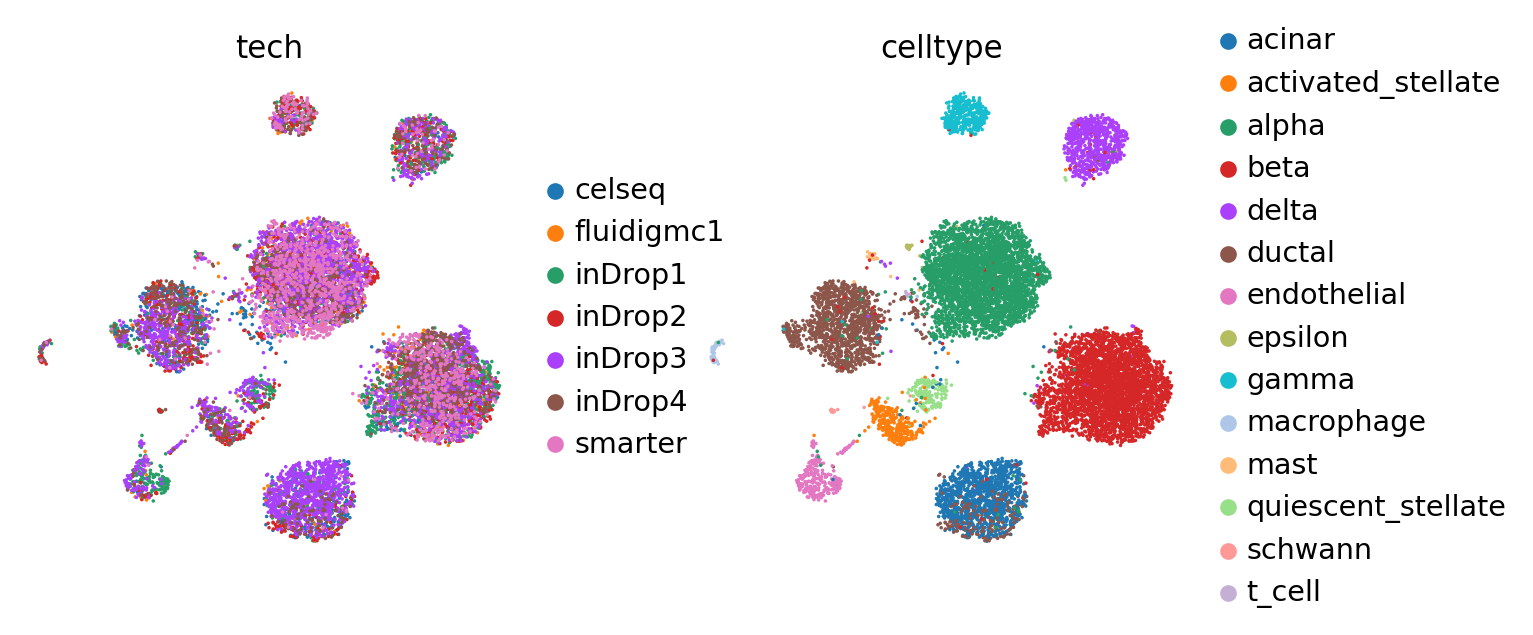

In [14]:
sc.pl.umap(
    adata_ref,
    color=["tech", "celltype"],
    frameon=False,
    ncols=2,
#     save = 'pancreas_scvi.png'
)

In [15]:
scvi.model.SCVI.setup_anndata(adata_query, batch_key="tech", layer="counts")

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [26]:
vae_q = scvi.model.SCVI.load_query_data(
    adata_query,
    dir_path,
    unfrozen = True
)


INFO     File ../../notebooks/pancreas_model/model.pt already downloaded                     


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [17]:
splitter = DataSplitter(vae_ref.adata_manager,  train_size = 0.6) # unknown_label

splitter.setup()
train_dl = splitter.train_dataloader()

In [18]:
from copy import deepcopy

import torch
from torch import nn
from torch.nn import functional as F
from torch.autograd import Variable
import torch.utils.data
from torch.utils.data.dataloader import DataLoader

from scvi.module import VAE


# device = 'cpu'
device = 'cuda'

def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)


class EWC_SCVI(object):
    def __init__(self, model: VAE, dataset: DataLoader):

        self.model = model
        self.dataset = dataset
        self.n_batch = model.n_batch
        

        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad and p.grad != None} # and p.grad != None
        self.param_list = [n for n, p in self.params.items()] 
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)
#             if n in self.param_list:
#                 p.data.zero_()
#                 precision_matrices[n] = variable(p.data)

        self.model.eval()
        for i, batch_data in enumerate(self.dataset):
#             batch_data = batch_data[0]  # uncomment for ref
            for key, batch in batch_data.items():
                batch_data[key] = variable(batch.to(device))
            self.model.zero_grad()
            inference_input = self.model._get_inference_input(batch_data)
            inference_outputs = self.model.inference(**inference_input)
            generative_inputs = self.model._get_generative_input(batch_data, inference_outputs)
            generative_outputs = self.model.generative(**generative_inputs)
            for key, i_outs in inference_outputs.items():
                try:
                    inference_outputs[key] = i_outs.to(device)
                except AttributeError:
                    pass
                
            for key, gen_outs in generative_outputs.items():
                try:
                    generative_outputs[key] = gen_outs.to(device)
                except AttributeError:
                    pass
                
            loss = self.model.loss(batch_data, inference_outputs, generative_outputs).loss
#             print(loss)
            loss.backward()

            for n, p in self.model.named_parameters():
                if n in self.param_list:
                    precision_matrices[n].data += p.grad.data.to(device) ** 2 / len(self.dataset)
#                 if n in self.param_list:
#                     precision_matrices[n].data += p.grad.data ** 2 / len(self.dataset)

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model: VAE):
        loss = 0
        for n, p in model.named_parameters():
            p = p.to(device)
            if n in self.param_list:
#                 print(n, p.shape)
                try:
                    _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
                except RuntimeError:
                    j = max(p.shape) - self.n_batch
                    if len(p.shape) > 1:
                        try:
                            _loss = self._precision_matrices[n][:,:j] * (p[:,:j] - self._means[n][:,:j]) ** 2
                        except RuntimeError:
                            j = min(p.shape) - self.n_batch
                            _loss = self._precision_matrices[n][:,:j] * (p[:,:j] - self._means[n][:,:j]) ** 2
                    else:
                        _loss = self._precision_matrices[n][:j] * (p[:j] - self._means[n][:j]) ** 2
                            
                    
                loss += _loss.sum()
        return loss

In [19]:
#Overwrite training plan
from typing import Callable, Optional, Union
from scvi._compat import Literal
from scvi.model import SCVI

from scvi.train._trainingplans import TrainingPlan
from scvi.module.base import BaseModuleClass, LossRecorder

class ContinualTrainingPlan(TrainingPlan):
    """
    Lightning module task for SemiSupervised Training.

    Parameters
    ----------
    module
        A module instance from class ``BaseModuleClass``.
    classification_ratio
        Weight of the classification_loss in loss function
    lr
        Learning rate used for optimization :class:`~torch.optim.Adam`.
    weight_decay
        Weight decay used in :class:`~torch.optim.Adam`.
    n_steps_kl_warmup
        Number of training steps (minibatches) to scale weight on KL divergences from 0 to 1.
        Only activated when `n_epochs_kl_warmup` is set to None.
    n_epochs_kl_warmup
        Number of epochs to scale weight on KL divergences from 0 to 1.
        Overrides `n_steps_kl_warmup` when both are not `None`.
    reduce_lr_on_plateau
        Whether to monitor validation loss and reduce learning rate when validation set
        `lr_scheduler_metric` plateaus.
    lr_factor
        Factor to reduce learning rate.
    lr_patience
        Number of epochs with no improvement after which learning rate will be reduced.
    lr_threshold
        Threshold for measuring the new optimum.
    lr_scheduler_metric
        Which metric to track for learning rate reduction.
    **loss_kwargs
        Keyword args to pass to the loss method of the `module`.
        `kl_weight` should not be passed here and is handled automatically.
    """

    def __init__(
        self,
        module: BaseModuleClass,
        old_task_dl: DataLoader,
        old_model: SCVI,
        ewc: EWC_SCVI,
        importance: float=0.1,
        lr=1e-3,
        weight_decay=1e-6,
        n_steps_kl_warmup: Union[int, None] = None,
        n_epochs_kl_warmup: Union[int, None] = 400,
        reduce_lr_on_plateau: bool = False,
        lr_factor: float = 0.6,
        lr_patience: int = 30,
        lr_threshold: float = 0.0,
        lr_scheduler_metric: Literal[
            "elbo_validation", "reconstruction_loss_validation", "kl_local_validation"
        ] = "elbo_validation",
        **loss_kwargs,
    ):
        super(ContinualTrainingPlan, self).__init__(
            module=module,
            lr=lr,
            weight_decay=weight_decay,
            n_steps_kl_warmup=n_steps_kl_warmup,
            n_epochs_kl_warmup=n_epochs_kl_warmup,
            reduce_lr_on_plateau=reduce_lr_on_plateau,
            lr_factor=lr_factor,
            lr_patience=lr_patience,
            lr_threshold=lr_threshold,
            lr_scheduler_metric=lr_scheduler_metric,
            **loss_kwargs,
        )
        self.old_task_dl = old_task_dl
        self.old_model = old_model
        self.ewccls=ewc(old_model, old_task_dl)
#         self.ewc = ewc
        self.importance = importance

    def training_step(self, batch, batch_idx, optimizer_idx=0):
        # Potentially dangerous if batch is from a single dataloader with two keys
        if len(batch) == 2:
            full_dataset = batch[0]
            labelled_dataset = batch[1]
        else:
            full_dataset = batch
            labelled_dataset = None

        if "kl_weight" in self.loss_kwargs:
            self.loss_kwargs.update({"kl_weight": self.kl_weight})
        _, _, scvi_losses = self.forward(full_dataset, loss_kwargs=self.loss_kwargs)
        loss = scvi_losses.loss
#         ewc = self.ewc
#         ewccls = ewc(self.module, self.old_task_dl)
#         self.ewccls = ewccls
        ewc_penalty = self.ewccls.penalty(self.module)
        loss = loss + self.importance * ewc_penalty
#         loss = 0.001*loss + self.importance * ewc_penalty

        print("ewc loss {}".format(ewc_penalty))
        self.log(
            "train_loss",
            loss,
            on_epoch=True,
            batch_size=len(scvi_losses.reconstruction_loss),
        )
    
        self.log(
            "ewc_loss",
            ewc_penalty,
            on_epoch=True,
            batch_size=len(scvi_losses.reconstruction_loss),
        )
        self.compute_and_log_metrics(scvi_losses, self.elbo_train)
        return loss


    def validation_step(self, batch, batch_idx, optimizer_idx=0):
        # Potentially dangerous if batch is from a single dataloader with two keys
        if len(batch) == 2:
            full_dataset = batch[0]
            labelled_dataset = batch[1]
        else:
            full_dataset = batch
            labelled_dataset = None

        
        _, _, scvi_losses = self.forward(full_dataset, loss_kwargs=self.loss_kwargs)
        loss = scvi_losses.loss
#         ewc = self.ewccls
#         self.ewccls = ewc(self.module, self.old_task_dl)
        ewc_penalty = self.ewccls.penalty(self.module)
#         loss = 0.001*loss + self.importance * ewc_penalty
        loss = loss + self.importance * self.ewccls.penalty(self.module)
        self.log(
            "validation_loss",
            loss,
            on_epoch=True,
            batch_size=len(scvi_losses.reconstruction_loss),
        )
        self.compute_and_log_metrics(scvi_losses, self.elbo_val)

In [20]:
import logging
import warnings
from typing import Optional, Union

import numpy as np
import pandas as pd
import pytorch_lightning as pl

from scvi.dataloaders import DataSplitter, SemiSupervisedDataSplitter
from scvi.model._utils import parse_use_gpu_arg
from scvi.model.base import BaseModelClass
from scvi.train import Trainer

logger = logging.getLogger(__name__)
class ContinualTrainRunner:
    """
    TrainRunner calls Trainer.fit() and handles pre and post training procedures.

    Parameters
    ----------
    model
        model to train
    training_plan
        initialized TrainingPlan
    data_splitter
        initialized :class:`~scvi.dataloaders.SemiSupervisedDataSplitter` or
        :class:`~scvi.dataloaders.DataSplitter`
    max_epochs
        max_epochs to train for
    use_gpu
        Use default GPU if available (if None or True), or index of GPU to use (if int),
        or name of GPU (if str, e.g., `'cuda:0'`), or use CPU (if False).
    trainer_kwargs
        Extra kwargs for :class:`~scvi.train.Trainer`

    Examples
    --------
    >>> # Following code should be within a subclass of BaseModelClass
    >>> data_splitter = DataSplitter(self.adata)
    >>> training_plan = TrainingPlan(self.module, len(data_splitter.train_idx))
    >>> runner = TrainRunner(
    >>>     self,
    >>>     training_plan=trianing_plan,
    >>>     data_splitter=data_splitter,
    >>>     max_epochs=max_epochs)
    >>> runner()
    """

    def __init__(
        self,
        model: BaseModelClass,
        training_plan: pl.LightningModule,
        data_splitter: Union[SemiSupervisedDataSplitter, DataSplitter],
        max_epochs: int,
        use_gpu: Optional[Union[str, int, bool]] = None,
        **trainer_kwargs,
    ):
        self.training_plan = training_plan
        self.data_splitter = data_splitter
        self.model = model
        gpus, device = parse_use_gpu_arg(use_gpu)
        self.gpus = gpus
        self.device = device
        self.trainer = Trainer(max_epochs=max_epochs, gpus=gpus, **trainer_kwargs)

    def __call__(self):
        if hasattr(self.data_splitter, "n_train"):
            self.training_plan.n_obs_training = self.data_splitter.n_train
        if hasattr(self.data_splitter, "n_val"):
            self.training_plan.n_obs_validation = self.data_splitter.n_val

        self.trainer.fit(self.training_plan, self.data_splitter)
        self._update_history()

        # data splitter only gets these attrs after fit
        self.model.train_indices = self.data_splitter.train_idx
        self.model.test_indices = self.data_splitter.test_idx
        self.model.validation_indices = self.data_splitter.val_idx

        self.model.model.module.eval()
        self.model.is_trained_ = True
        self.model.model.is_trained_ = True
        self.model.model.to_device(self.device)
        self.model.trainer = self.trainer
        self.model.model.trainer = self.trainer


    def _update_history(self):
        # model is being further trained
        # this was set to true during first training session
        if self.model.is_trained_ is True:
            # if not using the default logger (e.g., tensorboard)
            if not isinstance(self.model.history_, dict):
                warnings.warn(
                    "Training history cannot be updated. Logger can be accessed from model.trainer.logger"
                )
                return
            else:
                new_history = self.trainer.logger.history
                for key, val in self.model.history_.items():
                    # e.g., no validation loss due to training params
                    if key not in new_history:
                        continue
                    prev_len = len(val)
                    new_len = len(new_history[key])
                    index = np.arange(prev_len, prev_len + new_len)
                    new_history[key].index = index
                    self.model.history_[key] = pd.concat(
                        [
                            val,
                            new_history[key],
                        ]
                    )
                    self.model.history_[key].index.name = val.index.name
        else:
            # set history_ attribute if it exists
            # other pytorch lightning loggers might not have history attr
            try:
                self.model.history_ = self.trainer.logger.history
            except AttributeError:
                self.history_ = None

In [21]:
## overwrite the train function for the whole model class
## through inherentence etc i.e. a wrapper around SCANVI class
import logging
import warnings
from copy import deepcopy
from typing import List, Optional, Sequence, Union

import numpy as np
import pandas as pd
import torch
from anndata import AnnData

from scvi import REGISTRY_KEYS
from scvi._compat import Literal
from scvi.data import AnnDataManager
from scvi.data._constants import _SETUP_ARGS_KEY
from scvi.data._utils import get_anndata_attribute
from scvi.data.fields import (
    CategoricalJointObsField,
    CategoricalObsField,
    LabelsWithUnlabeledObsField,
    LayerField,
    NumericalJointObsField,
    NumericalObsField,
)
from scvi.dataloaders import DataSplitter
from scvi.model._utils import _init_library_size
from scvi.module import VAE
# from scvi.train import SemiSupervisedTrainingPlan, TrainRunner
from scvi.train import TrainRunner
from scvi.train._callbacks import SubSampleLabels
from scvi.utils import setup_anndata_dsp

from scvi.model._scvi import SCVI
from scvi.model.base import ArchesMixin, BaseModelClass, RNASeqMixin, VAEMixin

logger = logging.getLogger(__name__)


class SCVI_CL(SCVI):
    """
    Single-cell annotation using variational inference [Xu21]_.

    Inspired from M1 + M2 model, as described in (https://arxiv.org/pdf/1406.5298.pdf).

    Parameters
    ----------
    adata
        AnnData object that has been registered via :meth:`~scvi.model.SCANVI.setup_anndata`.
    n_hidden
        Number of nodes per hidden layer.
    n_latent
        Dimensionality of the latent space.
    n_layers
        Number of hidden layers used for encoder and decoder NNs.
    dropout_rate
        Dropout rate for neural networks.
    dispersion
        One of the following:

        * ``'gene'`` - dispersion parameter of NB is constant per gene across cells
        * ``'gene-batch'`` - dispersion can differ between different batches
        * ``'gene-label'`` - dispersion can differ between different labels
        * ``'gene-cell'`` - dispersion can differ for every gene in every cell
    gene_likelihood
        One of:

        * ``'nb'`` - Negative binomial distribution
        * ``'zinb'`` - Zero-inflated negative binomial distribution
        * ``'poisson'`` - Poisson distribution
    **model_kwargs
        Keyword args for :class:`~scvi.module.SCANVAE`

    Examples
    --------
    >>> adata = anndata.read_h5ad(path_to_anndata)
    >>> scvi.model.SCANVI.setup_anndata(adata, batch_key="batch", labels_key="labels")
    >>> vae = scvi.model.SCANVI(adata, "Unknown")
    >>> vae.train()
    >>> adata.obsm["X_scVI"] = vae.get_latent_representation()
    >>> adata.obs["pred_label"] = vae.predict()

    Notes
    -----
    See further usage examples in the following tutorials:

    1. :doc:`/tutorials/notebooks/harmonization`
    2. :doc:`/tutorials/notebooks/scarches_scvi_tools`
    3. :doc:`/tutorials/notebooks/seed_labeling`
    """

    def __init__(
        self,
        model: SCVI,
        old_task_dl: DataLoader,
        old_model: SCVI,
        ewc: EWC_SCVI,
        importance: float=0.1
    ):
#         super(SCANVI).__init__()
        self.model = model
        self._model_summary_string = self.model._model_summary_string
        self._is_trained = self.model.is_trained
        self.is_trained_ = self.model.is_trained_
        self.ewccls = ewc
        self.old_task_dl = old_task_dl
        self.old_model = old_model
        self.importance = importance
       


    def train(
        self,
        max_epochs: Optional[int] = None,
        n_samples_per_label: Optional[float] = None,
        check_val_every_n_epoch: Optional[int] = None,
        train_size: float = 0.9,
        validation_size: Optional[float] = None,
        batch_size: int = 128,
        use_gpu: Optional[Union[str, int, bool]] = None,
        plan_kwargs: Optional[dict] = None,
        **trainer_kwargs,
    ):
        """
        Train the model.

        Parameters
        ----------
        max_epochs
            Number of passes through the dataset for semisupervised training.
        n_samples_per_label
            Number of subsamples for each label class to sample per epoch. By default, there
            is no label subsampling.
        check_val_every_n_epoch
            Frequency with which metrics are computed on the data for validation set for both
            the unsupervised and semisupervised trainers. If you'd like a different frequency for
            the semisupervised trainer, set check_val_every_n_epoch in semisupervised_train_kwargs.
        train_size
            Size of training set in the range [0.0, 1.0].
        validation_size
            Size of the test set. If `None`, defaults to 1 - `train_size`. If
            `train_size + validation_size < 1`, the remaining cells belong to a test set.
        batch_size
            Minibatch size to use during training.
        use_gpu
            Use default GPU if available (if None or True), or index of GPU to use (if int),
            or name of GPU (if str, e.g., `'cuda:0'`), or use CPU (if False).
        plan_kwargs
            Keyword args for :class:`~scvi.train.SemiSupervisedTrainingPlan`. Keyword arguments passed to
            `train()` will overwrite values present in `plan_kwargs`, when appropriate.
        **trainer_kwargs
            Other keyword args for :class:`~scvi.train.Trainer`.
        """

        if max_epochs is None:
            n_cells = self.model.adata.n_obs
            max_epochs = np.min([round((20000 / n_cells) * 400), 400])

           

        logger.info("Training for {} epochs.".format(max_epochs))

        plan_kwargs = {} if plan_kwargs is None else plan_kwargs

        

        data_splitter = DataSplitter(
            self.model.adata_manager,
            train_size=train_size,
            validation_size=validation_size,
            batch_size=batch_size,
            use_gpu=use_gpu,
        )
        training_plan = ContinualTrainingPlan(self.model.module,
                                              self.old_task_dl,
                                              self.old_model,
                                              self.ewccls,
                                              self.importance,
                                              **plan_kwargs)
        

        runner = ContinualTrainRunner(
            self,
            training_plan=training_plan,
            data_splitter=data_splitter,
            max_epochs=max_epochs,
            use_gpu=use_gpu,
            check_val_every_n_epoch=check_val_every_n_epoch,
            **trainer_kwargs,
        )
        return runner()

In [27]:
vae_q

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 2, dropout_rate: 0.2, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

In [28]:
vae_cl = SCVI_CL(vae_q, train_dl, vae_ref.module, ewc = EWC_SCVI, importance = 10000)

In [29]:
vae_cl

SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 2, dropout_rate: 0.2, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Not Trained

In [30]:
vae_cl.train(max_epochs=200, plan_kwargs=dict(weight_decay=0.0)) # main fig ran with 500 epochs

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/200:   0%|          | 0/200 [00:00<?, ?it/s]

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0
ewc loss 0.0020919579546898603
ewc loss 0.002013589022681117
ewc loss 0.003001288278028369
ewc loss 0.0041756778955459595
ewc loss 0.004655326250940561
ewc loss 0.00468847993761301
ewc loss 0.004760564770549536
ewc loss 0.005007568746805191
ewc loss 0.005238628014922142
ewc loss 0.005267384462058544
ewc loss 0.00507207028567791
ewc loss 0.004836400970816612


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0047054593451321125
ewc loss 0.004683987237513065
ewc loss 0.004686461761593819
ewc loss 0.004615373909473419
ewc loss 0.004494986496865749
ewc loss 0.004391341935843229
ewc loss 0.004361900966614485
ewc loss 0.004378770012408495
ewc loss 0.004412136040627956
ewc loss 0.004410581663250923
ewc loss 0.004385349806398153
ewc loss 0.004375751130282879
ewc loss 0.004390153102576733
ewc loss 0.004428338259458542
ewc loss 0.004433693829923868
ewc loss 0.00440754322335124
ewc loss 0.004351743962615728
ewc loss 0.004305425565689802
ewc loss 0.004275151062756777
ewc loss 0.004253722727298737
Epoch 2/200:   0%|          | 1/200 [00:01<04:32,  1.37s/it, loss=1.84e+03, v_num=1]ewc loss 0.0042213620617985725
ewc loss 0.004186219070106745
ewc loss 0.004162654746323824
ewc loss 0.0041660224087536335
ewc loss 0.004175207111984491


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.004173743072897196
ewc loss 0.004168160259723663
ewc loss 0.004148752894252539
ewc loss 0.00411630654707551
ewc loss 0.004094666335731745
ewc loss 0.0040706149302423
ewc loss 0.004050947725772858


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.004018929321318865
ewc loss 0.004006252624094486
ewc loss 0.004004320129752159
ewc loss 0.004019535146653652
ewc loss 0.004023949149996042
ewc loss 0.00402741227298975
ewc loss 0.004049875773489475
ewc loss 0.00410184171050787
ewc loss 0.00419194670394063
ewc loss 0.004291990771889687
ewc loss 0.004363138694316149
ewc loss 0.0044017937034368515
ewc loss 0.004396531265228987
ewc loss 0.00436268700286746
ewc loss 0.004307643976062536
ewc loss 0.00424509821459651
ewc loss 0.0042012413032352924
ewc loss 0.004173316527158022
ewc loss 0.004158742260187864
ewc loss 0.004148358944803476
ewc loss 0.004138940013945103
Epoch 3/200:   1%|          | 2/200 [00:02<04:14,  1.28s/it, loss=1.81e+03, v_num=1]ewc loss 0.004141364246606827
ewc loss 0.004134824965149164
ewc loss 0.004121404606848955
ewc loss 0.004090169910341501
ewc loss 0.004059436731040478


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0040407245978713036
ewc loss 0.004040428437292576
ewc loss 0.004039245191961527
ewc loss 0.004039971623569727
ewc loss 0.004060324747115374
ewc loss 0.004094697535037994
ewc loss 0.004137372598052025
ewc loss 0.004175063222646713
ewc loss 0.0042045097798109055
ewc loss 0.004221042618155479
ewc loss 0.004219336435198784
ewc loss 0.004198302049189806
ewc loss 0.004153327085077763
ewc loss 0.004089788533747196
ewc loss 0.00404846016317606
ewc loss 0.0040110573172569275
ewc loss 0.003982552792876959
ewc loss 0.0039617447182536125
ewc loss 0.003948625177145004
ewc loss 0.003943155985325575
ewc loss 0.0039498768746852875
ewc loss 0.00397337693721056
ewc loss 0.004035302437841892
ewc loss 0.0040997788310050964
ewc loss 0.004152272827923298
ewc loss 0.004169974010437727
ewc loss 0.004157756920903921
ewc loss 0.004123118240386248
Epoch 4/200:   2%|▏         | 3/200 [00:03<04:07,  1.26s/it, loss=1.77e+03, v_num=1]ewc loss 0.004092952702194452
ewc loss 0.0040595452301204205
ewc loss 0.

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003992808982729912
ewc loss 0.003971110563725233
ewc loss 0.003942103590816259
ewc loss 0.0039260657504200935
ewc loss 0.003941754344850779
ewc loss 0.003976256586611271
ewc loss 0.003993683960288763
ewc loss 0.004030873533338308
ewc loss 0.004036977421492338
ewc loss 0.0040212064050138
ewc loss 0.00399887515231967
ewc loss 0.0039748819544911385
ewc loss 0.0039480943232774734
ewc loss 0.003938706591725349
ewc loss 0.00394344562664628
ewc loss 0.003959796391427517
ewc loss 0.003975349944084883
ewc loss 0.0039838929660618305
ewc loss 0.0039832694455981255
ewc loss 0.0039817714132368565
ewc loss 0.0039761667139828205
ewc loss 0.003971266560256481
ewc loss 0.0039765601977705956
ewc loss 0.003968274686485529
ewc loss 0.003949186764657497
ewc loss 0.003926350735127926
ewc loss 0.0039131296798586845
ewc loss 0.003903000382706523
Epoch 5/200:   2%|▏         | 4/200 [00:05<04:03,  1.24s/it, loss=1.77e+03, v_num=1]ewc loss 0.0038961595855653286
ewc loss 0.003898952156305313
ewc loss 0

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0038352706469595432
ewc loss 0.0038431810680776834
ewc loss 0.0038558323867619038
ewc loss 0.003861691802740097
ewc loss 0.003863878780975938
ewc loss 0.0038626904133707285
ewc loss 0.0038567206356674433
ewc loss 0.0038475042674690485


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003842343110591173
ewc loss 0.0038421889767050743
ewc loss 0.0038510356098413467
ewc loss 0.00385258044116199
ewc loss 0.00384754640981555
ewc loss 0.0038542342372238636
ewc loss 0.003842972917482257
ewc loss 0.003817965742200613
ewc loss 0.0037895275745540857
ewc loss 0.003770175389945507
ewc loss 0.0037528504617512226
ewc loss 0.003739113686606288
ewc loss 0.0037267969455569983
ewc loss 0.003737576538696885
ewc loss 0.0037618575152009726
ewc loss 0.003774397075176239
ewc loss 0.003783558728173375
ewc loss 0.003782185958698392
ewc loss 0.0037787866313010454
ewc loss 0.0037760490085929632
Epoch 6/200:   2%|▎         | 5/200 [00:06<04:00,  1.24s/it, loss=1.77e+03, v_num=1]ewc loss 0.003781937062740326
ewc loss 0.0037832842208445072
ewc loss 0.0037784769665449858
ewc loss 0.0037631383165717125
ewc loss 0.0037371735088527203


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003708489704877138
ewc loss 0.0036907591857016087
ewc loss 0.0036835994105786085
ewc loss 0.003684818744659424
ewc loss 0.003692702855914831
ewc loss 0.0036966458428651094
ewc loss 0.0037007248029112816
ewc loss 0.0037001140881329775
ewc loss 0.003711653407663107
ewc loss 0.0037132767029106617
ewc loss 0.0037081330083310604
ewc loss 0.003702120389789343
ewc loss 0.0036980982404202223
ewc loss 0.0036945221945643425
ewc loss 0.0036861414555460215
ewc loss 0.003671352518722415
ewc loss 0.0036675843875855207
ewc loss 0.0036628267262130976
ewc loss 0.003646398428827524
ewc loss 0.0036290003918111324
ewc loss 0.0036151432432234287
ewc loss 0.003615983994677663
ewc loss 0.003623946802690625
ewc loss 0.0036369108129292727
ewc loss 0.00365362293086946
ewc loss 0.003671756014227867
ewc loss 0.0036926039028912783
ewc loss 0.0037258919328451157
Epoch 7/200:   3%|▎         | 6/200 [00:07<03:58,  1.23s/it, loss=1.77e+03, v_num=1]ewc loss 0.0037524597719311714
ewc loss 0.003777108155190944

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003803273430094123
ewc loss 0.0037806006148457527
ewc loss 0.003762841457501054
ewc loss 0.0037565382663160563
ewc loss 0.0037621038500219584
ewc loss 0.003755512647330761
ewc loss 0.003738065715879202
ewc loss 0.003708986099809408
ewc loss 0.0036872271448373795
ewc loss 0.003682750044390559
ewc loss 0.0036916371900588274
ewc loss 0.0037049793172627687
ewc loss 0.0037125523667782545
ewc loss 0.003718823892995715
ewc loss 0.0037171742878854275
ewc loss 0.0037178858183324337
ewc loss 0.00371126108802855
ewc loss 0.00370025890879333
ewc loss 0.0036903275176882744
ewc loss 0.003677777713164687
ewc loss 0.0036638069432228804
ewc loss 0.0036543835885822773
ewc loss 0.0036451376508921385
ewc loss 0.0036347275599837303
ewc loss 0.003621430369094014
ewc loss 0.003609329927712679
ewc loss 0.003589359112083912
ewc loss 0.0035761347971856594
Epoch 8/200:   4%|▎         | 7/200 [00:08<03:57,  1.23s/it, loss=1.73e+03, v_num=1]ewc loss 0.003562159137800336
ewc loss 0.003557219635695219
ewc

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0035046949051320553
ewc loss 0.0034787605982273817
ewc loss 0.003457695711404085
ewc loss 0.0034500332549214363
ewc loss 0.0034368527121841908
ewc loss 0.00342127145268023
ewc loss 0.0034037495497614145
ewc loss 0.0033868816681206226
ewc loss 0.003383345901966095


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0033968989737331867
ewc loss 0.0034220214001834393
ewc loss 0.0034427130594849586
ewc loss 0.0034504695795476437
ewc loss 0.0034495191648602486
ewc loss 0.003451792523264885
ewc loss 0.003441612236201763
ewc loss 0.003443832276389003
ewc loss 0.0034491438418626785
ewc loss 0.003452186705544591
ewc loss 0.0034600666258484125
ewc loss 0.00346954888664186
ewc loss 0.003472718643024564
ewc loss 0.0034669386222958565
ewc loss 0.003462493885308504
ewc loss 0.0034463806077837944
ewc loss 0.0034374799579381943
ewc loss 0.0034427412319928408
ewc loss 0.00344426860101521
Epoch 9/200:   4%|▍         | 8/200 [00:09<03:56,  1.23s/it, loss=1.76e+03, v_num=1]ewc loss 0.003447379684075713
ewc loss 0.003446525428444147
ewc loss 0.0034486164804548025
ewc loss 0.0034453491680324078
ewc loss 0.003452131524682045


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0034570852294564247
ewc loss 0.003457849845290184
ewc loss 0.0034561180509626865
ewc loss 0.0034420867450535297
ewc loss 0.003436122555285692
ewc loss 0.00344518618658185


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003451966680586338
ewc loss 0.003437463892623782
ewc loss 0.0034197289496660233
ewc loss 0.003398861736059189
ewc loss 0.0033793605398386717
ewc loss 0.0033614293206483126
ewc loss 0.0033383553382009268
ewc loss 0.003330615581944585
ewc loss 0.0033459956757724285
ewc loss 0.0033972382079809904
ewc loss 0.0034576666075736284
ewc loss 0.0035186735913157463
ewc loss 0.0035610266495496035
ewc loss 0.003580143442377448
ewc loss 0.003571886569261551
ewc loss 0.003554217517375946
ewc loss 0.003542912658303976
ewc loss 0.003541988553479314
ewc loss 0.0035431180149316788
ewc loss 0.0035375291481614113
ewc loss 0.0035324471537023783
ewc loss 0.0035271006636321545
Epoch 10/200:   4%|▍         | 9/200 [00:11<03:55,  1.23s/it, loss=1.74e+03, v_num=1]ewc loss 0.0035186975728720427
ewc loss 0.003508371766656637
ewc loss 0.003485313383862376
ewc loss 0.0034685847349464893
ewc loss 0.003452746896073222


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003440132597461343
ewc loss 0.0034281762782484293
ewc loss 0.0034258749801665545
ewc loss 0.00343008222989738
ewc loss 0.003428178373724222
ewc loss 0.0034189738798886538
ewc loss 0.003421664936468005
ewc loss 0.003426020499318838
ewc loss 0.0034398259595036507
ewc loss 0.003446482354775071
ewc loss 0.0034489850513637066
ewc loss 0.003443995025008917
ewc loss 0.0034311446361243725
ewc loss 0.0034123221412301064
ewc loss 0.0034045493230223656
ewc loss 0.003408044343814254
ewc loss 0.0034130241256207228
ewc loss 0.0034119596239179373
ewc loss 0.003400607965886593
ewc loss 0.003385490272194147
ewc loss 0.0033674149308353662
ewc loss 0.0033497593831270933
ewc loss 0.003342059440910816
ewc loss 0.003341900184750557
ewc loss 0.003349452279508114
ewc loss 0.0033482296857982874
ewc loss 0.0033468289766460657
ewc loss 0.003340361639857292
Epoch 11/200:   5%|▌         | 10/200 [00:12<03:53,  1.23s/it, loss=1.73e+03, v_num=1]ewc loss 0.003332085208967328
ewc loss 0.0033285024110227823


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003337973728775978
ewc loss 0.003309036372229457
ewc loss 0.0032892231829464436
ewc loss 0.0032714353874325752
ewc loss 0.003260063473135233
ewc loss 0.0032523495610803366
ewc loss 0.0032414125744253397
ewc loss 0.0032198228873312473
ewc loss 0.0032003221567720175
ewc loss 0.0031827271450310946


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0031867697834968567
ewc loss 0.003197154263034463
ewc loss 0.003196543315425515
ewc loss 0.00320421252399683
ewc loss 0.003209017449989915
ewc loss 0.0032107143197208643
ewc loss 0.003212605370208621
ewc loss 0.003221809631213546
ewc loss 0.003239418612793088
ewc loss 0.0032474175095558167
ewc loss 0.0032498762011528015
ewc loss 0.003262141952291131
ewc loss 0.0032678134739398956
ewc loss 0.0032718577422201633
ewc loss 0.0032657808624207973
ewc loss 0.003253200324252248
ewc loss 0.003244190476834774
ewc loss 0.0032399578485637903
Epoch 12/200:   6%|▌         | 11/200 [00:13<03:51,  1.23s/it, loss=1.75e+03, v_num=1]ewc loss 0.0032400907948613167
ewc loss 0.0032474808394908905
ewc loss 0.0032526261638849974
ewc loss 0.003252219408750534
ewc loss 0.0032541395630687475


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0032544650603085756
ewc loss 0.0032622881699353456
ewc loss 0.0032659212592989206
ewc loss 0.0032610397320240736
ewc loss 0.0032494994811713696
ewc loss 0.003235092619433999
ewc loss 0.0032216126564890146


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.003209046320989728
ewc loss 0.0032033706083893776
ewc loss 0.00320575968362391
ewc loss 0.003203972242772579
ewc loss 0.0032126663718372583
ewc loss 0.0032144251745194197
ewc loss 0.0032044625841081142
ewc loss 0.0031793504022061825
ewc loss 0.0031606999691575766
ewc loss 0.003158377017825842
ewc loss 0.0031664716079831123
ewc loss 0.003186402376741171
ewc loss 0.003207775531336665
ewc loss 0.0032297750003635883
ewc loss 0.0032368747051805258
ewc loss 0.003240358317270875
ewc loss 0.0032329256646335125
ewc loss 0.003218157682567835
ewc loss 0.0032057755161076784
ewc loss 0.003186937887221575
ewc loss 0.003169695381075144
Epoch 13/200:   6%|▌         | 12/200 [00:14<03:50,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.003164447844028473
ewc loss 0.003166316309943795
ewc loss 0.0031762346625328064
ewc loss 0.003187458962202072
ewc loss 0.003190569346770644


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0031957211904227734
ewc loss 0.0032052460592240095
ewc loss 0.003218418452888727
ewc loss 0.0032245032489299774
ewc loss 0.0032126542646437883
ewc loss 0.0031876692082732916
ewc loss 0.003161950036883354
ewc loss 0.0031510754488408566
ewc loss 0.0031451263930648565
ewc loss 0.0031481741461902857
ewc loss 0.003158050589263439
ewc loss 0.003162004053592682
ewc loss 0.003166395239531994
ewc loss 0.003170251613482833
ewc loss 0.0031771680805832148
ewc loss 0.0031910219695419073
ewc loss 0.003200764302164316
ewc loss 0.003193665761500597
ewc loss 0.0032011501025408506
ewc loss 0.0032279803417623043
ewc loss 0.003266416722908616
ewc loss 0.0032980216201394796
ewc loss 0.0033158038277179003
ewc loss 0.003315872047096491
ewc loss 0.003309228690341115
ewc loss 0.003306603292003274
ewc loss 0.0033018458634614944
ewc loss 0.0032901910599321127
Epoch 14/200:   6%|▋         | 13/200 [00:16<03:48,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.003260782454162836
ewc loss 0.00323944375850260

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0032127632293850183
ewc loss 0.0032150065526366234
ewc loss 0.0032156873494386673
ewc loss 0.0032154640648514032
ewc loss 0.0032111755572259426
ewc loss 0.0032180994749069214
ewc loss 0.0032122673001140356
ewc loss 0.003206477267667651
ewc loss 0.003196864388883114
ewc loss 0.003175205085426569
ewc loss 0.0031617337372153997
ewc loss 0.0031501566991209984
ewc loss 0.0031431058887392282
ewc loss 0.003140615066513419
ewc loss 0.0031398336868733168
ewc loss 0.0031378944404423237
ewc loss 0.003133330261334777
ewc loss 0.0031209373846650124
ewc loss 0.0031066183000802994
ewc loss 0.0031048560049384832
ewc loss 0.003113249782472849
ewc loss 0.0031203427352011204
ewc loss 0.003133887192234397
ewc loss 0.003140931250527501
ewc loss 0.003146570175886154
ewc loss 0.0031469997484236956
ewc loss 0.003139616921544075
ewc loss 0.0031231981702148914
Epoch 15/200:   7%|▋         | 14/200 [00:17<03:48,  1.23s/it, loss=1.72e+03, v_num=1]ewc loss 0.0031040646135807037
ewc loss 0.00309839192777

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0031520838383585215
ewc loss 0.003142840228974819
ewc loss 0.0031333593651652336
ewc loss 0.0031223169062286615
ewc loss 0.003118325723335147
ewc loss 0.0031207650899887085
ewc loss 0.0031171003356575966
ewc loss 0.0031134607270359993


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0031014932319521904
ewc loss 0.0030939262360334396
ewc loss 0.003099223831668496
ewc loss 0.003108488628640771
ewc loss 0.003102358663454652
ewc loss 0.003092548344284296
ewc loss 0.0030899241100996733
ewc loss 0.0030892041977494955
ewc loss 0.003089372767135501
ewc loss 0.003088971134275198
ewc loss 0.0030866500455886126
ewc loss 0.00307539664208889
ewc loss 0.0030728161800652742
ewc loss 0.003074970794841647
ewc loss 0.0030829478055238724
ewc loss 0.0030901820864528418
ewc loss 0.0030928191263228655
ewc loss 0.0031001241877675056
ewc loss 0.0030995109118521214
ewc loss 0.003097471548244357
Epoch 16/200:   8%|▊         | 15/200 [00:18<03:46,  1.23s/it, loss=1.73e+03, v_num=1]ewc loss 0.0030924759339541197
ewc loss 0.00309233320876956
ewc loss 0.003088953671976924
ewc loss 0.003073293948546052
ewc loss 0.0030508495401591063


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0030297725461423397
ewc loss 0.003015065100044012
ewc loss 0.003015310736373067
ewc loss 0.0030284372624009848
ewc loss 0.003049368504434824
ewc loss 0.003067353740334511
ewc loss 0.003076871857047081
ewc loss 0.003078993409872055
ewc loss 0.0030778597574681044
ewc loss 0.0030815957579761744
ewc loss 0.0030833613127470016
ewc loss 0.0030733789317309856
ewc loss 0.0030635567381978035
ewc loss 0.003050519386306405
ewc loss 0.003033938817679882
ewc loss 0.0030241035856306553
ewc loss 0.003011117922142148
ewc loss 0.0029993238858878613
ewc loss 0.0029850262217223644
ewc loss 0.0029734482523053885
ewc loss 0.0029654239770025015
ewc loss 0.0029659911524504423
ewc loss 0.0029729085508733988
ewc loss 0.002978922100737691
ewc loss 0.002987709827721119
ewc loss 0.002991969231516123
ewc loss 0.003005326958373189
ewc loss 0.003016532165929675
Epoch 17/200:   8%|▊         | 16/200 [00:19<03:45,  1.22s/it, loss=1.74e+03, v_num=1]ewc loss 0.0030210167169570923
ewc loss 0.003029236104339361

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0030522507149726152
ewc loss 0.003051936626434326
ewc loss 0.003046186175197363
ewc loss 0.003044943092390895
ewc loss 0.0030351378954946995
ewc loss 0.003029076848179102
ewc loss 0.0030250491108745337
ewc loss 0.003015744499862194
ewc loss 0.0030101528391242027
ewc loss 0.003009107196703553
ewc loss 0.0030084524769335985
ewc loss 0.003006348153576255
ewc loss 0.003001732286065817
ewc loss 0.002999268937855959
ewc loss 0.0029931210447102785
ewc loss 0.0029863358940929174
ewc loss 0.0029733399860560894
ewc loss 0.0029631219804286957
ewc loss 0.002962141763418913
ewc loss 0.0029559307731688023
ewc loss 0.002943873405456543
ewc loss 0.0029564781580120325
ewc loss 0.0029819959308952093
ewc loss 0.0030041998252272606
ewc loss 0.003021369455382228
ewc loss 0.0030183386988937855
ewc loss 0.0030062885489314795
ewc loss 0.002986686071380973
Epoch 18/200:   8%|▊         | 17/200 [00:20<03:43,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.0029769688844680786
ewc loss 0.00298275472596287

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0030215042643249035
ewc loss 0.0030076210387051105
ewc loss 0.00298956292681396
ewc loss 0.002971876412630081
ewc loss 0.002961604855954647
ewc loss 0.00294802850112319
ewc loss 0.0029402079526335
ewc loss 0.0029357115272432566
ewc loss 0.0029342235065996647


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0029408433474600315
ewc loss 0.002955723088234663
ewc loss 0.002962325233966112
ewc loss 0.002962881000712514
ewc loss 0.0029663664754480124
ewc loss 0.002970827044919133
ewc loss 0.002974938368424773
ewc loss 0.0029736377764493227
ewc loss 0.0029596721287816763
ewc loss 0.002948928391560912
ewc loss 0.0029411320574581623
ewc loss 0.0029486026614904404
ewc loss 0.002958459546789527
ewc loss 0.002969742054119706
ewc loss 0.0029716435819864273
ewc loss 0.002964921295642853
ewc loss 0.002965252147987485
ewc loss 0.0029678421560674906
ewc loss 0.0029775570146739483
Epoch 19/200:   9%|▉         | 18/200 [00:22<03:42,  1.22s/it, loss=1.74e+03, v_num=1]ewc loss 0.0029892991296947002
ewc loss 0.00300081935711205
ewc loss 0.0030064319726079702
ewc loss 0.002992726396769285
ewc loss 0.002972426125779748


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0029529628809541464
ewc loss 0.002943128114566207
ewc loss 0.0029406845569610596
ewc loss 0.0029342416673898697
ewc loss 0.002927968977019191
ewc loss 0.0029268446378409863


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002929062582552433
ewc loss 0.0029349562246352434
ewc loss 0.002941207028925419
ewc loss 0.0029420522041618824
ewc loss 0.002932619070634246
ewc loss 0.002919664839282632
ewc loss 0.002901549218222499
ewc loss 0.0028813357930630445
ewc loss 0.0028816915582865477
ewc loss 0.0028963724616914988
ewc loss 0.002918350277468562
ewc loss 0.002930347342044115
ewc loss 0.002927793189883232
ewc loss 0.002928351052105427
ewc loss 0.0029286087956279516
ewc loss 0.0029494441114366055
ewc loss 0.0029773160349577665
ewc loss 0.0030071863438934088
ewc loss 0.0030356519855558872
ewc loss 0.0030432522762566805
ewc loss 0.003039807779714465
ewc loss 0.003025213722139597
Epoch 20/200:  10%|▉         | 19/200 [00:23<03:41,  1.22s/it, loss=1.74e+03, v_num=1]ewc loss 0.0030167344957590103
ewc loss 0.0030214108992367983
ewc loss 0.0030269427224993706
ewc loss 0.0030371169559657574
ewc loss 0.0030406294390559196


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0030406969599425793
ewc loss 0.00304780388250947
ewc loss 0.0030490478966385126
ewc loss 0.0030440031550824642
ewc loss 0.003023947589099407
ewc loss 0.0030053257942199707
ewc loss 0.0030019802507013083
ewc loss 0.002990890759974718
ewc loss 0.0029821956995874643
ewc loss 0.0029709653463214636
ewc loss 0.0029652013909071684
ewc loss 0.0029692852403968573
ewc loss 0.0029670116491615772
ewc loss 0.0029591405764222145
ewc loss 0.0029578479006886482
ewc loss 0.0029610118363052607
ewc loss 0.0029670780058950186
ewc loss 0.0029688472859561443
ewc loss 0.0029582660645246506
ewc loss 0.002943570725619793
ewc loss 0.002927249763160944
ewc loss 0.0029113772325217724
ewc loss 0.0028985654935240746
ewc loss 0.0028866841457784176
ewc loss 0.0028767513576895
ewc loss 0.0028736437670886517
ewc loss 0.002868565497919917
ewc loss 0.0028634658083319664
Epoch 21/200:  10%|█         | 20/200 [00:24<03:39,  1.22s/it, loss=1.71e+03, v_num=1]ewc loss 0.002860178705304861
ewc loss 0.002868617419153

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0029167919419705868
ewc loss 0.002906508045271039
ewc loss 0.0028874208219349384
ewc loss 0.0028785315807908773
ewc loss 0.0028847912326455116
ewc loss 0.002893042052164674
ewc loss 0.0029029278084635735
ewc loss 0.0029081334359943867
ewc loss 0.002909058006480336
ewc loss 0.0029050461016595364


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0028936772141605616
ewc loss 0.0028815402183681726
ewc loss 0.0028751215431839228
ewc loss 0.002873875666409731
ewc loss 0.002877011662349105
ewc loss 0.0028815765399485826
ewc loss 0.0028850596863776445
ewc loss 0.0028843123000115156
ewc loss 0.002881597727537155
ewc loss 0.0028821646701544523
ewc loss 0.002888039918616414
ewc loss 0.0028954921290278435
ewc loss 0.0029016544576734304
ewc loss 0.0029103460256010294
ewc loss 0.002920540515333414
ewc loss 0.0029247673228383064
ewc loss 0.0029205535538494587
ewc loss 0.002911602845415473
Epoch 22/200:  10%|█         | 21/200 [00:25<03:38,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.0029029548168182373
ewc loss 0.0028926634695380926
ewc loss 0.002884430345147848
ewc loss 0.0028843970503658056
ewc loss 0.002879869658499956


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0028754507657140493
ewc loss 0.0028789013158529997
ewc loss 0.002894793404266238
ewc loss 0.002921976614743471
ewc loss 0.0029365303926169872
ewc loss 0.0029385890811681747
ewc loss 0.0029428049456328154


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0029391383286565542
ewc loss 0.0029297627042979
ewc loss 0.0029225603211671114
ewc loss 0.0029156398959457874
ewc loss 0.0029095078352838755
ewc loss 0.0028954693116247654
ewc loss 0.0028853241819888353
ewc loss 0.0028771234210580587
ewc loss 0.0028697079978883266
ewc loss 0.0028627589344978333
ewc loss 0.0028496042359620333
ewc loss 0.0028380965813994408
ewc loss 0.002830600831657648
ewc loss 0.0028317465912550688
ewc loss 0.0028330606874078512
ewc loss 0.0028401603922247887
ewc loss 0.0028501178603619337
ewc loss 0.0028496859595179558
ewc loss 0.002855965169146657
ewc loss 0.0028657333459705114
ewc loss 0.0028795807156711817
Epoch 23/200:  11%|█         | 22/200 [00:27<03:37,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.002880747662857175
ewc loss 0.002878280123695731
ewc loss 0.0028675764333456755
ewc loss 0.0028649482410401106
ewc loss 0.002866805298253894


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0028677950613200665
ewc loss 0.0028566939290612936
ewc loss 0.002848078263923526
ewc loss 0.0028386092744767666
ewc loss 0.0028340760618448257
ewc loss 0.0028379797004163265
ewc loss 0.0028374549001455307
ewc loss 0.002840681467205286
ewc loss 0.002843505470082164
ewc loss 0.002847927389666438
ewc loss 0.002846201416105032
ewc loss 0.0028436994180083275
ewc loss 0.0028431559912860394
ewc loss 0.00284220976755023
ewc loss 0.0028392572421580553
ewc loss 0.002824928145855665
ewc loss 0.002802560804411769
ewc loss 0.002784532494843006
ewc loss 0.002776278182864189
ewc loss 0.0027796211652457714
ewc loss 0.0027911989018321037
ewc loss 0.002808924298733473
ewc loss 0.0028151627629995346
ewc loss 0.002816223306581378
ewc loss 0.0028181285597383976
ewc loss 0.0028265565633773804
ewc loss 0.002829575212672353
ewc loss 0.0028307579923421144
Epoch 24/200:  12%|█▏        | 23/200 [00:28<03:35,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.002833832986652851
ewc loss 0.0028427334036678076

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0028286632150411606
ewc loss 0.002823304384946823
ewc loss 0.0028240971732884645
ewc loss 0.0028230412863194942
ewc loss 0.002813375787809491
ewc loss 0.0028042327612638474
ewc loss 0.002791034523397684
ewc loss 0.0027877269312739372
ewc loss 0.002794564003124833
ewc loss 0.0028018178418278694
ewc loss 0.002806055126711726
ewc loss 0.0028049922548234463
ewc loss 0.0028043955098837614
ewc loss 0.002804642077535391
ewc loss 0.0028083736542612314
ewc loss 0.0028151809237897396
ewc loss 0.0028181213419884443
ewc loss 0.0028198042418807745
ewc loss 0.002813431667163968
ewc loss 0.002800865564495325
ewc loss 0.0027901059947907925
ewc loss 0.0027845450676977634
ewc loss 0.00278907991014421
ewc loss 0.002799911191686988
ewc loss 0.0028081671334803104
ewc loss 0.0028283719439059496
ewc loss 0.00284229195676744
ewc loss 0.0028450784739106894
Epoch 25/200:  12%|█▏        | 24/200 [00:29<03:34,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.0028468421660363674
ewc loss 0.00284553621895611

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0028292546048760414
ewc loss 0.002815922722220421
ewc loss 0.0028085883241146803
ewc loss 0.0028114765882492065
ewc loss 0.002812168328091502
ewc loss 0.00281447172164917
ewc loss 0.0028301277197897434
ewc loss 0.00285020237788558


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0028764992021024227
ewc loss 0.0028934713918715715
ewc loss 0.002900550374761224
ewc loss 0.002890567295253277
ewc loss 0.0028851963579654694
ewc loss 0.0028762950096279383
ewc loss 0.002870981814339757
ewc loss 0.0028648783918470144
ewc loss 0.002854846650734544
ewc loss 0.0028506508097052574
ewc loss 0.00284332362934947
ewc loss 0.0028371934313327074
ewc loss 0.0028266606386750937
ewc loss 0.002818862907588482
ewc loss 0.0028127264231443405
ewc loss 0.002805864904075861
ewc loss 0.0028032420668751
ewc loss 0.002803232753649354
ewc loss 0.0028002317994832993
ewc loss 0.002795969834551215
Epoch 26/200:  12%|█▎        | 25/200 [00:30<03:33,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.0027906924951821566
ewc loss 0.0027885145973414183
ewc loss 0.0027845788281410933
ewc loss 0.0027842866256833076
ewc loss 0.00278729060664773


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027919327840209007
ewc loss 0.0028071675915271044
ewc loss 0.0028146482072770596
ewc loss 0.002830026438459754
ewc loss 0.0028348457999527454
ewc loss 0.002828701864928007
ewc loss 0.0028283814899623394
ewc loss 0.0028278487734496593
ewc loss 0.002820936031639576
ewc loss 0.0028226280119270086
ewc loss 0.002823704155161977
ewc loss 0.0028390379156917334
ewc loss 0.0028508263640105724
ewc loss 0.0028509905096143484
ewc loss 0.0028498033061623573
ewc loss 0.0028406972996890545
ewc loss 0.002827360760420561
ewc loss 0.0028125247918069363
ewc loss 0.0028109673876315355
ewc loss 0.002811466809362173
ewc loss 0.0028152521699666977
ewc loss 0.0028148952405899763
ewc loss 0.0028001207392662764
ewc loss 0.0027810311876237392
ewc loss 0.002761583076789975
ewc loss 0.0027489473577588797
ewc loss 0.0027455142699182034
ewc loss 0.0027463193982839584
Epoch 27/200:  13%|█▎        | 26/200 [00:31<03:32,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.0027468930929899216
ewc loss 0.00274254591

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002775732660666108
ewc loss 0.002781383227556944
ewc loss 0.002785749500617385
ewc loss 0.00278286705724895
ewc loss 0.0027814735658466816
ewc loss 0.0027834733482450247
ewc loss 0.002789829159155488
ewc loss 0.002818384673446417
ewc loss 0.00284975441172719
ewc loss 0.00287825521081686
ewc loss 0.0028939093463122845
ewc loss 0.0028842545580118895
ewc loss 0.002870181342586875
ewc loss 0.002850689459592104
ewc loss 0.0028383114840835333
ewc loss 0.002842373913154006
ewc loss 0.0028549626003950834
ewc loss 0.002858252264559269
ewc loss 0.002860373817384243
ewc loss 0.0028578927740454674
ewc loss 0.002865670947358012
ewc loss 0.0028720032423734665
ewc loss 0.002870711497962475
ewc loss 0.002867161761969328
ewc loss 0.002867134055122733
ewc loss 0.002875671023502946
ewc loss 0.002882695756852627
ewc loss 0.002882358618080616
Epoch 28/200:  14%|█▎        | 27/200 [00:33<03:30,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.002871515229344368
ewc loss 0.0028577842749655247
ewc loss

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002826595213264227
ewc loss 0.0028323091100901365
ewc loss 0.002827857853844762
ewc loss 0.0028185404371470213
ewc loss 0.00280569726601243
ewc loss 0.002801099792122841
ewc loss 0.002804521471261978
ewc loss 0.002807000419124961
ewc loss 0.0028052430134266615
ewc loss 0.00280404812656343


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002800701418891549
ewc loss 0.002795865060761571
ewc loss 0.0027901194989681244
ewc loss 0.002789154415950179
ewc loss 0.0027818912640213966
ewc loss 0.0027734781615436077
ewc loss 0.002762477146461606
ewc loss 0.0027531906962394714
ewc loss 0.0027434639632701874
ewc loss 0.002741436008363962
ewc loss 0.002742917276918888
ewc loss 0.0027460427954792976
ewc loss 0.002760953502729535
ewc loss 0.0027768288273364305
ewc loss 0.0027916785329580307
ewc loss 0.002796482527628541
ewc loss 0.002785817254334688
ewc loss 0.0027732448652386665
ewc loss 0.002768581500276923
Epoch 29/200:  14%|█▍        | 28/200 [00:34<03:30,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.00277101737447083
ewc loss 0.002780008129775524
ewc loss 0.0027876270469278097
ewc loss 0.002790438709780574
ewc loss 0.002794405911117792


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027926787734031677
ewc loss 0.0027939067222177982
ewc loss 0.002789380494505167
ewc loss 0.002790178870782256
ewc loss 0.002790603553876281
ewc loss 0.0027898731641471386


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002784494776278734
ewc loss 0.002774732420220971
ewc loss 0.002773450454697013
ewc loss 0.0027680143248289824
ewc loss 0.0027636452578008175
ewc loss 0.0027614799328148365
ewc loss 0.002763166557997465
ewc loss 0.002772761043161154
ewc loss 0.0027747522108256817
ewc loss 0.0027791259344667196
ewc loss 0.0027771417517215014
ewc loss 0.0027754881884902716
ewc loss 0.0027671342249959707
ewc loss 0.0027589909732341766
ewc loss 0.0027521990705281496
ewc loss 0.0027473089285194874
ewc loss 0.002747288206592202
ewc loss 0.00274865236133337
ewc loss 0.0027524831239134073
ewc loss 0.0027452141512185335
ewc loss 0.0027428404428064823
ewc loss 0.0027423317078500986
Epoch 30/200:  14%|█▍        | 29/200 [00:35<03:29,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.002738646697252989
ewc loss 0.002736425958573818
ewc loss 0.002731139538809657
ewc loss 0.002729572355747223
ewc loss 0.0027370138559490442


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002734555397182703
ewc loss 0.002725811442360282
ewc loss 0.0027136499993503094
ewc loss 0.0027106264606118202
ewc loss 0.002710619242861867
ewc loss 0.002713025314733386
ewc loss 0.0027236619498580694
ewc loss 0.002732174238190055
ewc loss 0.0027382858097553253
ewc loss 0.0027381822001188993
ewc loss 0.0027289234567433596
ewc loss 0.0027237506583333015
ewc loss 0.002709269290789962
ewc loss 0.0027069116476923227
ewc loss 0.002709109103307128
ewc loss 0.0027139836456626654
ewc loss 0.0027142856270074844
ewc loss 0.0027104385662823915
ewc loss 0.0027051311917603016
ewc loss 0.002701136749237776
ewc loss 0.0026931713800877333
ewc loss 0.0026920558884739876
ewc loss 0.0026987355668097734
ewc loss 0.002715509617701173
ewc loss 0.002729048253968358
ewc loss 0.002733219414949417
ewc loss 0.0027334599290043116
ewc loss 0.0027340666856616735
Epoch 31/200:  15%|█▌        | 30/200 [00:36<03:27,  1.22s/it, loss=1.71e+03, v_num=1]ewc loss 0.002749829553067684
ewc loss 0.0027686920948326

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002783441450446844
ewc loss 0.002775731962174177
ewc loss 0.0027735899202525616
ewc loss 0.0027682213112711906
ewc loss 0.002767058089375496
ewc loss 0.002761437324807048
ewc loss 0.002758784918114543
ewc loss 0.0027511389926075935
ewc loss 0.0027526067569851875
ewc loss 0.002763281809166074


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027736471965909004
ewc loss 0.0027923465240746737
ewc loss 0.002813226543366909
ewc loss 0.0028252936899662018
ewc loss 0.0028390325605869293
ewc loss 0.0028454267885535955
ewc loss 0.002847135066986084
ewc loss 0.002839445834979415
ewc loss 0.002824431052431464
ewc loss 0.0028132456354796886
ewc loss 0.002800719114020467
ewc loss 0.002791055478155613
ewc loss 0.0027794737834483385
ewc loss 0.002767021767795086
ewc loss 0.002758486196398735
ewc loss 0.0027542314492166042
ewc loss 0.002763646189123392
ewc loss 0.0027732490561902523
Epoch 32/200:  16%|█▌        | 31/200 [00:38<03:26,  1.22s/it, loss=1.73e+03, v_num=1]ewc loss 0.002783408621326089
ewc loss 0.0027899041306227446
ewc loss 0.002786718774586916
ewc loss 0.0027876319363713264
ewc loss 0.0027857315726578236


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027839571703225374
ewc loss 0.002786936005577445
ewc loss 0.002785398857668042
ewc loss 0.002784139011055231
ewc loss 0.0027730006258934736
ewc loss 0.0027586219366639853
ewc loss 0.0027512030210345984


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027562091127038
ewc loss 0.002766850870102644
ewc loss 0.002764165634289384
ewc loss 0.0027615863364189863
ewc loss 0.0027626552619040012
ewc loss 0.0027795168571174145
ewc loss 0.0027933784294873476
ewc loss 0.0028106302488595247
ewc loss 0.002816461492329836
ewc loss 0.0028205488342791796
ewc loss 0.0028118437621742487
ewc loss 0.002797638066112995
ewc loss 0.002781528979539871
ewc loss 0.002768215024843812
ewc loss 0.0027534463442862034
ewc loss 0.0027467783074826
ewc loss 0.002730801235884428
ewc loss 0.0027148930821567774
ewc loss 0.0027038545813411474
ewc loss 0.0026985283475369215
ewc loss 0.002692379057407379
Epoch 33/200:  16%|█▌        | 32/200 [00:39<03:25,  1.22s/it, loss=1.72e+03, v_num=1]ewc loss 0.0026904151309281588
ewc loss 0.0026946784928441048
ewc loss 0.0026956326328217983
ewc loss 0.002690949011594057


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002684015315026045
ewc loss 0.0026710268575698137
ewc loss 0.002666718326508999
ewc loss 0.0026628212071955204
ewc loss 0.002661654958501458
ewc loss 0.0026704410556703806
ewc loss 0.0026873904280364513
ewc loss 0.0027150958776474
ewc loss 0.0027308035641908646
ewc loss 0.0027380636893212795
ewc loss 0.0027393922209739685
ewc loss 0.002747954800724983
ewc loss 0.002746641170233488
ewc loss 0.0027440814301371574
ewc loss 0.0027404879219830036
ewc loss 0.0027419726829975843
ewc loss 0.002734995912760496
ewc loss 0.0027198749594390392
ewc loss 0.002711378037929535
ewc loss 0.002702574711292982
ewc loss 0.002700195647776127
ewc loss 0.002698420314118266
ewc loss 0.00270512024872005
ewc loss 0.002719496376812458
ewc loss 0.0027311912272125483
ewc loss 0.0027412401977926493
ewc loss 0.002746888203546405
ewc loss 0.0027687479741871357
ewc loss 0.002788530196994543
Epoch 34/200:  16%|█▋        | 33/200 [00:40<03:31,  1.27s/it, loss=1.73e+03, v_num=1]ewc loss 0.00280728074721992
ewc 

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027535762637853622
ewc loss 0.0027445335872471333
ewc loss 0.0027281332295387983
ewc loss 0.002720633987337351
ewc loss 0.002720781834796071
ewc loss 0.0027264512609690428
ewc loss 0.0027373931370675564
ewc loss 0.002740144729614258
ewc loss 0.002733989618718624
ewc loss 0.0027162116020917892
ewc loss 0.0027072872035205364
ewc loss 0.002706681378185749
ewc loss 0.0027170330286026
ewc loss 0.0027188975363969803
ewc loss 0.0027203925419598818
ewc loss 0.0027135794516652822
ewc loss 0.002710668370127678
ewc loss 0.0027104425244033337
ewc loss 0.0027152379043400288
ewc loss 0.0027172951959073544
ewc loss 0.002711526583880186
ewc loss 0.002700657583773136
ewc loss 0.0026940496172755957
ewc loss 0.0026840553618967533
ewc loss 0.0026740115135908127
ewc loss 0.002664995612576604
ewc loss 0.002660927129909396
ewc loss 0.0026624540332704782
Epoch 35/200:  17%|█▋        | 34/200 [00:42<03:35,  1.30s/it, loss=1.73e+03, v_num=1]ewc loss 0.0026671255473047495
ewc loss 0.00268205581232905

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002675625728443265
ewc loss 0.002679369645193219
ewc loss 0.002681887708604336
ewc loss 0.002693786285817623
ewc loss 0.002700596582144499
ewc loss 0.002710993867367506
ewc loss 0.002707977080717683


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002706187777221203
ewc loss 0.0027021015994250774
ewc loss 0.002712987596169114
ewc loss 0.0027106530033051968
ewc loss 0.0027132167015224695
ewc loss 0.002706962637603283
ewc loss 0.0027038827538490295
ewc loss 0.002694913884624839
ewc loss 0.0026894090697169304
ewc loss 0.0026864393148571253
ewc loss 0.002688016276806593
ewc loss 0.0026919525116682053
ewc loss 0.00270396051928401
ewc loss 0.0027136856224387884
ewc loss 0.0027199231553822756
ewc loss 0.002717655850574374
ewc loss 0.002715615089982748
ewc loss 0.002707856008782983
ewc loss 0.0027042825240641832
ewc loss 0.0027083633467555046
ewc loss 0.0027077579870820045
Epoch 36/200:  18%|█▊        | 35/200 [00:43<03:38,  1.32s/it, loss=1.71e+03, v_num=1]ewc loss 0.002706673229113221
ewc loss 0.0027046077884733677
ewc loss 0.0026992543134838343
ewc loss 0.0027013591025024652


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026982848066836596
ewc loss 0.002697579562664032
ewc loss 0.002698461292311549
ewc loss 0.002698910888284445
ewc loss 0.0027007502503693104


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026996666565537453
ewc loss 0.002696447540074587
ewc loss 0.0026937935035675764
ewc loss 0.0026998098473995924
ewc loss 0.002704573329538107
ewc loss 0.002706980798393488
ewc loss 0.0027093570679426193
ewc loss 0.0027053223457187414
ewc loss 0.0026999725960195065
ewc loss 0.002692936919629574
ewc loss 0.0026910994201898575
ewc loss 0.0026901536621153355
ewc loss 0.0026895280461758375
ewc loss 0.0026848288252949715
ewc loss 0.002681273967027664
ewc loss 0.0026765470393002033
ewc loss 0.0026720971800386906
ewc loss 0.0026694070547819138
ewc loss 0.002666700165718794
ewc loss 0.002663413295522332
ewc loss 0.002660095924511552
ewc loss 0.002655675634741783
ewc loss 0.0026558174286037683
ewc loss 0.0026535887736827135
Epoch 37/200:  18%|█▊        | 36/200 [00:44<03:39,  1.34s/it, loss=1.72e+03, v_num=1]ewc loss 0.0026483540423214436
ewc loss 0.0026444080285727978
ewc loss 0.002637632889673114
ewc loss 0.00262873200699687
ewc loss 0.0026254639960825443


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00262258923612535
ewc loss 0.002630428643897176
ewc loss 0.002637069206684828
ewc loss 0.0026418992783874273
ewc loss 0.0026483230758458376
ewc loss 0.0026522153057157993
ewc loss 0.002657563891261816
ewc loss 0.002660436788573861
ewc loss 0.002670672722160816
ewc loss 0.002675140043720603
ewc loss 0.0026728943921625614
ewc loss 0.0026722094044089317
ewc loss 0.0026728014927357435
ewc loss 0.0026686203200370073
ewc loss 0.0026598237454891205
ewc loss 0.0026460587978363037
ewc loss 0.0026426720432937145
ewc loss 0.0026422820519655943
ewc loss 0.0026456580962985754
ewc loss 0.002648016670718789
ewc loss 0.002648642286658287
ewc loss 0.0026576644740998745
ewc loss 0.0026650798972696066
ewc loss 0.0026703758630901575
ewc loss 0.002671674592420459
ewc loss 0.002671242691576481
ewc loss 0.002671492751687765
ewc loss 0.0026708468794822693
Epoch 38/200:  18%|█▊        | 37/200 [00:46<03:40,  1.35s/it, loss=1.72e+03, v_num=1]ewc loss 0.002669945126399398
ewc loss 0.002668752800673246

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026335057336837053
ewc loss 0.00262413639575243
ewc loss 0.002629206283017993
ewc loss 0.0026332547422498465
ewc loss 0.002637233817949891
ewc loss 0.002632909920066595
ewc loss 0.0026292752008885145
ewc loss 0.0026229231152683496


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002622665837407112
ewc loss 0.0026252667885273695
ewc loss 0.002633139491081238
ewc loss 0.002641526749357581
ewc loss 0.0026547263842076063
ewc loss 0.0026641252916306257
ewc loss 0.0026750662364065647
ewc loss 0.0026748215314000845
ewc loss 0.002666488755494356
ewc loss 0.002658342942595482
ewc loss 0.002653547329828143
ewc loss 0.0026541841216385365
ewc loss 0.0026512308977544308
ewc loss 0.002650793408975005
ewc loss 0.0026511228643357754
ewc loss 0.0026533526834100485
ewc loss 0.0026632726658135653
ewc loss 0.002670801244676113
ewc loss 0.0026745207142084837
ewc loss 0.002683499827980995
Epoch 39/200:  19%|█▉        | 38/200 [00:47<03:39,  1.36s/it, loss=1.72e+03, v_num=1]ewc loss 0.002691439585760236
ewc loss 0.0027116062119603157
ewc loss 0.002727221930399537
ewc loss 0.0027358599472790956


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00274131097830832
ewc loss 0.002734769368544221
ewc loss 0.0027254067827016115
ewc loss 0.0027159585151821375
ewc loss 0.0027054958045482635
ewc loss 0.0026954887434840202


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026953876949846745
ewc loss 0.0026934996712952852
ewc loss 0.002689122688025236
ewc loss 0.002676780801266432
ewc loss 0.0026594032533466816
ewc loss 0.002650184789672494
ewc loss 0.002649120520800352
ewc loss 0.002650759182870388
ewc loss 0.0026464289985597134
ewc loss 0.002644035266712308
ewc loss 0.0026436166372150183
ewc loss 0.0026395453605800867
ewc loss 0.0026427742559462786
ewc loss 0.0026491566095501184
ewc loss 0.0026521014515310526
ewc loss 0.0026563324499875307
ewc loss 0.0026606861501932144
ewc loss 0.002667471067979932
ewc loss 0.0026694682892411947
ewc loss 0.0026642726734280586
ewc loss 0.002652897732332349
ewc loss 0.002647730987519026
ewc loss 0.002647568006068468
Epoch 40/200:  20%|█▉        | 39/200 [00:48<03:39,  1.36s/it, loss=1.71e+03, v_num=1]ewc loss 0.0026490935124456882
ewc loss 0.0026537382509559393
ewc loss 0.002661017468199134
ewc loss 0.002656739205121994


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002655000425875187
ewc loss 0.002645553555339575
ewc loss 0.002642566803842783
ewc loss 0.0026378349866718054
ewc loss 0.0026393383741378784
ewc loss 0.0026464236434549093
ewc loss 0.002648444613441825
ewc loss 0.0026458362117409706
ewc loss 0.002644360065460205
ewc loss 0.0026419933419674635
ewc loss 0.002647165907546878
ewc loss 0.0026424352545291185
ewc loss 0.002644190564751625
ewc loss 0.0026391760911792517
ewc loss 0.002636084333062172
ewc loss 0.0026375313755124807
ewc loss 0.002648889319971204
ewc loss 0.0026559769175946712
ewc loss 0.0026586437597870827
ewc loss 0.002655047457665205
ewc loss 0.002648618072271347
ewc loss 0.0026484050322324038
ewc loss 0.0026493589393794537
ewc loss 0.0026445265393704176
ewc loss 0.0026496793143451214
ewc loss 0.0026628875639289618
ewc loss 0.0026698538567870855
ewc loss 0.0026678501162678003
ewc loss 0.002657986246049404
Epoch 41/200:  20%|██        | 40/200 [00:50<03:39,  1.37s/it, loss=1.72e+03, v_num=1]ewc loss 0.0026561580598354

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002688464941456914
ewc loss 0.0026814425364136696
ewc loss 0.0026750070974230766
ewc loss 0.002673838520422578
ewc loss 0.0026739509776234627
ewc loss 0.0026703262701630592
ewc loss 0.002660187892615795
ewc loss 0.0026462431997060776
ewc loss 0.002631665673106909


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002625248162075877
ewc loss 0.0026237424463033676
ewc loss 0.0026222942396998405
ewc loss 0.0026196506805717945
ewc loss 0.002615826204419136
ewc loss 0.0026142175775021315
ewc loss 0.0026150813791900873
ewc loss 0.0026191771030426025
ewc loss 0.002621955471113324
ewc loss 0.0026217743288725615
ewc loss 0.0026248707436025143
ewc loss 0.002625505905598402
ewc loss 0.002628477755934
ewc loss 0.00263904663734138
ewc loss 0.0026487261056900024
ewc loss 0.0026460110675543547
ewc loss 0.0026427600532770157
ewc loss 0.0026340289041399956
ewc loss 0.0026277066208422184
Epoch 42/200:  20%|██        | 41/200 [00:51<03:37,  1.37s/it, loss=1.72e+03, v_num=1]ewc loss 0.0026217158883810043
ewc loss 0.0026233214884996414
ewc loss 0.0026298710145056248
ewc loss 0.0026443004608154297
ewc loss 0.002653120318427682


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002657377626746893
ewc loss 0.0026618344709277153
ewc loss 0.0026676992420107126
ewc loss 0.002671052236109972
ewc loss 0.002677494427189231
ewc loss 0.0026833226438611746


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002687842585146427
ewc loss 0.002688807900995016
ewc loss 0.0026924514677375555
ewc loss 0.0026915445923805237
ewc loss 0.002688789274543524
ewc loss 0.0026934132911264896
ewc loss 0.0026813338045030832
ewc loss 0.002667339751496911
ewc loss 0.002651302609592676
ewc loss 0.0026430506259202957
ewc loss 0.0026384349912405014
ewc loss 0.0026372496504336596
ewc loss 0.0026359441690146923
ewc loss 0.002627451904118061
ewc loss 0.0026236309204250574
ewc loss 0.0026329420506954193
ewc loss 0.002639244543388486
ewc loss 0.0026389954145997763
ewc loss 0.002630719682201743
ewc loss 0.002614396158605814
ewc loss 0.002597053302451968
ewc loss 0.0025895589496940374
Epoch 43/200:  21%|██        | 42/200 [00:53<03:36,  1.37s/it, loss=1.7e+03, v_num=1] ewc loss 0.0025976106990128756
ewc loss 0.002608990529552102
ewc loss 0.002618222264572978
ewc loss 0.002617768943309784
ewc loss 0.0026165868621319532


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026233915705233812
ewc loss 0.002634476637467742
ewc loss 0.00264507788233459
ewc loss 0.002653401577845216
ewc loss 0.002656941069290042
ewc loss 0.002649963367730379
ewc loss 0.0026365930680185556
ewc loss 0.0026220132131129503
ewc loss 0.002615549135953188
ewc loss 0.0026137223467230797
ewc loss 0.0026132322382181883
ewc loss 0.0026098748203366995
ewc loss 0.0026054633781313896
ewc loss 0.002606839407235384
ewc loss 0.0026082429103553295
ewc loss 0.0026024917606264353
ewc loss 0.0025984784588217735
ewc loss 0.0025850776582956314
ewc loss 0.0025689508765935898
ewc loss 0.002556505613029003
ewc loss 0.0025563803501427174
ewc loss 0.0025583754759281874
ewc loss 0.0025672176852822304
ewc loss 0.002576991682872176
ewc loss 0.0025907871313393116
ewc loss 0.002602728782221675
ewc loss 0.0026089546736329794
ewc loss 0.0026220097206532955
Epoch 44/200:  22%|██▏       | 43/200 [00:54<03:35,  1.37s/it, loss=1.72e+03, v_num=1]ewc loss 0.0026367248501628637
ewc loss 0.002648257417604

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026520020328462124
ewc loss 0.0026409465353935957
ewc loss 0.0026319799944758415
ewc loss 0.0026337767485529184
ewc loss 0.0026395481545478106
ewc loss 0.002649107947945595
ewc loss 0.002647276734933257
ewc loss 0.0026436010375618935
ewc loss 0.002649101195856929
ewc loss 0.002663657534867525
ewc loss 0.0026669101789593697
ewc loss 0.002662206068634987
ewc loss 0.002655062358826399
ewc loss 0.002649374073371291
ewc loss 0.002643158659338951
ewc loss 0.002638561185449362
ewc loss 0.0026387262623757124
ewc loss 0.002636817516759038
ewc loss 0.0026327986270189285
ewc loss 0.0026346659287810326
ewc loss 0.0026332219131290913
ewc loss 0.002632042858749628
ewc loss 0.0026364997029304504
ewc loss 0.0026464525144547224
ewc loss 0.002650251379236579
ewc loss 0.0026392301078885794
ewc loss 0.002629675902426243
ewc loss 0.0026226292829960585
Epoch 45/200:  22%|██▏       | 44/200 [00:55<03:34,  1.38s/it, loss=1.71e+03, v_num=1]ewc loss 0.00262327678501606
ewc loss 0.0026287417858839035

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026272027753293514
ewc loss 0.002620914950966835
ewc loss 0.0026258404832333326
ewc loss 0.0026303415652364492
ewc loss 0.0026393181178718805
ewc loss 0.002637626836076379
ewc loss 0.0026294717099517584


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026177463587373495
ewc loss 0.002609448740258813
ewc loss 0.0026059849187731743
ewc loss 0.0026080822572112083
ewc loss 0.002618838334456086
ewc loss 0.002634755801409483
ewc loss 0.002654144773259759
ewc loss 0.002665674313902855
ewc loss 0.002661448670551181
ewc loss 0.002648016670718789
ewc loss 0.002636453602463007
ewc loss 0.0026296181604266167
ewc loss 0.0026279946323484182
ewc loss 0.0026248435024172068
ewc loss 0.0026203515008091927
ewc loss 0.0026189186610281467
ewc loss 0.002614716999232769
ewc loss 0.0026129812467843294
ewc loss 0.0026166129391640425
ewc loss 0.0026208211202174425
ewc loss 0.002623834880068898
Epoch 46/200:  22%|██▎       | 45/200 [00:57<03:33,  1.38s/it, loss=1.73e+03, v_num=1]ewc loss 0.002621463732793927
ewc loss 0.002616533311083913
ewc loss 0.0026200017891824245
ewc loss 0.002625614870339632


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002628762274980545
ewc loss 0.0026264674961566925
ewc loss 0.0026219594292342663
ewc loss 0.002617680234834552
ewc loss 0.0026180928107351065


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002615665551275015
ewc loss 0.002617579884827137
ewc loss 0.002620293293148279
ewc loss 0.0026236341800540686
ewc loss 0.0026265757624059916
ewc loss 0.002625691704452038
ewc loss 0.0026231491938233376
ewc loss 0.002621805528178811
ewc loss 0.0026172806974500418
ewc loss 0.002614258322864771
ewc loss 0.002603045664727688
ewc loss 0.0025924041401594877
ewc loss 0.0025811069644987583
ewc loss 0.002571800956502557
ewc loss 0.0025701476261019707
ewc loss 0.0025679031386971474
ewc loss 0.0025673075579106808
ewc loss 0.0025672102347016335
ewc loss 0.0025673757772892714
ewc loss 0.002569300588220358
ewc loss 0.0025818427093327045
ewc loss 0.0025976612232625484
ewc loss 0.0026129416655749083
ewc loss 0.0026135386433452368
Epoch 47/200:  23%|██▎       | 46/200 [00:58<03:32,  1.38s/it, loss=1.73e+03, v_num=1]ewc loss 0.0026091602630913258
ewc loss 0.002601363928988576
ewc loss 0.002602699911221862
ewc loss 0.0026090487372130156


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026133309584110975
ewc loss 0.0026178837288171053
ewc loss 0.0026243608444929123
ewc loss 0.0026271261740475893
ewc loss 0.002622119849547744
ewc loss 0.0026201538275927305
ewc loss 0.0026160578709095716
ewc loss 0.002610970288515091
ewc loss 0.002608213573694229
ewc loss 0.002599049126729369
ewc loss 0.00259013450704515
ewc loss 0.002580990083515644
ewc loss 0.0025684505235403776
ewc loss 0.002560880733653903
ewc loss 0.002559652319177985
ewc loss 0.002560354769229889
ewc loss 0.002562393667176366
ewc loss 0.0025623426772654057
ewc loss 0.0025639012455940247
ewc loss 0.00256601651199162
ewc loss 0.002565978793427348
ewc loss 0.002562836743891239
ewc loss 0.002562509151175618
ewc loss 0.0025648660957813263
ewc loss 0.002570481738075614
ewc loss 0.002580697415396571
ewc loss 0.002594063291326165
ewc loss 0.002621375722810626
ewc loss 0.0026283792685717344
Epoch 48/200:  24%|██▎       | 47/200 [00:59<03:31,  1.38s/it, loss=1.71e+03, v_num=1]ewc loss 0.0026394103188067675
ewc 

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026873319875448942
ewc loss 0.0026981355622410774
ewc loss 0.002698545577004552
ewc loss 0.0026841280050575733
ewc loss 0.0026695379056036472
ewc loss 0.0026643932797014713
ewc loss 0.0026651627849787474
ewc loss 0.002663178602233529
ewc loss 0.002649205969646573


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026310111861675978
ewc loss 0.0026178222615271807
ewc loss 0.0026219883002340794
ewc loss 0.0026315413415431976
ewc loss 0.0026297946460545063
ewc loss 0.002620432525873184
ewc loss 0.0026069344021379948
ewc loss 0.0025989932473748922
ewc loss 0.0025960702914744616
ewc loss 0.0025946907699108124
ewc loss 0.0025897859595716
ewc loss 0.0025774305686354637
ewc loss 0.0025665743742138147
ewc loss 0.0025632830802351236
ewc loss 0.0025721637066453695
ewc loss 0.0025866245850920677
ewc loss 0.002591773634776473
ewc loss 0.002604094799607992
ewc loss 0.002609747229143977
ewc loss 0.0026293438859283924
Epoch 49/200:  24%|██▍       | 48/200 [01:01<03:31,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002633400959894061
ewc loss 0.0026481382083147764
ewc loss 0.0026453540194779634
ewc loss 0.002640829188749194


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002631840296089649
ewc loss 0.0026327979285269976
ewc loss 0.002647696528583765
ewc loss 0.0026569762267172337
ewc loss 0.0026669322978705168
ewc loss 0.0026623716112226248


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026657411362975836
ewc loss 0.002660124795511365
ewc loss 0.002656335011124611
ewc loss 0.0026435109321027994
ewc loss 0.0026350675616413355
ewc loss 0.0026227841153740883
ewc loss 0.0026180045679211617
ewc loss 0.0026136331725865602
ewc loss 0.0026181384455412626
ewc loss 0.002628010930493474
ewc loss 0.002631882205605507
ewc loss 0.0026241757441312075
ewc loss 0.0026073772460222244
ewc loss 0.0025962498039007187
ewc loss 0.002596339676529169
ewc loss 0.002602259162813425
ewc loss 0.00261303735896945
ewc loss 0.0026126352604478598
ewc loss 0.0026079739909619093
ewc loss 0.0026036498602479696
ewc loss 0.002606458030641079
ewc loss 0.0026036000344902277
ewc loss 0.0025956861209124327
Epoch 50/200:  24%|██▍       | 49/200 [01:02<03:31,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.0025776373222470284
ewc loss 0.002566063078120351
ewc loss 0.002558135660365224
ewc loss 0.0025582308880984783


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025582436937838793
ewc loss 0.002558451145887375
ewc loss 0.0025559712667018175
ewc loss 0.0025544024538248777
ewc loss 0.0025520382914692163
ewc loss 0.002555137500166893
ewc loss 0.0025573924649506807
ewc loss 0.0025643298868089914
ewc loss 0.0025731162168085575
ewc loss 0.0025786824990063906
ewc loss 0.0025806683115661144
ewc loss 0.002581435488536954
ewc loss 0.002585108857601881
ewc loss 0.0025827151257544756
ewc loss 0.002580306027084589
ewc loss 0.0025764552410691977
ewc loss 0.0025745262391865253
ewc loss 0.0025909889955073595
ewc loss 0.0026110296603292227
ewc loss 0.002618069527670741
ewc loss 0.0026146916206926107
ewc loss 0.002609026851132512
ewc loss 0.0025991268921643496
ewc loss 0.0025970004498958588
ewc loss 0.002601946471258998
ewc loss 0.002604046370834112
ewc loss 0.0026023618411272764
ewc loss 0.0025940940249711275
ewc loss 0.0025821460876613855
Epoch 51/200:  25%|██▌       | 50/200 [01:04<03:29,  1.40s/it, loss=1.73e+03, v_num=1]ewc loss 0.0025771493092

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026163733564317226
ewc loss 0.002618530998006463
ewc loss 0.0026135691441595554
ewc loss 0.0026063250843435526
ewc loss 0.0026031993329524994
ewc loss 0.0026018822100013494
ewc loss 0.0025999329518526793
ewc loss 0.002603702014312148
ewc loss 0.002609910676255822
ewc loss 0.002605046611279249


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026110829785466194
ewc loss 0.0026153496000915766
ewc loss 0.0026190492790192366
ewc loss 0.0026202474255114794
ewc loss 0.002629171358421445
ewc loss 0.0026338165625929832
ewc loss 0.0026357530150562525
ewc loss 0.0026261298917233944
ewc loss 0.0026215510442852974
ewc loss 0.0026131882332265377
ewc loss 0.002607809379696846
ewc loss 0.002597142243757844
ewc loss 0.0025877831503748894
ewc loss 0.002581201493740082
ewc loss 0.002577634295448661
ewc loss 0.00257291691377759
ewc loss 0.002575763501226902
ewc loss 0.0025832278188318014
ewc loss 0.002585236681625247
Epoch 52/200:  26%|██▌       | 51/200 [01:05<03:28,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025831637904047966
ewc loss 0.0025679212994873524
ewc loss 0.0025581151712685823
ewc loss 0.00255977432243526
ewc loss 0.0025627485010772943


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002562317531555891
ewc loss 0.0025598243810236454
ewc loss 0.002562382724136114
ewc loss 0.002568779280409217
ewc loss 0.0025658004451543093
ewc loss 0.0025715248193591833


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002574905287474394
ewc loss 0.0025941047351807356
ewc loss 0.002604158828034997
ewc loss 0.0026096785441040993
ewc loss 0.002611178206279874
ewc loss 0.0026091907639056444
ewc loss 0.0026184029411524534
ewc loss 0.0026378254406154156
ewc loss 0.002647565444931388
ewc loss 0.002636402379721403
ewc loss 0.002613472519442439
ewc loss 0.002590378513559699
ewc loss 0.002571745775640011
ewc loss 0.0025669224560260773
ewc loss 0.0025659992825239897
ewc loss 0.002569424919784069
ewc loss 0.002562864450737834
ewc loss 0.002557475585490465
ewc loss 0.002559517975896597
ewc loss 0.002562682144343853
ewc loss 0.0025693040806800127
ewc loss 0.0025724361184984446
Epoch 53/200:  26%|██▌       | 52/200 [01:06<03:26,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.0025741001591086388
ewc loss 0.0025774086825549603
ewc loss 0.0025870627723634243
ewc loss 0.002589476527646184
ewc loss 0.002582752611488104


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025807179044932127
ewc loss 0.0025772417429834604
ewc loss 0.002578331623226404
ewc loss 0.00257493625395
ewc loss 0.0025748638436198235
ewc loss 0.002578450832515955
ewc loss 0.0025817938148975372
ewc loss 0.002576243132352829
ewc loss 0.0025748340412974358
ewc loss 0.0025773507077246904
ewc loss 0.0025862313341349363
ewc loss 0.0025926080998033285
ewc loss 0.002589140087366104
ewc loss 0.0025911435950547457
ewc loss 0.0025836320128291845
ewc loss 0.0025781046133488417
ewc loss 0.002570261713117361
ewc loss 0.0025689208414405584
ewc loss 0.0025787949562072754
ewc loss 0.002583511406555772
ewc loss 0.002586228307336569
ewc loss 0.0025841027963906527
ewc loss 0.0025826580822467804
ewc loss 0.0025883358903229237
ewc loss 0.002591890748590231
ewc loss 0.002590753138065338
ewc loss 0.0025870376266539097
ewc loss 0.0025766962207853794
Epoch 54/200:  26%|██▋       | 53/200 [01:08<03:24,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0025660786777734756
ewc loss 0.002561703557148575

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025622646789997816
ewc loss 0.0025599414948374033
ewc loss 0.0025540958158671856
ewc loss 0.0025490722618997097
ewc loss 0.0025526394601911306
ewc loss 0.0025650456082075834
ewc loss 0.0025739218108356
ewc loss 0.002571858698502183
ewc loss 0.002577875042334199
ewc loss 0.0025781437288969755
ewc loss 0.0025883738417178392
ewc loss 0.002590510994195938
ewc loss 0.0025938870385289192
ewc loss 0.00258817570284009
ewc loss 0.0026023753453046083
ewc loss 0.002610845025628805
ewc loss 0.0026210243813693523
ewc loss 0.0026206516195088625
ewc loss 0.0026226844638586044
ewc loss 0.0026178332045674324
ewc loss 0.0026185899041593075
ewc loss 0.0026157470420002937
ewc loss 0.0026119963731616735
ewc loss 0.0026012426242232323
ewc loss 0.0025908953975886106
ewc loss 0.0025783281307667494
ewc loss 0.002573271980509162
ewc loss 0.0025788946077227592
ewc loss 0.0025812822859734297
Epoch 55/200:  27%|██▋       | 54/200 [01:09<03:23,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.00257837306708

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002568253315985203
ewc loss 0.002568628406152129
ewc loss 0.002570479642599821
ewc loss 0.002569836564362049
ewc loss 0.0025616853963583708
ewc loss 0.002552133984863758
ewc loss 0.002540427492931485


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025309568736702204
ewc loss 0.002531748265028
ewc loss 0.002540277549996972
ewc loss 0.002548959804698825
ewc loss 0.0025541111826896667
ewc loss 0.0025492755230516195
ewc loss 0.002544727874919772
ewc loss 0.002546813106164336
ewc loss 0.0025612786412239075
ewc loss 0.0025828219950199127
ewc loss 0.0025974984746426344
ewc loss 0.0026053222827613354
ewc loss 0.002612895565107465
ewc loss 0.002636248478665948
ewc loss 0.002657201373949647
ewc loss 0.0026505040004849434
ewc loss 0.0026393148582428694
ewc loss 0.0026293734554201365
ewc loss 0.002626571338623762
ewc loss 0.002617019461467862
ewc loss 0.0026073509361594915
Epoch 56/200:  28%|██▊       | 55/200 [01:11<03:21,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.002596156904473901
ewc loss 0.002595753874629736
ewc loss 0.00259242276661098
ewc loss 0.0025945978704839945


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025913603603839874
ewc loss 0.0025882108602672815
ewc loss 0.002579223597422242
ewc loss 0.002574217738583684
ewc loss 0.0025653382763266563


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002561174798756838
ewc loss 0.0025585745461285114
ewc loss 0.00255666789598763
ewc loss 0.0025576562620699406
ewc loss 0.0025554094463586807
ewc loss 0.0025631580501794815
ewc loss 0.002570692216977477
ewc loss 0.0025752473156899214
ewc loss 0.002570236101746559
ewc loss 0.0025673885829746723
ewc loss 0.002569732954725623
ewc loss 0.0025778517592698336
ewc loss 0.002581382170319557
ewc loss 0.002581364940851927
ewc loss 0.002584329340606928
ewc loss 0.002583892084658146
ewc loss 0.0025874446146190166
ewc loss 0.0025878886226564646
ewc loss 0.002577071078121662
ewc loss 0.0025666302535682917
ewc loss 0.0025590648874640465
ewc loss 0.0025499656330794096
ewc loss 0.0025422729086130857
ewc loss 0.0025391504168510437
Epoch 57/200:  28%|██▊       | 56/200 [01:12<03:20,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002551557496190071
ewc loss 0.002573546953499317
ewc loss 0.002581736072897911
ewc loss 0.002578204032033682


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025731113273650408
ewc loss 0.0025730901397764683
ewc loss 0.0025848743971437216
ewc loss 0.002590202959254384
ewc loss 0.002598581602796912
ewc loss 0.002597940620034933
ewc loss 0.002604307373985648
ewc loss 0.0026019189972430468
ewc loss 0.002597951563075185
ewc loss 0.0025956991594284773
ewc loss 0.0025986083783209324
ewc loss 0.0025960251223295927
ewc loss 0.0025904965586960316
ewc loss 0.0025903363712131977
ewc loss 0.00258857780136168
ewc loss 0.0025859891902655363
ewc loss 0.002579115331172943
ewc loss 0.0025776312686502934
ewc loss 0.002581945853307843
ewc loss 0.0025870425160974264
ewc loss 0.0025936635211110115
ewc loss 0.0026061157695949078
ewc loss 0.0026118659880012274
ewc loss 0.0026129016187042
ewc loss 0.0026104317512363195
ewc loss 0.0026065853890031576
ewc loss 0.002597860526293516
ewc loss 0.0025886325165629387
ewc loss 0.0025839863810688257
Epoch 58/200:  28%|██▊       | 57/200 [01:13<03:19,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.00258364202454686

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025618369691073895
ewc loss 0.002570466371253133
ewc loss 0.002586971502751112
ewc loss 0.0026192849036306143
ewc loss 0.0026379073970019817
ewc loss 0.0026357178576290607
ewc loss 0.0026258446741849184
ewc loss 0.0026158797554671764
ewc loss 0.002607351168990135


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026027290150523186
ewc loss 0.0026019499637186527
ewc loss 0.002602518070489168
ewc loss 0.002601665910333395
ewc loss 0.002597198588773608
ewc loss 0.00259272544644773
ewc loss 0.002584038069471717
ewc loss 0.002578533487394452
ewc loss 0.0025670938193798065
ewc loss 0.002552429214119911
ewc loss 0.002541794441640377
ewc loss 0.0025412742979824543
ewc loss 0.0025487456005066633
ewc loss 0.0025444405619055033
ewc loss 0.0025394230615347624
ewc loss 0.0025369003415107727
ewc loss 0.002545058261603117
ewc loss 0.0025542492512613535
ewc loss 0.00256159994751215
ewc loss 0.002569846110418439
Epoch 59/200:  29%|██▉       | 58/200 [01:15<03:17,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025667741429060698
ewc loss 0.002559542888775468
ewc loss 0.002550409408286214
ewc loss 0.0025416314601898193


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025371969677507877
ewc loss 0.0025370395742356777
ewc loss 0.002539954148232937
ewc loss 0.0025481192860752344
ewc loss 0.0025542888324707747
ewc loss 0.0025585279799997807


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025624155532568693
ewc loss 0.0025652849581092596
ewc loss 0.0025676253717392683
ewc loss 0.002560761757194996
ewc loss 0.0025503900833427906
ewc loss 0.0025485523510724306
ewc loss 0.002560142194852233
ewc loss 0.0025728384498506784
ewc loss 0.0025800580624490976
ewc loss 0.0025824035983532667
ewc loss 0.0025797991547733545
ewc loss 0.0025699809193611145
ewc loss 0.0025582772213965654
ewc loss 0.002548638265579939
ewc loss 0.002553675789386034
ewc loss 0.002559016225859523
ewc loss 0.0025562383234500885
ewc loss 0.002546856412664056
ewc loss 0.002547886222600937
ewc loss 0.0025493446737527847
ewc loss 0.00256131449714303
ewc loss 0.002557924250140786
ewc loss 0.0025580788496881723
Epoch 60/200:  30%|██▉       | 59/200 [01:16<03:16,  1.40s/it, loss=1.73e+03, v_num=1]ewc loss 0.0025544147938489914
ewc loss 0.0025554709136486053
ewc loss 0.0025581419467926025
ewc loss 0.002562551526352763


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002567452844232321
ewc loss 0.0025686712469905615
ewc loss 0.002565954579040408
ewc loss 0.002554703038185835
ewc loss 0.002544967457652092
ewc loss 0.0025376819539815187
ewc loss 0.002531802048906684
ewc loss 0.0025295123923569918
ewc loss 0.002528480254113674
ewc loss 0.002534814877435565
ewc loss 0.0025411443784832954
ewc loss 0.0025428670924156904
ewc loss 0.002537693828344345
ewc loss 0.002532034879550338
ewc loss 0.002529857447370887
ewc loss 0.0025289757177233696
ewc loss 0.002530982019379735
ewc loss 0.0025296660605818033
ewc loss 0.002524690004065633
ewc loss 0.0025270050391554832
ewc loss 0.0025310683995485306
ewc loss 0.0025286630261689425
ewc loss 0.0025248865131288767
ewc loss 0.002515595406293869
ewc loss 0.0025130659341812134
ewc loss 0.0025105481036007404
ewc loss 0.0025169290602207184
ewc loss 0.0025265144649893045
ewc loss 0.0025519730988889933
Epoch 61/200:  30%|███       | 60/200 [01:18<03:15,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.00257128290832042

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0026106613222509623
ewc loss 0.0026060487143695354
ewc loss 0.0026022361125797033
ewc loss 0.0025924977380782366
ewc loss 0.002579290186986327
ewc loss 0.0025698598474264145
ewc loss 0.0025584143586456776
ewc loss 0.002545903902500868
ewc loss 0.002540683140978217


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002536918269470334
ewc loss 0.002535959705710411
ewc loss 0.0025307396426796913
ewc loss 0.0025329231284558773
ewc loss 0.0025406053755432367
ewc loss 0.0025532091967761517
ewc loss 0.002559600630775094
ewc loss 0.0025638332590460777
ewc loss 0.0025677294470369816
ewc loss 0.0025711788330227137
ewc loss 0.0025730999186635017
ewc loss 0.002568954136222601
ewc loss 0.0025682286359369755
ewc loss 0.002564911497756839
ewc loss 0.0025624269619584084
ewc loss 0.0025604465045034885
ewc loss 0.0025518140755593777
ewc loss 0.0025517672766000032
ewc loss 0.0025477593299001455
Epoch 62/200:  30%|███       | 61/200 [01:19<03:13,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002553986618295312
ewc loss 0.002550670178607106
ewc loss 0.0025606551207602024
ewc loss 0.0025542289949953556
ewc loss 0.0025598143693059683


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002547488547861576
ewc loss 0.002547916490584612
ewc loss 0.0025471115950495005
ewc loss 0.0025423034094274044
ewc loss 0.002538481494411826
ewc loss 0.0025258054956793785


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002515961416065693
ewc loss 0.0025062994100153446
ewc loss 0.0025155707262456417
ewc loss 0.0025321878492832184
ewc loss 0.0025401839520782232
ewc loss 0.0025505514349788427
ewc loss 0.0025534420274198055
ewc loss 0.0025498017203062773
ewc loss 0.002542924601584673
ewc loss 0.002539212116971612
ewc loss 0.002527060220018029
ewc loss 0.002514661755412817
ewc loss 0.0025080398190766573
ewc loss 0.0025045673828572035
ewc loss 0.002510875929147005
ewc loss 0.002517982851713896
ewc loss 0.002525708870962262
ewc loss 0.0025255742948502302
ewc loss 0.002530371304601431
ewc loss 0.0025355631951242685
ewc loss 0.002542161848396063
ewc loss 0.0025511272251605988
Epoch 63/200:  31%|███       | 62/200 [01:20<03:12,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.0025615529157221317
ewc loss 0.0025685711298137903
ewc loss 0.0025685634464025497
ewc loss 0.002575460122898221


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025794825050979853
ewc loss 0.002581173088401556
ewc loss 0.002574862213805318
ewc loss 0.0025730428751558065
ewc loss 0.0025721886195242405
ewc loss 0.0025702062994241714
ewc loss 0.0025779162533581257
ewc loss 0.0025939876213669777
ewc loss 0.002604509238153696
ewc loss 0.0026123104616999626
ewc loss 0.002612591255456209
ewc loss 0.002612239448353648
ewc loss 0.0026155798695981503
ewc loss 0.002626731526106596
ewc loss 0.0026274370029568672
ewc loss 0.0026244446635246277
ewc loss 0.0026105334982275963
ewc loss 0.0025988584384322166
ewc loss 0.0025906716473400593
ewc loss 0.002589369425550103
ewc loss 0.002583579858765006
ewc loss 0.0025786685291677713
ewc loss 0.0025793190579861403
ewc loss 0.002574413549154997
ewc loss 0.0025751094799488783
ewc loss 0.00256788800470531
ewc loss 0.0025699473917484283
ewc loss 0.0025627710856497288
ewc loss 0.0025538471527397633
Epoch 64/200:  32%|███▏      | 63/200 [01:22<03:10,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.002546282717958

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002522215014323592
ewc loss 0.0025127027183771133
ewc loss 0.0025078088510781527
ewc loss 0.002505046082660556
ewc loss 0.0025035738945007324
ewc loss 0.0025020388420671225
ewc loss 0.002492678351700306
ewc loss 0.002487564692273736
ewc loss 0.002482416108250618
ewc loss 0.0024895374663174152
ewc loss 0.0024993547704070807
ewc loss 0.002515263156965375
ewc loss 0.002518479945138097
ewc loss 0.002517151413485408
ewc loss 0.0025191097520291805
ewc loss 0.002525834133848548
ewc loss 0.002534347353503108
ewc loss 0.0025460056494921446
ewc loss 0.0025526455137878656
ewc loss 0.0025545775424689054
ewc loss 0.0025613487232476473
ewc loss 0.0025707613676786423
ewc loss 0.00257782987318933
ewc loss 0.0025907238014042377
ewc loss 0.0025977606419473886
ewc loss 0.0025952693540602922
ewc loss 0.002587868832051754
ewc loss 0.0025751194916665554
ewc loss 0.002566940151154995
Epoch 65/200:  32%|███▏      | 64/200 [01:23<03:10,  1.40s/it, loss=1.74e+03, v_num=1]ewc loss 0.002560267923399806

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00255059776827693
ewc loss 0.0025523460935801268
ewc loss 0.0025545223616063595
ewc loss 0.0025461288169026375
ewc loss 0.0025477190501987934
ewc loss 0.0025391308590769768
ewc loss 0.002534605795517564
ewc loss 0.0025236071087419987


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025183253455907106
ewc loss 0.0025084898807108402
ewc loss 0.002505724551156163
ewc loss 0.0025042828638106585
ewc loss 0.0025083140935748816
ewc loss 0.002510552993044257
ewc loss 0.0025102391373366117
ewc loss 0.002512750681489706
ewc loss 0.002524321898818016
ewc loss 0.0025463090278208256
ewc loss 0.002557887230068445
ewc loss 0.0025678121019154787
ewc loss 0.0025696854572743177
ewc loss 0.002567923627793789
ewc loss 0.002560565946623683
ewc loss 0.0025535477325320244
ewc loss 0.002555371494963765
ewc loss 0.002554621547460556
ewc loss 0.0025498035829514265
ewc loss 0.002547138836234808
ewc loss 0.0025432894472032785
Epoch 66/200:  32%|███▎      | 65/200 [01:25<03:08,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002547742100432515
ewc loss 0.0025509861297905445
ewc loss 0.0025716086383908987
ewc loss 0.00257618329487741
ewc loss 0.002588158007711172


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025834639091044664
ewc loss 0.0025823968462646008
ewc loss 0.0025783951859921217
ewc loss 0.002580369124189019
ewc loss 0.002583238761872053
ewc loss 0.0025978072080761194
ewc loss 0.002598086604848504
ewc loss 0.0025953766889870167
ewc loss 0.002580716973170638
ewc loss 0.002578655956313014
ewc loss 0.0025668495800346136
ewc loss 0.0025638905353844166
ewc loss 0.002556609222665429
ewc loss 0.0025623729452490807
ewc loss 0.002565216738730669
ewc loss 0.002574353711679578
ewc loss 0.0025729015469551086
ewc loss 0.0025756428949534893
ewc loss 0.0025667373556643724
ewc loss 0.0025555111933499575
ewc loss 0.00254342844709754
ewc loss 0.002535727806389332
ewc loss 0.0025294912047684193
ewc loss 0.0025215831119567156
ewc loss 0.0025224776472896338
ewc loss 0.0025202471297234297
ewc loss 0.0025168866850435734
ewc loss 0.002517396816983819
Epoch 67/200:  33%|███▎      | 66/200 [01:26<03:06,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025280676782131195
ewc loss 0.0025348218623548

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002548400778323412
ewc loss 0.002548323478549719
ewc loss 0.0025482377968728542
ewc loss 0.0025461618788540363
ewc loss 0.0025490489788353443
ewc loss 0.0025499004404991865
ewc loss 0.002551959129050374
ewc loss 0.0025469856336712837
ewc loss 0.0025443173944950104
ewc loss 0.002545521594583988
ewc loss 0.0025511477142572403
ewc loss 0.0025549561250954866
ewc loss 0.002561545930802822
ewc loss 0.002566848648712039
ewc loss 0.0025679029058665037
ewc loss 0.0025661771651357412
ewc loss 0.0025582434609532356
ewc loss 0.002542562084272504
ewc loss 0.0025333366356790066
ewc loss 0.0025310739874839783
ewc loss 0.0025335182435810566
ewc loss 0.002537799533456564
ewc loss 0.0025474457070231438
ewc loss 0.00255953473970294
ewc loss 0.0025671073235571384
ewc loss 0.0025681087281554937
ewc loss 0.0025651659816503525
ewc loss 0.002558235079050064
ewc loss 0.002548915334045887
Epoch 68/200:  34%|███▎      | 67/200 [01:27<03:05,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025448121596127

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002526037860661745
ewc loss 0.002520113717764616
ewc loss 0.0025189926382154226
ewc loss 0.002514990046620369
ewc loss 0.0025241004768759012
ewc loss 0.002536286599934101
ewc loss 0.0025535663589835167
ewc loss 0.0025535752065479755
ewc loss 0.002557608997449279


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025583826936781406
ewc loss 0.002570073353126645
ewc loss 0.0025786643382161856
ewc loss 0.002578797284513712
ewc loss 0.0025669715832918882
ewc loss 0.0025521537754684687
ewc loss 0.002540474757552147
ewc loss 0.0025388686917722225
ewc loss 0.0025420812889933586
ewc loss 0.002538448665291071
ewc loss 0.0025322504807263613
ewc loss 0.002523101633414626
ewc loss 0.0025332211516797543
ewc loss 0.0025575857143849134
ewc loss 0.0025752531364560127
ewc loss 0.002583666704595089
ewc loss 0.002579187275841832
ewc loss 0.002560958033427596
ewc loss 0.002548745833337307
ewc loss 0.0025441532488912344
Epoch 69/200:  34%|███▍      | 68/200 [01:29<03:04,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.0025509910192340612
ewc loss 0.0025523018557578325
ewc loss 0.002546814503148198
ewc loss 0.0025330258067697287


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025207039434462786
ewc loss 0.0025161332450807095
ewc loss 0.002525306073948741
ewc loss 0.002538261702284217
ewc loss 0.0025466589722782373
ewc loss 0.0025364807806909084


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025266301818192005
ewc loss 0.0025107974652200937
ewc loss 0.002506319200620055
ewc loss 0.0025031287223100662
ewc loss 0.0025111171416938305
ewc loss 0.0025125674437731504
ewc loss 0.0025143353268504143
ewc loss 0.002515531377866864
ewc loss 0.002514024032279849
ewc loss 0.0025108628906309605
ewc loss 0.002508204197511077
ewc loss 0.0025099420454353094
ewc loss 0.0025136549957096577
ewc loss 0.0025222511030733585
ewc loss 0.0025362998712807894
ewc loss 0.0025437460280954838
ewc loss 0.002548328135162592
ewc loss 0.0025488464161753654
ewc loss 0.0025438524316996336
ewc loss 0.0025338137056678534
ewc loss 0.002527044154703617
ewc loss 0.002524313051253557
ewc loss 0.002527964999899268
Epoch 70/200:  34%|███▍      | 69/200 [01:30<03:01,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.0025368465576320887
ewc loss 0.0025409406516700983
ewc loss 0.0025345683097839355
ewc loss 0.0025220916140824556


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025121334474533796
ewc loss 0.0025257684756070375
ewc loss 0.002529757097363472
ewc loss 0.0025342972949147224
ewc loss 0.0025269160978496075
ewc loss 0.0025240699760615826
ewc loss 0.002515735337510705
ewc loss 0.00251326453872025
ewc loss 0.002523674862459302
ewc loss 0.002530395984649658
ewc loss 0.0025328323245048523
ewc loss 0.002525611547753215
ewc loss 0.002526748226955533
ewc loss 0.0025211921893060207
ewc loss 0.002521003596484661
ewc loss 0.0025125492829829454
ewc loss 0.002510524820536375
ewc loss 0.0025039962492883205
ewc loss 0.002502307528629899
ewc loss 0.0025023433845490217
ewc loss 0.0025064125657081604
ewc loss 0.0025144012179225683
ewc loss 0.0025302714202553034
ewc loss 0.0025390195660293102
ewc loss 0.0025526375975459814
ewc loss 0.0025533626321703196
ewc loss 0.0025549265556037426
ewc loss 0.002548804273828864
ewc loss 0.0025440428871661425
Epoch 71/200:  35%|███▌      | 70/200 [01:32<03:02,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025340395513921

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025268730241805315
ewc loss 0.002535091945901513
ewc loss 0.0025396160781383514
ewc loss 0.0025411942042410374
ewc loss 0.002532833954319358
ewc loss 0.0025336076505482197
ewc loss 0.00253774831071496
ewc loss 0.002543342998251319
ewc loss 0.002550180070102215
ewc loss 0.002553174737840891


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002560109132900834
ewc loss 0.002565467730164528
ewc loss 0.0025757073890417814
ewc loss 0.002577222650870681
ewc loss 0.0025725639425218105
ewc loss 0.0025637822691351175
ewc loss 0.0025542841758579016
ewc loss 0.00254533882252872
ewc loss 0.002536832122132182
ewc loss 0.0025345892645418644
ewc loss 0.002531221602112055
ewc loss 0.002523981034755707
ewc loss 0.002517257584258914
ewc loss 0.002520336303859949
ewc loss 0.00253449403680861
ewc loss 0.002547123469412327
ewc loss 0.002558229025453329
ewc loss 0.00255619827657938
ewc loss 0.0025420787278562784
Epoch 72/200:  36%|███▌      | 71/200 [01:33<03:00,  1.40s/it, loss=1.73e+03, v_num=1]ewc loss 0.0025286588352173567
ewc loss 0.0025182890240103006
ewc loss 0.002508634701371193
ewc loss 0.002500586910173297


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002490947488695383
ewc loss 0.0024739657528698444
ewc loss 0.002469640225172043
ewc loss 0.0024703729432076216
ewc loss 0.002479007001966238
ewc loss 0.0024897537659853697
ewc loss 0.0025071038398891687


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025134189054369926
ewc loss 0.002516841981559992
ewc loss 0.002517271088436246
ewc loss 0.002520716981962323
ewc loss 0.00252617709338665
ewc loss 0.0025278429966419935
ewc loss 0.002529765944927931
ewc loss 0.002523885341361165
ewc loss 0.0025261796545237303
ewc loss 0.0025322441942989826
ewc loss 0.0025320667773485184
ewc loss 0.0025274918880313635
ewc loss 0.0025151269510388374
ewc loss 0.0025058265309780836
ewc loss 0.0024991922546178102
ewc loss 0.0024989969097077847
ewc loss 0.002504704287275672
ewc loss 0.002502225572243333
ewc loss 0.002496114932000637
ewc loss 0.002484180498868227
ewc loss 0.0025097334291785955
ewc loss 0.002560008317232132
Epoch 73/200:  36%|███▌      | 72/200 [01:34<02:58,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002617980819195509
ewc loss 0.0026399416383355856
ewc loss 0.0026544758584350348
ewc loss 0.0026959546376019716


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0027400210965424776
ewc loss 0.0027814980130642653
ewc loss 0.0027857839595526457
ewc loss 0.002787967910990119
ewc loss 0.0027633674908429384
ewc loss 0.00276652118191123
ewc loss 0.002747713588178158
ewc loss 0.002741767093539238
ewc loss 0.00272831111215055
ewc loss 0.0027315157931298018
ewc loss 0.002716022776439786
ewc loss 0.0027083924505859613
ewc loss 0.0026980130933225155
ewc loss 0.002687607891857624
ewc loss 0.0026841615326702595
ewc loss 0.0026802602224051952
ewc loss 0.0026737996377050877
ewc loss 0.0026729737874120474
ewc loss 0.002669780282303691
ewc loss 0.0026638726703822613
ewc loss 0.0026563038118183613
ewc loss 0.0026502502150833607
ewc loss 0.002636473858729005
ewc loss 0.0026323108468204737
ewc loss 0.002615774516016245
ewc loss 0.0026146594900637865
ewc loss 0.002595497528091073
ewc loss 0.002585027599707246
ewc loss 0.0025666547007858753
Epoch 74/200:  36%|███▋      | 73/200 [01:36<02:57,  1.39s/it, loss=1.74e+03, v_num=1]ewc loss 0.002563120098784566

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025740067940205336
ewc loss 0.00256749358959496
ewc loss 0.0025631068274378777
ewc loss 0.002554229460656643
ewc loss 0.0025496776215732098
ewc loss 0.002548813121393323
ewc loss 0.0025492538698017597
ewc loss 0.002540398156270385
ewc loss 0.0025334139354526997
ewc loss 0.0025224292185157537
ewc loss 0.002519052941352129
ewc loss 0.0025151902809739113
ewc loss 0.002528394805267453
ewc loss 0.002526017837226391
ewc loss 0.002525314688682556
ewc loss 0.002513681538403034
ewc loss 0.0025105737149715424
ewc loss 0.002511360915377736
ewc loss 0.0025119895581156015
ewc loss 0.0025185132399201393
ewc loss 0.0025209917221218348
ewc loss 0.0025211672764271498
ewc loss 0.0025184934493154287
ewc loss 0.0025131618604063988
ewc loss 0.0025112584698945284
ewc loss 0.002513851970434189
ewc loss 0.002523158211261034
ewc loss 0.0025392798706889153
ewc loss 0.0025582408998161554
Epoch 75/200:  37%|███▋      | 74/200 [01:37<02:55,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.00256992341019213

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00253298575989902
ewc loss 0.0025297028478235006
ewc loss 0.0025300863198935986
ewc loss 0.0025286769960075617
ewc loss 0.002528506563976407
ewc loss 0.002524619223549962
ewc loss 0.0025233628693968058


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025256271474063396
ewc loss 0.0025260169059038162
ewc loss 0.00252716732211411
ewc loss 0.0025298704858869314
ewc loss 0.002533556893467903
ewc loss 0.0025335941463708878
ewc loss 0.002537229098379612
ewc loss 0.002540041459724307
ewc loss 0.0025503397919237614
ewc loss 0.0025526974350214005
ewc loss 0.0025518236216157675
ewc loss 0.0025492904242128134
ewc loss 0.0025440684985369444
ewc loss 0.0025470079854130745
ewc loss 0.0025386279448866844
ewc loss 0.0025325161404907703
ewc loss 0.0025263200514018536
ewc loss 0.0025205675046890974
ewc loss 0.002514117630198598
ewc loss 0.002508188132196665
ewc loss 0.002507163677364588
Epoch 76/200:  38%|███▊      | 75/200 [01:39<02:53,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0025069264229387045
ewc loss 0.00250800559297204
ewc loss 0.0025062060449272394
ewc loss 0.0025050684344023466


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002502224873751402
ewc loss 0.0024959584698081017
ewc loss 0.002496954519301653
ewc loss 0.002497832290828228
ewc loss 0.0024999037850648165


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024966890923678875
ewc loss 0.002491291845217347
ewc loss 0.002487386344000697
ewc loss 0.002486680867150426
ewc loss 0.0024870126508176327
ewc loss 0.002485634759068489
ewc loss 0.002487811492756009
ewc loss 0.002491460181772709
ewc loss 0.0024931011721491814
ewc loss 0.0024939735885709524
ewc loss 0.002504276344552636
ewc loss 0.002521081827580929
ewc loss 0.002531828358769417
ewc loss 0.002531934529542923
ewc loss 0.0025409727822989225
ewc loss 0.0025425057392567396
ewc loss 0.002549645723775029
ewc loss 0.0025558611378073692
ewc loss 0.00255765812471509
ewc loss 0.002545177936553955
ewc loss 0.002539072884246707
ewc loss 0.00253946497105062
ewc loss 0.002542971633374691
ewc loss 0.002547202166169882
Epoch 77/200:  38%|███▊      | 76/200 [01:40<02:52,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.0025432342663407326
ewc loss 0.0025342318695038557
ewc loss 0.002528552198782563
ewc loss 0.0025276285596191883


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002530138473957777
ewc loss 0.0025363722816109657
ewc loss 0.002539918525144458
ewc loss 0.0025424310006201267
ewc loss 0.0025423208717256784
ewc loss 0.002540475456044078
ewc loss 0.0025353373493999243
ewc loss 0.0025361001025885344
ewc loss 0.002539158333092928
ewc loss 0.00253935344517231
ewc loss 0.0025376789271831512
ewc loss 0.002530040917918086
ewc loss 0.00251860823482275
ewc loss 0.002518558409065008
ewc loss 0.002519886242225766
ewc loss 0.002535059815272689
ewc loss 0.0025339771527796984
ewc loss 0.0025447045918554068
ewc loss 0.0025450463872402906
ewc loss 0.0025483607314527035
ewc loss 0.0025554688181728125
ewc loss 0.0025651834439486265
ewc loss 0.0025816357228904963
ewc loss 0.002584930043667555
ewc loss 0.002590484218671918
ewc loss 0.002586259273812175
ewc loss 0.00257713976316154
ewc loss 0.002563327318057418
ewc loss 0.002549058059230447
Epoch 78/200:  38%|███▊      | 77/200 [01:41<02:50,  1.39s/it, loss=1.7e+03, v_num=1]ewc loss 0.002529705176129937
ewc l

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024961999151855707
ewc loss 0.002495839726179838
ewc loss 0.0024984239134937525
ewc loss 0.0024896448012441397
ewc loss 0.0024809108581393957
ewc loss 0.002476600231602788
ewc loss 0.002483344404026866
ewc loss 0.0024891896173357964
ewc loss 0.0024928413331508636


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002499866532161832
ewc loss 0.00250063044950366
ewc loss 0.0024971149396151304
ewc loss 0.0024899039417505264
ewc loss 0.002483922289684415
ewc loss 0.0024811876937747
ewc loss 0.002482521813362837
ewc loss 0.0024840182159096003
ewc loss 0.002482048235833645
ewc loss 0.0024847816675901413
ewc loss 0.002486544195562601
ewc loss 0.00248929625377059
ewc loss 0.0024861458223313093
ewc loss 0.0024889763444662094
ewc loss 0.002494698390364647
ewc loss 0.002502654679119587
ewc loss 0.002501555485650897
ewc loss 0.0025015673600137234
ewc loss 0.002499916357919574
ewc loss 0.0024967368226498365
Epoch 79/200:  39%|███▉      | 78/200 [01:43<02:49,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024897251278162003
ewc loss 0.0024852731730788946
ewc loss 0.002483082702383399
ewc loss 0.0024871823843568563


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002487865975126624
ewc loss 0.0024853888899087906
ewc loss 0.002478452166542411
ewc loss 0.0024690330028533936
ewc loss 0.002460954012349248
ewc loss 0.0024597386363893747


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002458874136209488
ewc loss 0.0024569304659962654
ewc loss 0.002457699738442898
ewc loss 0.0024583092890679836
ewc loss 0.0024756917264312506
ewc loss 0.0024924040772020817
ewc loss 0.0025130591820925474
ewc loss 0.00251387688331306
ewc loss 0.002511404687538743
ewc loss 0.0025053084827959538
ewc loss 0.002505076816305518
ewc loss 0.0025139066856354475
ewc loss 0.0025398447178304195
ewc loss 0.002567207906395197
ewc loss 0.002580845495685935
ewc loss 0.0025805013719946146
ewc loss 0.0025673711206763983
ewc loss 0.0025649741291999817
ewc loss 0.0025533076841384172
ewc loss 0.0025506850797683
ewc loss 0.0025385399349033833
ewc loss 0.002538730390369892
ewc loss 0.0025347955524921417
Epoch 80/200:  40%|███▉      | 79/200 [01:44<02:48,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0025325671304017305
ewc loss 0.0025281801354140043
ewc loss 0.0025215724017471075
ewc loss 0.0025148638524115086


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002512571634724736
ewc loss 0.0025092149153351784
ewc loss 0.002510690363124013
ewc loss 0.0025176499038934708
ewc loss 0.002527348231524229
ewc loss 0.002536474261432886
ewc loss 0.0025471525732427835
ewc loss 0.0025465914513915777
ewc loss 0.002544859889894724
ewc loss 0.0025401287712156773
ewc loss 0.002531656762585044
ewc loss 0.0025238594971597195
ewc loss 0.002516277600079775
ewc loss 0.002513713203370571
ewc loss 0.0025081250350922346
ewc loss 0.0025086894165724516
ewc loss 0.0025052172131836414
ewc loss 0.0025002681650221348
ewc loss 0.002492999192327261
ewc loss 0.0024898352567106485
ewc loss 0.002480940194800496
ewc loss 0.0024756218772381544
ewc loss 0.002470947802066803
ewc loss 0.002468312392011285
ewc loss 0.002461392432451248
ewc loss 0.002457756083458662
ewc loss 0.0024587123189121485
ewc loss 0.0024620576296001673
ewc loss 0.00246611051261425
Epoch 81/200:  40%|████      | 80/200 [01:45<02:46,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024680516216903925


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002471921732649207
ewc loss 0.0024746607523411512
ewc loss 0.0024759836960583925
ewc loss 0.002477222355082631
ewc loss 0.0024717163760215044
ewc loss 0.0024657107423990965
ewc loss 0.002455502049997449
ewc loss 0.0024486160837113857
ewc loss 0.0024435403756797314
ewc loss 0.002442270750179887


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024478547275066376
ewc loss 0.002455035923048854
ewc loss 0.002468416001647711
ewc loss 0.0024816724471747875
ewc loss 0.002493505133315921
ewc loss 0.002502972958609462
ewc loss 0.0025158000644296408
ewc loss 0.002523523522540927
ewc loss 0.0025221898686140776
ewc loss 0.0025183395482599735
ewc loss 0.0025141786318272352
ewc loss 0.0025181639939546585
ewc loss 0.0025183181278407574
ewc loss 0.002511075232177973
ewc loss 0.002506476826965809
ewc loss 0.0025012611877173185
ewc loss 0.0024991282261908054
ewc loss 0.0025007175281643867
ewc loss 0.002513410057872534
Epoch 82/200:  40%|████      | 81/200 [01:47<02:45,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.0025274506770074368
ewc loss 0.002541536930948496
ewc loss 0.0025431758258491755
ewc loss 0.002545073628425598
ewc loss 0.0025412312243133783


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025451816618442535
ewc loss 0.0025430817622691393
ewc loss 0.0025408240035176277
ewc loss 0.002536582527682185
ewc loss 0.0025269719772040844
ewc loss 0.002520361915230751


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025120482314378023
ewc loss 0.0025118605699390173
ewc loss 0.002505043987184763
ewc loss 0.002499448833987117
ewc loss 0.0024869441986083984
ewc loss 0.0024784293491393328
ewc loss 0.0024668651167303324
ewc loss 0.0024603207129985094
ewc loss 0.00245647132396698
ewc loss 0.002453063614666462
ewc loss 0.0024594019632786512
ewc loss 0.0024660294875502586
ewc loss 0.0024745063856244087
ewc loss 0.0024745732080191374
ewc loss 0.0024747727438807487
ewc loss 0.002471680985763669
ewc loss 0.0024756479542702436
ewc loss 0.0024810389149934053
ewc loss 0.002484504133462906
ewc loss 0.0024897053372114897
ewc loss 0.002499290043488145
ewc loss 0.0025195651687681675
Epoch 83/200:  41%|████      | 82/200 [01:48<02:43,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002536711050197482
ewc loss 0.002547538373619318
ewc loss 0.0025470410473644733
ewc loss 0.0025395620614290237


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002534321043640375
ewc loss 0.002526507480069995
ewc loss 0.0025194913614541292
ewc loss 0.002512803766876459
ewc loss 0.0025103308726102114
ewc loss 0.0025065697263926268
ewc loss 0.0025031310506165028
ewc loss 0.002500169211998582
ewc loss 0.0024967999197542667
ewc loss 0.002496355213224888
ewc loss 0.0024993950501084328
ewc loss 0.0024996474385261536
ewc loss 0.0024994825944304466
ewc loss 0.0024963265750557184
ewc loss 0.0024923502933233976
ewc loss 0.0024926045443862677
ewc loss 0.002493822481483221
ewc loss 0.0024916925467550755
ewc loss 0.002490765182301402
ewc loss 0.0024931426160037518
ewc loss 0.002499325666576624
ewc loss 0.0025037815794348717
ewc loss 0.0025024786591529846
ewc loss 0.002502072835341096
ewc loss 0.002507433295249939
ewc loss 0.00250535411760211
ewc loss 0.002506137127056718
ewc loss 0.0025037701707333326
ewc loss 0.002503341995179653
Epoch 84/200:  42%|████▏     | 83/200 [01:50<02:42,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002506306162104010

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025007124058902264
ewc loss 0.0024959691800177097
ewc loss 0.0024923239834606647
ewc loss 0.00249287486076355
ewc loss 0.00249001057818532
ewc loss 0.0024890166241675615
ewc loss 0.0024812056217342615
ewc loss 0.0024722584057599306
ewc loss 0.002467855578288436
ewc loss 0.002466524252668023
ewc loss 0.0024709957651793957
ewc loss 0.0024770242162048817
ewc loss 0.0024804421700537205
ewc loss 0.002481508534401655
ewc loss 0.0024826235603541136
ewc loss 0.0024836051743477583
ewc loss 0.002489981707185507
ewc loss 0.0024930965155363083
ewc loss 0.0024899612180888653
ewc loss 0.0024870980996638536
ewc loss 0.002485019853338599
ewc loss 0.0024866308085620403
ewc loss 0.0024869285989552736
ewc loss 0.0024863830767571926
ewc loss 0.002483489690348506
ewc loss 0.002486106473952532
ewc loss 0.0024888941552489996
ewc loss 0.002490050857886672
ewc loss 0.002486634999513626
Epoch 85/200:  42%|████▏     | 84/200 [01:51<02:41,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.00248620263300836

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002461800118908286
ewc loss 0.0024573546834290028
ewc loss 0.0024489951319992542
ewc loss 0.0024443459697067738
ewc loss 0.00243588094599545
ewc loss 0.002433809917420149
ewc loss 0.0024304003454744816
ewc loss 0.0024411058984696865


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024596196599304676
ewc loss 0.0024793026968836784
ewc loss 0.00248731835745275
ewc loss 0.00250060111284256
ewc loss 0.0025027517694979906
ewc loss 0.0024997140280902386
ewc loss 0.0024896750692278147
ewc loss 0.0024876755196601152
ewc loss 0.0024827036540955305
ewc loss 0.002480905968695879
ewc loss 0.0024872305803000927
ewc loss 0.0024893570225685835
ewc loss 0.0024896503891795874
ewc loss 0.002492249244824052
ewc loss 0.00248820916749537
ewc loss 0.002489104401320219
ewc loss 0.0024889963679015636
ewc loss 0.0024904015008360147
ewc loss 0.0024948541540652514
ewc loss 0.0024959049187600613
ewc loss 0.0024979410227388144
Epoch 86/200:  42%|████▎     | 85/200 [01:52<02:40,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.002494287909939885
ewc loss 0.0024957475252449512
ewc loss 0.0024968350771814585
ewc loss 0.002499150577932596


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025015000719577074
ewc loss 0.0025027988012880087
ewc loss 0.002494228072464466
ewc loss 0.0024874235969036818
ewc loss 0.002493286971002817


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002505980432033539
ewc loss 0.002515440108254552
ewc loss 0.002523868577554822
ewc loss 0.0025307259056717157
ewc loss 0.0025281966663897038
ewc loss 0.0025250755716115236
ewc loss 0.0025189153384417295
ewc loss 0.0025238182861357927
ewc loss 0.0025281214620918036
ewc loss 0.002532675163820386
ewc loss 0.002540009329095483
ewc loss 0.0025428361259400845
ewc loss 0.002533810678869486
ewc loss 0.002524398732930422
ewc loss 0.0025266942102462053
ewc loss 0.002525795716792345
ewc loss 0.0025339957792311907
ewc loss 0.002538843546062708
ewc loss 0.002544519491493702
ewc loss 0.002542245900258422
ewc loss 0.0025434999261051416
ewc loss 0.002552203368395567
ewc loss 0.0025650588795542717
ewc loss 0.0025638549122959375
Epoch 87/200:  43%|████▎     | 86/200 [01:54<02:39,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025574916508048773
ewc loss 0.0025536383036524057
ewc loss 0.002563066314905882
ewc loss 0.002572609344497323
ewc loss 0.0025732293725013733


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025626865681260824
ewc loss 0.002562944544479251
ewc loss 0.0025576739571988583
ewc loss 0.0025570259895175695
ewc loss 0.002548950258642435
ewc loss 0.0025464261416345835
ewc loss 0.002543471287935972
ewc loss 0.0025431232061237097
ewc loss 0.0025386640336364508
ewc loss 0.002542153699323535
ewc loss 0.0025457628071308136
ewc loss 0.002544438699260354
ewc loss 0.00254461239092052
ewc loss 0.0025503167416900396
ewc loss 0.002555843209847808
ewc loss 0.0025643424596637487
ewc loss 0.0025634467601776123
ewc loss 0.00255988584831357
ewc loss 0.002553381025791168
ewc loss 0.0025462463963776827
ewc loss 0.002543342299759388
ewc loss 0.002543523209169507
ewc loss 0.0025379869621247053
ewc loss 0.0025319261476397514
ewc loss 0.0025223351549357176
ewc loss 0.0025120405480265617
ewc loss 0.0025045103393495083
ewc loss 0.002501389244571328
Epoch 88/200:  44%|████▎     | 87/200 [01:55<02:37,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024996784050017595
ewc loss 0.002496950794011354

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024882934521883726
ewc loss 0.002487541176378727
ewc loss 0.002481848932802677
ewc loss 0.0024822717532515526
ewc loss 0.0024821641854941845
ewc loss 0.002472048159688711
ewc loss 0.0024674609303474426
ewc loss 0.002470905426889658


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002473528729751706
ewc loss 0.0024692672304809093
ewc loss 0.002473540371283889
ewc loss 0.002477305242791772
ewc loss 0.0024851197376847267
ewc loss 0.0024862424470484257
ewc loss 0.0024889293126761913
ewc loss 0.002493127714842558
ewc loss 0.002495670923963189
ewc loss 0.002493815030902624
ewc loss 0.0024929677601903677
ewc loss 0.0024931859225034714
ewc loss 0.0024963119067251682
ewc loss 0.0024882713332772255
ewc loss 0.002482145559042692
ewc loss 0.002475997433066368
ewc loss 0.0024805471766740084
ewc loss 0.0024860489647835493
ewc loss 0.0024915384128689766
ewc loss 0.00248826970346272
Epoch 89/200:  44%|████▍     | 88/200 [01:57<02:35,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002481744857504964
ewc loss 0.0024787774309515953
ewc loss 0.0024812640622258186
ewc loss 0.0024853721261024475
ewc loss 0.002492688363417983


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024914087262004614
ewc loss 0.002486013574525714
ewc loss 0.002491528168320656
ewc loss 0.0024997915606945753
ewc loss 0.002506599295884371


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025056374724954367
ewc loss 0.0025017245206981897
ewc loss 0.002495091175660491
ewc loss 0.002485645702108741
ewc loss 0.0024833243805915117
ewc loss 0.002476995810866356
ewc loss 0.002470293315127492
ewc loss 0.0024741843808442354
ewc loss 0.002480416325852275
ewc loss 0.0024886513128876686
ewc loss 0.002492619678378105
ewc loss 0.002494868589565158
ewc loss 0.0024904131423681974
ewc loss 0.002487805439159274
ewc loss 0.0024818626698106527
ewc loss 0.002477993257343769
ewc loss 0.0024731417652219534
ewc loss 0.0024705061223357916
ewc loss 0.0024662355426698923
ewc loss 0.0024607800878584385
ewc loss 0.0024590042885392904
ewc loss 0.0024590990506112576
ewc loss 0.002458858536556363
Epoch 90/200:  44%|████▍     | 89/200 [01:58<02:33,  1.38s/it, loss=1.72e+03, v_num=1]ewc loss 0.002450868720188737
ewc loss 0.002446605823934078
ewc loss 0.0024485879112035036
ewc loss 0.00244862656109035
ewc loss 0.0024604611098766327


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024725962430238724
ewc loss 0.002477136207744479
ewc loss 0.0024810575414448977
ewc loss 0.0024788687005639076
ewc loss 0.002479454968124628
ewc loss 0.002478767652064562
ewc loss 0.002480921568349004
ewc loss 0.002485220320522785
ewc loss 0.002485106233507395
ewc loss 0.0024881220888346434
ewc loss 0.002487608464434743
ewc loss 0.002490237122401595
ewc loss 0.0024941405281424522
ewc loss 0.002495046239346266
ewc loss 0.0025013017002493143
ewc loss 0.00249724043533206
ewc loss 0.0024894126690924168
ewc loss 0.0024820517282932997
ewc loss 0.002482640091329813
ewc loss 0.0024775948841124773
ewc loss 0.002477786270901561
ewc loss 0.0024796868674457073
ewc loss 0.002483522752299905
ewc loss 0.0024896967224776745
ewc loss 0.002496692817658186
ewc loss 0.0025003510527312756
ewc loss 0.0024970504455268383
ewc loss 0.002498115412890911
Epoch 91/200:  45%|████▌     | 90/200 [01:59<02:31,  1.38s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024954357650130987
ewc loss 0.002501377137377858
e

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002502452116459608
ewc loss 0.0024942888412624598
ewc loss 0.0024896408431231976
ewc loss 0.0024886883329600096
ewc loss 0.0024867206811904907
ewc loss 0.00248592346906662
ewc loss 0.0024865628220140934
ewc loss 0.0024885910097509623
ewc loss 0.0024815022479742765


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024759334046393633
ewc loss 0.0024712225422263145
ewc loss 0.0024716476909816265
ewc loss 0.002470993436872959
ewc loss 0.0024735573679208755
ewc loss 0.0024734430480748415
ewc loss 0.0024722712114453316
ewc loss 0.002476603025570512
ewc loss 0.0024803122505545616
ewc loss 0.0024824601132422686
ewc loss 0.00248089712113142
ewc loss 0.002479204908013344
ewc loss 0.0024807171430438757
ewc loss 0.0024807441513985395
ewc loss 0.0024778281804174185
ewc loss 0.0024701477959752083
ewc loss 0.002463286044076085
ewc loss 0.002462910022586584
ewc loss 0.002464508870616555
Epoch 92/200:  46%|████▌     | 91/200 [02:01<02:30,  1.38s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024730307050049305
ewc loss 0.002478049835190177
ewc loss 0.0024828047025948763
ewc loss 0.002477956237271428
ewc loss 0.002477078465744853


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002475171582773328
ewc loss 0.0024757147766649723
ewc loss 0.0024708332493901253
ewc loss 0.0024694055318832397
ewc loss 0.0024745012633502483
ewc loss 0.002484687604010105


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024929242208600044
ewc loss 0.0024993985425680876
ewc loss 0.0025177167262881994
ewc loss 0.00253564165905118
ewc loss 0.0025439891032874584
ewc loss 0.0025424202904105186
ewc loss 0.002536935033276677
ewc loss 0.0025344963651150465
ewc loss 0.002533036982640624
ewc loss 0.002539678243920207
ewc loss 0.0025385546032339334
ewc loss 0.0025369301438331604
ewc loss 0.002534356666728854
ewc loss 0.002524765906855464
ewc loss 0.002510466380044818
ewc loss 0.0024960858281701803
ewc loss 0.0024927128106355667
ewc loss 0.0024840361438691616
ewc loss 0.002476732712239027
ewc loss 0.002470891922712326
ewc loss 0.0024661184288561344
ewc loss 0.0024678842164576054
Epoch 93/200:  46%|████▌     | 92/200 [02:02<02:29,  1.38s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024699389468878508
ewc loss 0.002478549489751458
ewc loss 0.0024892627261579037
ewc loss 0.002501033479347825
ewc loss 0.002507559023797512


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002511074533686042
ewc loss 0.002504731062799692
ewc loss 0.0024982329923659563
ewc loss 0.0024895435199141502
ewc loss 0.002485240576788783
ewc loss 0.00248389202170074
ewc loss 0.002481577219441533
ewc loss 0.0024858100805431604
ewc loss 0.002503617899492383
ewc loss 0.002518324414268136
ewc loss 0.0025294730439782143
ewc loss 0.0025334712117910385
ewc loss 0.0025385625194758177
ewc loss 0.0025383783504366875
ewc loss 0.0025427122600376606
ewc loss 0.0025351140648126602
ewc loss 0.0025349759962409735
ewc loss 0.00252636824734509
ewc loss 0.002520077396184206
ewc loss 0.0025085497181862593
ewc loss 0.002501455834135413
ewc loss 0.0024872373323887587
ewc loss 0.002483753254637122
ewc loss 0.0024769925512373447
ewc loss 0.0024704337120056152
ewc loss 0.002464796183630824
ewc loss 0.0024710148572921753
ewc loss 0.0024739860091358423
Epoch 94/200:  46%|████▋     | 93/200 [02:03<02:27,  1.38s/it, loss=1.7e+03, v_num=1] ewc loss 0.00247141788713634
ewc loss 0.00246051955036819
ew

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024699759669601917
ewc loss 0.0024836433585733175
ewc loss 0.0024882920552045107
ewc loss 0.00248077348805964
ewc loss 0.0024737687781453133
ewc loss 0.0024669433478266
ewc loss 0.002470483537763357
ewc loss 0.0024718486238271
ewc loss 0.0024702949449419975
ewc loss 0.0024620862677693367
ewc loss 0.0024640702176839113
ewc loss 0.0024677421897649765
ewc loss 0.00247627729550004
ewc loss 0.0024837455712258816
ewc loss 0.0024807159788906574
ewc loss 0.00246519036591053
ewc loss 0.002456189598888159
ewc loss 0.002450604923069477
ewc loss 0.002458350034430623
ewc loss 0.0024720903020352125
ewc loss 0.002481348579749465
ewc loss 0.0024745571427047253
ewc loss 0.0024674106389284134
ewc loss 0.00246515148319304
ewc loss 0.002476620953530073
ewc loss 0.0024865681771188974
ewc loss 0.002498441142961383
ewc loss 0.0025000206660479307
Epoch 95/200:  47%|████▋     | 94/200 [02:05<02:26,  1.38s/it, loss=1.7e+03, v_num=1]ewc loss 0.0025045047514140606
ewc loss 0.0025141665246337652
ewc lo

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025098167825490236
ewc loss 0.002496289322152734
ewc loss 0.0024861025158315897
ewc loss 0.0024846349842846394
ewc loss 0.0024897854309529066
ewc loss 0.002496698871254921
ewc loss 0.002497444162145257
ewc loss 0.0024987387005239725


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024937111884355545
ewc loss 0.0024913540109992027
ewc loss 0.0024871770292520523
ewc loss 0.0024860023986548185
ewc loss 0.0024745184928178787
ewc loss 0.002463354729115963
ewc loss 0.002456303918734193
ewc loss 0.002453169086948037
ewc loss 0.0024491939693689346
ewc loss 0.002449013525620103
ewc loss 0.0024509055074304342
ewc loss 0.002456165850162506
ewc loss 0.0024590864777565002
ewc loss 0.002460118383169174
ewc loss 0.002458523493260145
ewc loss 0.002452373970299959
ewc loss 0.0024490556679666042
ewc loss 0.0024453604128211737
ewc loss 0.002442647237330675
ewc loss 0.0024416642263531685
ewc loss 0.0024496212136000395
Epoch 96/200:  48%|████▊     | 95/200 [02:06<02:27,  1.41s/it, loss=1.73e+03, v_num=1]ewc loss 0.0024470770731568336
ewc loss 0.0024425634182989597
ewc loss 0.002435123547911644
ewc loss 0.0024276708718389273


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002425106707960367
ewc loss 0.0024264713283628225
ewc loss 0.0024327205028384924
ewc loss 0.002438071183860302
ewc loss 0.002446416998282075


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024524203035980463
ewc loss 0.0024597893934696913
ewc loss 0.0024554154369980097
ewc loss 0.0024556820280849934
ewc loss 0.0024512584786862135
ewc loss 0.002445605816319585
ewc loss 0.002440681215375662
ewc loss 0.0024405892472714186
ewc loss 0.0024410344194620848
ewc loss 0.00244381045922637
ewc loss 0.0024475830141454935
ewc loss 0.0024529953952878714
ewc loss 0.0024638024624437094
ewc loss 0.002471666317433119
ewc loss 0.002482198877260089
ewc loss 0.0024991927202790976
ewc loss 0.002510871272534132
ewc loss 0.002513452200219035
ewc loss 0.0025096829049289227
ewc loss 0.002500571310520172
ewc loss 0.0024864193983376026
ewc loss 0.0024752519093453884
ewc loss 0.0024676008615642786
ewc loss 0.002465673955157399
Epoch 97/200:  48%|████▊     | 96/200 [02:08<02:25,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024607786908745766
ewc loss 0.0024556100834161043
ewc loss 0.0024525609333068132
ewc loss 0.0024507183115929365


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024475182872265577
ewc loss 0.00244124885648489
ewc loss 0.00243786140345037
ewc loss 0.002439066767692566
ewc loss 0.0024353344924747944
ewc loss 0.002432658104225993
ewc loss 0.00243004341609776
ewc loss 0.0024328462313860655
ewc loss 0.002437315648421645
ewc loss 0.0024383896961808205
ewc loss 0.002445053309202194
ewc loss 0.0024499050341546535
ewc loss 0.0024531211238354445
ewc loss 0.00246127275750041
ewc loss 0.002467973157763481
ewc loss 0.002473282627761364
ewc loss 0.0024765017442405224
ewc loss 0.002479592803865671
ewc loss 0.0024862163700163364
ewc loss 0.002493407344445586
ewc loss 0.002497317036613822
ewc loss 0.002498191548511386
ewc loss 0.0025013424456119537
ewc loss 0.002507931785658002
ewc loss 0.0025130107533186674
ewc loss 0.0025181989185512066
ewc loss 0.00250763026997447
ewc loss 0.0024955710396170616
ewc loss 0.0024821755941957235
Epoch 98/200:  48%|████▊     | 97/200 [02:09<02:24,  1.40s/it, loss=1.73e+03, v_num=1]ewc loss 0.0024776016362011433
ewc l

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002455760259181261
ewc loss 0.002447703620418906
ewc loss 0.0024532387033104897
ewc loss 0.0024568417575210333
ewc loss 0.0024579514283686876
ewc loss 0.002455662237480283
ewc loss 0.0024539402220398188
ewc loss 0.002448023296892643


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024443333968520164
ewc loss 0.00244444259442389
ewc loss 0.0024475222453475
ewc loss 0.002458707895129919
ewc loss 0.0024643060751259327
ewc loss 0.0024675875902175903
ewc loss 0.0024792435579001904
ewc loss 0.002486678771674633
ewc loss 0.00249490886926651
ewc loss 0.0025013210251927376
ewc loss 0.002516693202778697
ewc loss 0.0025292253121733665
ewc loss 0.002536534331738949
ewc loss 0.002535026054829359
ewc loss 0.0025326553732156754
ewc loss 0.002530093304812908
ewc loss 0.0025291459169238806
ewc loss 0.0025343026500195265
ewc loss 0.0025332393124699593
ewc loss 0.0025248124729841948
Epoch 99/200:  49%|████▉     | 98/200 [02:10<02:22,  1.39s/it, loss=1.74e+03, v_num=1]ewc loss 0.0025023173075169325
ewc loss 0.0024919677525758743
ewc loss 0.0024816938675940037
ewc loss 0.002477872883901
ewc loss 0.00248113926500082


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002481858478859067
ewc loss 0.002487045945599675
ewc loss 0.002485428238287568
ewc loss 0.002483944408595562
ewc loss 0.0024717438500374556


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024679775815457106
ewc loss 0.002466274658218026
ewc loss 0.0024680455680936575
ewc loss 0.002471144311130047
ewc loss 0.0024720211513340473
ewc loss 0.0024646539241075516
ewc loss 0.002448595827445388
ewc loss 0.0024363966658711433
ewc loss 0.0024294250179082155
ewc loss 0.002432524459436536
ewc loss 0.0024383242707699537
ewc loss 0.00244705262593925
ewc loss 0.002453680383041501
ewc loss 0.002457308117300272
ewc loss 0.002460509305819869
ewc loss 0.0024656911846250296
ewc loss 0.0024682634975761175
ewc loss 0.002472285181283951
ewc loss 0.002482638694345951
ewc loss 0.002492652041837573
ewc loss 0.002502993680536747
ewc loss 0.002503353636711836
ewc loss 0.0025021876208484173
Epoch 100/200:  50%|████▉     | 99/200 [02:12<02:20,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.002492325147613883
ewc loss 0.0024846764281392097
ewc loss 0.0024815229699015617
ewc loss 0.0024819974787533283


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002482448238879442
ewc loss 0.0024836119264364243
ewc loss 0.002481575822457671
ewc loss 0.0024832275230437517
ewc loss 0.0024859814438968897
ewc loss 0.0024884543381631374
ewc loss 0.002485811011865735
ewc loss 0.002481091069057584
ewc loss 0.0024803620763123035
ewc loss 0.002482066163793206
ewc loss 0.002484183991327882
ewc loss 0.00248891138471663
ewc loss 0.002494040410965681
ewc loss 0.002500351518392563
ewc loss 0.0025014516431838274
ewc loss 0.0024973133113235235
ewc loss 0.0024965633638203144
ewc loss 0.002486522775143385
ewc loss 0.002476555062457919
ewc loss 0.002466490725055337
ewc loss 0.0024595085997134447
ewc loss 0.00245619285851717
ewc loss 0.002451495733112097
ewc loss 0.002444661920890212
ewc loss 0.0024407291784882545
ewc loss 0.002439976902678609
ewc loss 0.002438352443277836
ewc loss 0.002439370146021247
ewc loss 0.002435899805277586
Epoch 101/200:  50%|█████     | 100/200 [02:13<02:19,  1.40s/it, loss=1.7e+03, v_num=1] ewc loss 0.002441245596855879
ewc 

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024370469618588686
ewc loss 0.002427433617413044
ewc loss 0.0024188505485653877
ewc loss 0.0024236831814050674
ewc loss 0.0024327319115400314
ewc loss 0.0024425580631941557
ewc loss 0.0024467676412314177
ewc loss 0.0024459799751639366
ewc loss 0.0024439990520477295
ewc loss 0.0024462405126541853


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002451366977766156
ewc loss 0.0024624497164040804
ewc loss 0.0024766225833445787
ewc loss 0.002479016548022628
ewc loss 0.002479391172528267
ewc loss 0.0024807846639305353
ewc loss 0.0024896953254938126
ewc loss 0.0024931812658905983
ewc loss 0.0025022190529853106
ewc loss 0.002509732497856021
ewc loss 0.002516208915039897
ewc loss 0.002519461093470454
ewc loss 0.002507217926904559
ewc loss 0.0025050227995961905
ewc loss 0.00250797881744802
ewc loss 0.0025010763201862574
ewc loss 0.0024969957303255796
ewc loss 0.0024940043222159147
ewc loss 0.0024956068955361843
Epoch 102/200:  50%|█████     | 101/200 [02:15<02:18,  1.40s/it, loss=1.73e+03, v_num=1]ewc loss 0.002492322353646159
ewc loss 0.0024964511394500732
ewc loss 0.0024908785708248615
ewc loss 0.002482766518369317
ewc loss 0.0024756554048508406


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024691768921911716
ewc loss 0.0024689140263944864
ewc loss 0.0024680865462869406
ewc loss 0.002460954012349248
ewc loss 0.0024550717789679766
ewc loss 0.0024492242373526096


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024472475051879883
ewc loss 0.00244354922324419
ewc loss 0.0024432188365608454
ewc loss 0.002450020983815193
ewc loss 0.0024523709435015917
ewc loss 0.0024648187682032585
ewc loss 0.002471514279022813
ewc loss 0.0024836475495249033
ewc loss 0.0024880964774638414
ewc loss 0.002492884872481227
ewc loss 0.002497011562809348
ewc loss 0.002498348942026496
ewc loss 0.002500730799511075
ewc loss 0.002496607368811965
ewc loss 0.0024976092390716076
ewc loss 0.0025141509249806404
ewc loss 0.0025376598350703716
ewc loss 0.002551119774580002
ewc loss 0.0025450701359659433
ewc loss 0.002536479849368334
ewc loss 0.0025184080004692078
ewc loss 0.0025135327596217394
Epoch 103/200:  51%|█████     | 102/200 [02:16<02:16,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0025281026028096676
ewc loss 0.002543933689594269
ewc loss 0.0025599754881113768
ewc loss 0.002546389354392886


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002532180631533265
ewc loss 0.00251803663559258
ewc loss 0.002519406145438552
ewc loss 0.0025099904742091894
ewc loss 0.0024922641459852457
ewc loss 0.0024815185461193323
ewc loss 0.0024764942936599255
ewc loss 0.0024809231981635094
ewc loss 0.002475533401593566
ewc loss 0.002468346618115902
ewc loss 0.0024602015037089586
ewc loss 0.002457167487591505
ewc loss 0.0024653871078044176
ewc loss 0.0024675221648067236
ewc loss 0.002469010418280959
ewc loss 0.0024614003486931324
ewc loss 0.002459333511069417
ewc loss 0.0024557854048907757
ewc loss 0.002457144670188427
ewc loss 0.0024513171520084143
ewc loss 0.0024508927017450333
ewc loss 0.0024449708871543407
ewc loss 0.0024493031669408083
ewc loss 0.0024536761920899153
ewc loss 0.0024537842255085707
ewc loss 0.0024660706985741854
ewc loss 0.0024732949677854776
ewc loss 0.002479367423802614
ewc loss 0.0024748221039772034
Epoch 104/200:  52%|█████▏    | 103/200 [02:17<02:15,  1.40s/it, loss=1.74e+03, v_num=1]ewc loss 0.0024739990476

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002479863353073597
ewc loss 0.002474747831001878
ewc loss 0.0024685359094291925
ewc loss 0.0024596003349870443
ewc loss 0.0024501378647983074
ewc loss 0.0024538529105484486
ewc loss 0.00247054360806942
ewc loss 0.002487467834725976
ewc loss 0.002489495323970914
ewc loss 0.002482911804690957
ewc loss 0.0024752235040068626
ewc loss 0.0024718318600207567
ewc loss 0.002468016929924488
ewc loss 0.002469930797815323
ewc loss 0.0024682602379471064
ewc loss 0.002467664424329996
ewc loss 0.0024680052883923054
ewc loss 0.0024718791246414185
ewc loss 0.002482582814991474
ewc loss 0.00248760636895895
ewc loss 0.002493262989446521
ewc loss 0.002493117703124881
ewc loss 0.002495961496606469
ewc loss 0.002496987348422408
ewc loss 0.002498143818229437
ewc loss 0.0024909244384616613
ewc loss 0.0024869777262210846
ewc loss 0.0024843509308993816
ewc loss 0.002478997455909848
Epoch 105/200:  52%|█████▏    | 104/200 [02:19<02:14,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.002476530149579048
ew

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024886338505893946
ewc loss 0.0024963305331766605
ewc loss 0.002499468857422471
ewc loss 0.0025010439567267895
ewc loss 0.002495600376278162
ewc loss 0.0024921514559537172
ewc loss 0.0024859814438968897
ewc loss 0.0024824971333146095


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024740451481193304
ewc loss 0.0024660665076225996
ewc loss 0.0024645032826811075
ewc loss 0.0024624827783554792
ewc loss 0.0024595444556325674
ewc loss 0.0024592492263764143
ewc loss 0.0024584801867604256
ewc loss 0.0024588441010564566
ewc loss 0.0024566289503127337
ewc loss 0.002454414963722229
ewc loss 0.002445897553116083
ewc loss 0.0024411447811871767
ewc loss 0.002434419933706522
ewc loss 0.002428453415632248
ewc loss 0.0024206913076341152
ewc loss 0.0024249088019132614
ewc loss 0.0024432502686977386
ewc loss 0.002459294628351927
ewc loss 0.0024608555249869823
ewc loss 0.0024586706422269344
ewc loss 0.0024553658440709114
Epoch 106/200:  52%|█████▎    | 105/200 [02:20<02:12,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024509376380592585
ewc loss 0.0024541288148611784
ewc loss 0.0024600427132099867
ewc loss 0.0024650294799357653
ewc loss 0.0024627866223454475


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002460242947563529
ewc loss 0.0024554701521992683
ewc loss 0.002450975589454174
ewc loss 0.0024467422626912594


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024400437250733376
ewc loss 0.002433009445667267
ewc loss 0.002424852689728141
ewc loss 0.002422675956040621
ewc loss 0.00242265104316175
ewc loss 0.0024195383302867413
ewc loss 0.002416731556877494
ewc loss 0.002418526681140065
ewc loss 0.0024200088810175657
ewc loss 0.002424979582428932
ewc loss 0.0024340904783457518
ewc loss 0.0024440691340714693
ewc loss 0.002460105810314417
ewc loss 0.0024742239620536566
ewc loss 0.0024833513889461756
ewc loss 0.0024878338444978
ewc loss 0.0024826498702168465
ewc loss 0.0024742200039327145
ewc loss 0.0024647563695907593
ewc loss 0.0024566941428929567
ewc loss 0.002451941603794694
ewc loss 0.0024492123629897833
ewc loss 0.002454682718962431
ewc loss 0.0024621973279863596
Epoch 107/200:  53%|█████▎    | 106/200 [02:22<02:10,  1.39s/it, loss=1.75e+03, v_num=1]ewc loss 0.002471648622304201
ewc loss 0.002481951145455241
ewc loss 0.002491631777957082
ewc loss 0.002494753571227193


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002497565932571888
ewc loss 0.0024990749079734087
ewc loss 0.002497496549040079
ewc loss 0.0024934590328484774
ewc loss 0.0024800219107419252
ewc loss 0.00246766721829772
ewc loss 0.002457345835864544
ewc loss 0.0024508126080036163
ewc loss 0.002436914248391986
ewc loss 0.0024294271133840084
ewc loss 0.0024248550180345774
ewc loss 0.0024236906319856644
ewc loss 0.0024326990824192762
ewc loss 0.0024451070930808783
ewc loss 0.0024527430068701506
ewc loss 0.0024618483148515224
ewc loss 0.0024788551963865757
ewc loss 0.0024899744894355536
ewc loss 0.002498216461390257
ewc loss 0.0025023147463798523
ewc loss 0.0025007238145917654
ewc loss 0.002496081870049238
ewc loss 0.002495430177077651
ewc loss 0.002490801038220525
ewc loss 0.002491200575605035
ewc loss 0.0024842366110533476
ewc loss 0.0024772260803729296
ewc loss 0.002468123333528638
ewc loss 0.002462327480316162
Epoch 108/200:  54%|█████▎    | 107/200 [02:23<02:09,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002463021548464

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002444214653223753
ewc loss 0.002447623759508133
ewc loss 0.002449523191899061
ewc loss 0.0024569279048591852
ewc loss 0.002460528863593936
ewc loss 0.002469385042786598
ewc loss 0.002466732868924737
ewc loss 0.0024685629177838564
ewc loss 0.002468105172738433


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024737399071455
ewc loss 0.0024737725034356117
ewc loss 0.002472518477588892
ewc loss 0.002462797099724412
ewc loss 0.0024535737466067076
ewc loss 0.002450143452733755
ewc loss 0.0024551854003220797
ewc loss 0.00246117333881557
ewc loss 0.002463738899677992
ewc loss 0.002463600132614374
ewc loss 0.0024585407227277756
ewc loss 0.00245948345400393
ewc loss 0.0024533092509955168
ewc loss 0.002452477579936385
ewc loss 0.0024448009207844734
ewc loss 0.0024422998540103436
ewc loss 0.002438552910462022
ewc loss 0.002437516115605831
ewc loss 0.002434310968965292
ewc loss 0.0024315763730555773
Epoch 109/200:  54%|█████▍    | 108/200 [02:24<02:08,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002435914007946849
ewc loss 0.002442970871925354
ewc loss 0.0024491336662322283
ewc loss 0.0024505197070538998
ewc loss 0.00245029479265213


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002447171602398157
ewc loss 0.002441978082060814
ewc loss 0.0024375931825488806
ewc loss 0.0024352995678782463
ewc loss 0.0024343489203602076


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024385410360991955
ewc loss 0.002439751522615552
ewc loss 0.002437036717310548
ewc loss 0.0024332657922059298
ewc loss 0.0024306164123117924
ewc loss 0.0024321479722857475
ewc loss 0.0024378353264182806
ewc loss 0.0024402013514190912
ewc loss 0.002442809985950589
ewc loss 0.0024474903475493193
ewc loss 0.002449007937684655
ewc loss 0.0024512948002666235
ewc loss 0.002455247798934579
ewc loss 0.002455036621540785
ewc loss 0.002447006991133094
ewc loss 0.002435848116874695
ewc loss 0.0024326774291694164
ewc loss 0.002433556132018566
ewc loss 0.002434224123135209
ewc loss 0.002426180988550186
ewc loss 0.0024224768858402967
ewc loss 0.0024208331014961004
ewc loss 0.002426701597869396
Epoch 110/200:  55%|█████▍    | 109/200 [02:26<02:06,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024293328169733286
ewc loss 0.0024289959110319614
ewc loss 0.002427431521937251
ewc loss 0.0024325221311300993


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002442635828629136
ewc loss 0.0024496237747371197
ewc loss 0.002454211702570319
ewc loss 0.002453302964568138
ewc loss 0.0024489951319992542
ewc loss 0.0024372623302042484
ewc loss 0.002427677856758237
ewc loss 0.002420458011329174
ewc loss 0.002419005148112774
ewc loss 0.0024183993227779865
ewc loss 0.00242815725505352
ewc loss 0.0024412851780653
ewc loss 0.0024587407242506742
ewc loss 0.002466311678290367
ewc loss 0.0024688655976206064
ewc loss 0.002467736368998885
ewc loss 0.0024608285166323185
ewc loss 0.002459116978570819
ewc loss 0.002453192602843046
ewc loss 0.002456146292388439
ewc loss 0.0024595388676971197
ewc loss 0.002463175682350993
ewc loss 0.002463593613356352
ewc loss 0.00246853893622756
ewc loss 0.002470076782628894
ewc loss 0.0024820081889629364
ewc loss 0.002486791694536805
ewc loss 0.0024996998254209757
ewc loss 0.002500231610611081
Epoch 111/200:  55%|█████▌    | 110/200 [02:27<02:05,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.0025098584592342377
ewc l

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002503272844478488
ewc loss 0.002504984848201275
ewc loss 0.002496266271919012
ewc loss 0.002491343067958951
ewc loss 0.002475096145644784
ewc loss 0.0024680467322468758
ewc loss 0.002455145353451371
ewc loss 0.002454344416037202
ewc loss 0.0024583295453339815
ewc loss 0.002462140517309308


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024640895426273346
ewc loss 0.0024638050235807896
ewc loss 0.0024588594678789377
ewc loss 0.00245351972989738
ewc loss 0.0024478218983858824
ewc loss 0.002445760415866971
ewc loss 0.002444098237901926
ewc loss 0.0024448879994452
ewc loss 0.002446855418384075
ewc loss 0.002442870754748583
ewc loss 0.0024475716054439545
ewc loss 0.002449455438181758
ewc loss 0.00245495792478323
ewc loss 0.0024478822015225887
ewc loss 0.00244993157684803
ewc loss 0.0024490950163453817
ewc loss 0.0024530726950615644
ewc loss 0.0024626527447253466
ewc loss 0.002486453391611576
Epoch 112/200:  56%|█████▌    | 111/200 [02:29<02:03,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.00251210480928421
ewc loss 0.002520760055631399
ewc loss 0.00252164201810956
ewc loss 0.0025139579083770514
ewc loss 0.0025128319393843412


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002525573130697012
ewc loss 0.00254264147952199
ewc loss 0.0025652325712144375
ewc loss 0.002576085738837719
ewc loss 0.002581216860562563
ewc loss 0.0025729683693498373


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002567284507676959
ewc loss 0.002563805552199483
ewc loss 0.002567501273006201
ewc loss 0.002563593676313758
ewc loss 0.002559638349339366
ewc loss 0.0025509586557745934
ewc loss 0.0025517414323985577
ewc loss 0.0025500773917883635
ewc loss 0.0025566245894879103
ewc loss 0.002546129049733281
ewc loss 0.0025332223158329725
ewc loss 0.0025206978898495436
ewc loss 0.0025138622149825096
ewc loss 0.0025162065867334604
ewc loss 0.002499540336430073
ewc loss 0.002491752617061138
ewc loss 0.002478294540196657
ewc loss 0.002477341564372182
ewc loss 0.002473664004355669
ewc loss 0.002469247207045555
ewc loss 0.002467174781486392
ewc loss 0.002470467472448945
Epoch 113/200:  56%|█████▌    | 112/200 [02:30<02:02,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024765976704657078
ewc loss 0.002478509210050106
ewc loss 0.0024755860213190317
ewc loss 0.002469501690939069


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024695119354873896
ewc loss 0.002469328697770834
ewc loss 0.0024702211376279593
ewc loss 0.0024640685878694057
ewc loss 0.0024626359809190035
ewc loss 0.002451886422932148
ewc loss 0.002447658684104681
ewc loss 0.002438811119645834
ewc loss 0.002440280979499221
ewc loss 0.0024452076759189367
ewc loss 0.0024513998068869114
ewc loss 0.0024571579415351152
ewc loss 0.002445709425956011
ewc loss 0.0024375654757022858
ewc loss 0.0024291963782161474
ewc loss 0.0024353256449103355
ewc loss 0.002440322656184435
ewc loss 0.0024583248887211084
ewc loss 0.0024659200571477413
ewc loss 0.0024658574257045984
ewc loss 0.002454520668834448
ewc loss 0.0024470509961247444
ewc loss 0.0024435201194137335
ewc loss 0.00245078862644732
ewc loss 0.0024517360143363476
ewc loss 0.0024499583523720503
ewc loss 0.0024408907629549503
ewc loss 0.002442263765260577
ewc loss 0.0024467615876346827
Epoch 114/200:  56%|█████▋    | 113/200 [02:31<02:00,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024556186981

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024787827860563993
ewc loss 0.002476755063980818
ewc loss 0.002481865929439664
ewc loss 0.0024970013182610273
ewc loss 0.002500232309103012
ewc loss 0.002495327964425087
ewc loss 0.0024840685073286295
ewc loss 0.0024747613351792097
ewc loss 0.002469544066116214
ewc loss 0.002469617873430252
ewc loss 0.0024675794411450624
ewc loss 0.0024670250713825226
ewc loss 0.0024681927170604467
ewc loss 0.002473183674737811
ewc loss 0.0024761678650975227
ewc loss 0.002485317178070545
ewc loss 0.0024852165952324867
ewc loss 0.002490128157660365
ewc loss 0.0024820512626320124
ewc loss 0.0024711997248232365
ewc loss 0.0024618597235530615
ewc loss 0.0024609302636235952
ewc loss 0.002458039904013276
ewc loss 0.0024552273098379374
ewc loss 0.0024522163439542055
ewc loss 0.0024495376273989677
ewc loss 0.002445796737447381
ewc loss 0.002439193893224001
Epoch 115/200:  57%|█████▋    | 114/200 [02:33<01:59,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.002434243680909276
ewc loss 0.002429392421618

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002451525302603841
ewc loss 0.002448161132633686
ewc loss 0.0024459913838654757
ewc loss 0.002443386474624276
ewc loss 0.0024383084382861853
ewc loss 0.002437582006677985
ewc loss 0.0024329705629497766
ewc loss 0.002423096913844347


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002416800707578659
ewc loss 0.002416901057586074
ewc loss 0.002424099715426564
ewc loss 0.0024374297354370356
ewc loss 0.0024503818713128567
ewc loss 0.0024500684812664986
ewc loss 0.0024436479434370995
ewc loss 0.0024479201529175043
ewc loss 0.002462174743413925
ewc loss 0.0024842291604727507
ewc loss 0.002498595044016838
ewc loss 0.002512629609555006
ewc loss 0.0025210531894117594
ewc loss 0.0025230085011571646
ewc loss 0.002523034578189254
ewc loss 0.002518582856282592
ewc loss 0.002509939717128873
ewc loss 0.0025042106863111258
ewc loss 0.0024990683887153864
ewc loss 0.0024945985060185194
ewc loss 0.002488199155777693
Epoch 116/200:  57%|█████▊    | 115/200 [02:34<01:58,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024801066610962152
ewc loss 0.002476853085681796
ewc loss 0.00247083674184978
ewc loss 0.0024678583722561598
ewc loss 0.00246275938116014


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024645172525197268
ewc loss 0.0024642511270940304
ewc loss 0.0024591858964413404
ewc loss 0.0024601230397820473


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024631593842059374
ewc loss 0.0024642322678118944
ewc loss 0.0024629021063447
ewc loss 0.002460523508489132
ewc loss 0.002459976589307189
ewc loss 0.0024588475935161114
ewc loss 0.002455133479088545
ewc loss 0.0024489418137818575
ewc loss 0.002443613251671195
ewc loss 0.002441063756123185
ewc loss 0.0024317919742316008
ewc loss 0.0024277488701045513
ewc loss 0.0024227253161370754
ewc loss 0.002421683631837368
ewc loss 0.002423810074105859
ewc loss 0.0024237344041466713
ewc loss 0.002421570708975196
ewc loss 0.0024174402933567762
ewc loss 0.002414693357422948
ewc loss 0.002411856083199382
ewc loss 0.0024057612754404545
ewc loss 0.0024107445497065783
ewc loss 0.002415592549368739
ewc loss 0.0024254824966192245
Epoch 117/200:  58%|█████▊    | 116/200 [02:36<01:56,  1.39s/it, loss=1.69e+03, v_num=1]ewc loss 0.0024354474153369665
ewc loss 0.0024478486739099026
ewc loss 0.0024595612194389105
ewc loss 0.002458217553794384
ewc loss 0.0024526575580239296


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002467888640239835
ewc loss 0.0025006888899952173
ewc loss 0.0025212205946445465
ewc loss 0.00253227143548429
ewc loss 0.002522850874811411
ewc loss 0.0025180941447615623
ewc loss 0.0025100884959101677
ewc loss 0.002513614483177662
ewc loss 0.0025151020381599665
ewc loss 0.0025038551539182663
ewc loss 0.0025001470930874348
ewc loss 0.0024914040695875883
ewc loss 0.0024872685316950083
ewc loss 0.0024719703942537308
ewc loss 0.002455834997817874
ewc loss 0.0024461017455905676
ewc loss 0.002442076336592436
ewc loss 0.0024452877696603537
ewc loss 0.002440044190734625
ewc loss 0.002430986613035202
ewc loss 0.0024279127828776836
ewc loss 0.0024311982560902834
ewc loss 0.0024440849665552378
ewc loss 0.002457197057083249
ewc loss 0.002461071591824293
ewc loss 0.0024578049778938293
ewc loss 0.002457696245983243
ewc loss 0.0024544112384319305
Epoch 118/200:  58%|█████▊    | 117/200 [02:37<01:55,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.002466956153512001
ewc loss 0.002465902594849

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024522163439542055
ewc loss 0.002454272238537669
ewc loss 0.002457174938172102
ewc loss 0.002447245642542839
ewc loss 0.0024410877376794815
ewc loss 0.00243180338293314
ewc loss 0.0024312951136380434
ewc loss 0.00242974073626101


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00242959288880229
ewc loss 0.0024300238583236933
ewc loss 0.0024325631093233824
ewc loss 0.0024343407712876797
ewc loss 0.0024312064051628113
ewc loss 0.0024285174440592527
ewc loss 0.002433003392070532
ewc loss 0.0024344625417143106
ewc loss 0.0024357871152460575
ewc loss 0.00244109146296978
ewc loss 0.002449976745992899
ewc loss 0.0024519823491573334
ewc loss 0.0024490414652973413
ewc loss 0.002439259085804224
ewc loss 0.002438500989228487
ewc loss 0.002435827162116766
ewc loss 0.0024351850152015686
ewc loss 0.002437521005049348
ewc loss 0.0024395575746893883
ewc loss 0.0024333400651812553
Epoch 119/200:  59%|█████▉    | 118/200 [02:38<01:54,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024280711077153683
ewc loss 0.002429810119792819
ewc loss 0.0024422111455351114
ewc loss 0.002453665481880307
ewc loss 0.002457654569298029


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002452655928209424
ewc loss 0.00245473301038146
ewc loss 0.002454554196447134
ewc loss 0.0024573984555900097
ewc loss 0.0024520186707377434


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024529655929654837
ewc loss 0.0024498424027115107
ewc loss 0.0024439292028546333
ewc loss 0.0024424721486866474
ewc loss 0.00244494853541255
ewc loss 0.0024482945445924997
ewc loss 0.0024507578928023577
ewc loss 0.0024507532361894846
ewc loss 0.002452889457345009
ewc loss 0.0024605405051261187
ewc loss 0.002467821352183819
ewc loss 0.0024718649219721556
ewc loss 0.0024682260118424892
ewc loss 0.002468745457008481
ewc loss 0.0024711007717996836
ewc loss 0.002475784160196781
ewc loss 0.002473171567544341
ewc loss 0.002484368858858943
ewc loss 0.0024876471143215895
ewc loss 0.0024820135440677404
ewc loss 0.002467657206580043
ewc loss 0.0024527357891201973
ewc loss 0.0024460735730826855
Epoch 120/200:  60%|█████▉    | 119/200 [02:40<01:52,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.0024372923653572798
ewc loss 0.0024381305556744337
ewc loss 0.002426759572699666
ewc loss 0.002418151590973139
ewc loss 0.0024176258593797684


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024135287385433912
ewc loss 0.0024223702494055033
ewc loss 0.002423010766506195
ewc loss 0.0024264520034193993
ewc loss 0.0024216310121119022
ewc loss 0.0024176512379199266
ewc loss 0.002420047763735056
ewc loss 0.0024195241276174784
ewc loss 0.0024227530229836702
ewc loss 0.0024222307838499546
ewc loss 0.002418682212010026
ewc loss 0.0024124260526150465
ewc loss 0.0024133739061653614
ewc loss 0.0024132912512868643
ewc loss 0.0024115173146128654
ewc loss 0.002411351539194584
ewc loss 0.0024089659564197063
ewc loss 0.002410036511719227
ewc loss 0.002413740148767829
ewc loss 0.002423699712380767
ewc loss 0.0024317752104252577
ewc loss 0.002434516092762351
ewc loss 0.0024326001293957233
ewc loss 0.0024305512197315693
ewc loss 0.002435897011309862
ewc loss 0.0024378676898777485
ewc loss 0.0024368863087147474
ewc loss 0.0024352818727493286
Epoch 121/200:  60%|██████    | 120/200 [02:41<01:51,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.002433275105431676
ewc loss 0.002434958936

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024407594464719296
ewc loss 0.00244382256641984
ewc loss 0.002452375367283821
ewc loss 0.002450768370181322
ewc loss 0.0024473972152918577
ewc loss 0.0024550333619117737
ewc loss 0.0024779760278761387
ewc loss 0.0025079792831093073
ewc loss 0.002525441814213991
ewc loss 0.002531536854803562


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025266013108193874
ewc loss 0.002509550889953971
ewc loss 0.0024966769851744175
ewc loss 0.0024928965140134096
ewc loss 0.002495975699275732
ewc loss 0.002495531691238284
ewc loss 0.0024902785662561655
ewc loss 0.0024868533946573734
ewc loss 0.002482095966115594
ewc loss 0.0024816561490297318
ewc loss 0.002477276138961315
ewc loss 0.0024717766791582108
ewc loss 0.0024633053690195084
ewc loss 0.002457065274938941
ewc loss 0.00244879350066185
ewc loss 0.002444450743496418
ewc loss 0.002436318201944232
ewc loss 0.0024298373609781265
ewc loss 0.0024262734223157167
Epoch 122/200:  60%|██████    | 121/200 [02:42<01:49,  1.39s/it, loss=1.69e+03, v_num=1]ewc loss 0.002427386585623026
ewc loss 0.0024334960617125034
ewc loss 0.002430481370538473
ewc loss 0.0024322611279785633


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002441150601953268
ewc loss 0.0024564890190958977
ewc loss 0.002462957054376602
ewc loss 0.002467459300532937
ewc loss 0.0024608317762613297
ewc loss 0.002456406829878688
ewc loss 0.0024596110451966524


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024780831299722195
ewc loss 0.002495178719982505
ewc loss 0.0024857702665030956
ewc loss 0.00247004977427423
ewc loss 0.0024566613137722015
ewc loss 0.0024584061466157436
ewc loss 0.002466744277626276
ewc loss 0.0024726795963943005
ewc loss 0.002473221393302083
ewc loss 0.0024643680080771446
ewc loss 0.002463448094204068
ewc loss 0.002466802718117833
ewc loss 0.002477063098922372
ewc loss 0.0024826175067573786
ewc loss 0.002477743662893772
ewc loss 0.00246940809302032
ewc loss 0.002460673451423645
ewc loss 0.0024516768753528595
ewc loss 0.0024511488154530525
ewc loss 0.00245466735213995
ewc loss 0.002452416345477104
ewc loss 0.0024420535191893578
Epoch 123/200:  61%|██████    | 122/200 [02:44<01:48,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024328911677002907
ewc loss 0.0024288154672831297
ewc loss 0.002436515875160694
ewc loss 0.0024542564060539007
ewc loss 0.002471103798598051


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002480212366208434
ewc loss 0.0024816941004246473
ewc loss 0.002484401920810342
ewc loss 0.0024940259754657745
ewc loss 0.0024996388237923384
ewc loss 0.002509661950170994
ewc loss 0.0025149064604192972
ewc loss 0.0025136000476777554
ewc loss 0.0025128612760454416
ewc loss 0.0025000760797411203
ewc loss 0.0024865695741027594
ewc loss 0.0024731827434152365
ewc loss 0.0024616047739982605
ewc loss 0.0024544568732380867
ewc loss 0.0024485953617841005
ewc loss 0.002440651413053274
ewc loss 0.0024396369699388742
ewc loss 0.002434356138110161
ewc loss 0.002439165487885475
ewc loss 0.002438992029055953
ewc loss 0.0024393952917307615
ewc loss 0.002433880465105176
ewc loss 0.002436711685732007
ewc loss 0.002433237386867404
ewc loss 0.0024296119809150696
ewc loss 0.0024220896884799004
ewc loss 0.0024210845585912466
ewc loss 0.002414488000795245
Epoch 124/200:  62%|██████▏   | 123/200 [02:45<01:47,  1.39s/it, loss=1.69e+03, v_num=1]ewc loss 0.002408847212791443
ewc loss 0.00241168588399

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002444667275995016
ewc loss 0.002456432906910777
ewc loss 0.002462445991113782
ewc loss 0.0024596815928816795
ewc loss 0.0024600806646049023
ewc loss 0.002461235737428069
ewc loss 0.002460841089487076
ewc loss 0.0024592853151261806
ewc loss 0.0024650113191455603
ewc loss 0.002466681646183133
ewc loss 0.0024614192079752684
ewc loss 0.002452292712405324
ewc loss 0.002441661898046732
ewc loss 0.0024312788154929876
ewc loss 0.0024305973201990128
ewc loss 0.0024321365635842085
ewc loss 0.002438564086332917
ewc loss 0.0024375084321945906
ewc loss 0.0024333130568265915
ewc loss 0.0024324110709130764
ewc loss 0.0024370981846004725
ewc loss 0.0024363889824599028
ewc loss 0.0024332532193511724
ewc loss 0.0024290273431688547
ewc loss 0.002423118334263563
ewc loss 0.0024200871121138334
ewc loss 0.0024215481244027615
ewc loss 0.002423581900075078
Epoch 125/200:  62%|██████▏   | 124/200 [02:47<01:45,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024249807465821505
ewc loss 0.0024301812518

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024472398217767477
ewc loss 0.0024492803495377302
ewc loss 0.0024531905073672533
ewc loss 0.002459171926602721
ewc loss 0.0024515569675713778
ewc loss 0.002442861907184124
ewc loss 0.002434750087559223
ewc loss 0.0024344681296497583


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002436153357848525
ewc loss 0.00242727086879313
ewc loss 0.0024158083833754063
ewc loss 0.0024087238125503063
ewc loss 0.0024094132240861654
ewc loss 0.002420382108539343
ewc loss 0.002428230829536915
ewc loss 0.0024321521632373333
ewc loss 0.002427015919238329
ewc loss 0.0024218319449573755
ewc loss 0.002421163022518158
ewc loss 0.0024224224034696817
ewc loss 0.0024255956523120403
ewc loss 0.002421479905024171
ewc loss 0.002414367627352476
ewc loss 0.0024085091426968575
ewc loss 0.002405840903520584
ewc loss 0.002412660513073206
ewc loss 0.002419533208012581
ewc loss 0.002425684593617916
ewc loss 0.0024275577161461115
Epoch 126/200:  62%|██████▎   | 125/200 [02:48<01:44,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002418825402855873
ewc loss 0.002411425346508622
ewc loss 0.002407030202448368
ewc loss 0.002410810673609376
ewc loss 0.002415298717096448


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024270061403512955
ewc loss 0.0024326674174517393
ewc loss 0.00243866303935647
ewc loss 0.0024372537154704332


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024344916455447674
ewc loss 0.0024333023466169834
ewc loss 0.0024335409980267286
ewc loss 0.002440060954540968
ewc loss 0.0024514112155884504
ewc loss 0.0024513103999197483
ewc loss 0.002440019976347685
ewc loss 0.0024277165066450834
ewc loss 0.0024222901556640863
ewc loss 0.002425972605124116
ewc loss 0.002422918565571308
ewc loss 0.0024105270858854055
ewc loss 0.0024034001398831606
ewc loss 0.002406083280220628
ewc loss 0.002409899141639471
ewc loss 0.002422921359539032
ewc loss 0.0024234545417129993
ewc loss 0.0024220733903348446
ewc loss 0.00241155456751585
ewc loss 0.0024043137673288584
ewc loss 0.0023998923134058714
ewc loss 0.0024087524507194757
ewc loss 0.0024260368663817644
ewc loss 0.0024433189537376165
Epoch 127/200:  63%|██████▎   | 126/200 [02:49<01:42,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024454197846353054
ewc loss 0.002448391169309616
ewc loss 0.0024476111866533756
ewc loss 0.002444223500788212
ewc loss 0.0024450437631458044


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024522303137928247
ewc loss 0.0024644755758345127
ewc loss 0.0024654569569975138
ewc loss 0.002462090225890279
ewc loss 0.002457260387018323
ewc loss 0.0024614327121526003
ewc loss 0.002469317987561226
ewc loss 0.0024748388677835464
ewc loss 0.002474808134138584
ewc loss 0.002461501397192478
ewc loss 0.002449585124850273
ewc loss 0.002438084688037634
ewc loss 0.0024244056548923254
ewc loss 0.0024137995205819607
ewc loss 0.002405061386525631
ewc loss 0.0024003377184271812
ewc loss 0.002393352333456278
ewc loss 0.0023993616923689842
ewc loss 0.0024100933223962784
ewc loss 0.0024206852540373802
ewc loss 0.002426733961328864
ewc loss 0.0024407997261732817
ewc loss 0.002450637985020876
ewc loss 0.002457767492160201
ewc loss 0.0024588375817984343
ewc loss 0.0024542673490941525
ewc loss 0.0024488959461450577
ewc loss 0.0024504922330379486
Epoch 128/200:  64%|██████▎   | 127/200 [02:51<01:41,  1.39s/it, loss=1.69e+03, v_num=1]ewc loss 0.0024439862463623285
ewc loss 0.00244457763619

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024491623044013977
ewc loss 0.0024517287965863943
ewc loss 0.002446150640025735
ewc loss 0.0024401284754276276
ewc loss 0.002437501447275281
ewc loss 0.00244481791742146
ewc loss 0.002461393130943179
ewc loss 0.0024734167382121086


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002479011658579111
ewc loss 0.002468087477609515
ewc loss 0.0024572790134698153
ewc loss 0.002451932756230235
ewc loss 0.002454993547871709
ewc loss 0.002460387535393238
ewc loss 0.0024613237474113703
ewc loss 0.002455752808600664
ewc loss 0.002455134643241763
ewc loss 0.002459118142724037
ewc loss 0.002465104917064309
ewc loss 0.002457977272570133
ewc loss 0.0024510405492037535
ewc loss 0.0024383938871324062
ewc loss 0.0024299442302435637
ewc loss 0.002417186973616481
ewc loss 0.002406952204182744
ewc loss 0.0024011412169784307
ewc loss 0.002399678807705641
ewc loss 0.002403607591986656
Epoch 129/200:  64%|██████▍   | 128/200 [02:52<01:39,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.00240950845181942
ewc loss 0.002411747584119439
ewc loss 0.002420665230602026
ewc loss 0.002429261803627014
ewc loss 0.0024425059091299772


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024421419948339462
ewc loss 0.002443531062453985
ewc loss 0.002447154140099883
ewc loss 0.002445981837809086
ewc loss 0.002445875434204936


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024404029827564955
ewc loss 0.0024408907629549503
ewc loss 0.002440274925902486
ewc loss 0.002437220886349678
ewc loss 0.002431680215522647
ewc loss 0.0024224293883889914
ewc loss 0.002425901126116514
ewc loss 0.0024328073486685753
ewc loss 0.0024364665150642395
ewc loss 0.0024330238811671734
ewc loss 0.002429865300655365
ewc loss 0.0024261584039777517
ewc loss 0.0024194226134568453
ewc loss 0.002418848918750882
ewc loss 0.002426757011562586
ewc loss 0.00242702872492373
ewc loss 0.0024263199884444475
ewc loss 0.0024172686971724033
ewc loss 0.002408476546406746
ewc loss 0.002400797326117754
ewc loss 0.002395115327090025
ewc loss 0.002396196126937866
ewc loss 0.002399475546553731
Epoch 130/200:  64%|██████▍   | 129/200 [02:54<01:38,  1.39s/it, loss=1.7e+03, v_num=1]ewc loss 0.0024001323617994785
ewc loss 0.002396581694483757
ewc loss 0.002387136919423938
ewc loss 0.002379096345975995


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002373666735365987
ewc loss 0.0023745668586343527
ewc loss 0.0023760772310197353
ewc loss 0.002378476085141301
ewc loss 0.0023795540910214186
ewc loss 0.002378650940954685
ewc loss 0.002379839774221182
ewc loss 0.002384995110332966
ewc loss 0.0023969998583197594
ewc loss 0.0024150682147592306
ewc loss 0.0024285633116960526
ewc loss 0.0024423208087682724
ewc loss 0.0024558939039707184
ewc loss 0.0024599945172667503
ewc loss 0.0024654085282236338
ewc loss 0.002465667203068733
ewc loss 0.0024626352824270725
ewc loss 0.0024602729827165604
ewc loss 0.0024575642310082912
ewc loss 0.0024605444632470608
ewc loss 0.0024634399451315403
ewc loss 0.0024630532134324312
ewc loss 0.0024581016041338444
ewc loss 0.0024497797712683678
ewc loss 0.002441077260300517
ewc loss 0.002437745686620474
ewc loss 0.0024643565993756056
ewc loss 0.002488745143637061
ewc loss 0.002530521247535944
Epoch 131/200:  65%|██████▌   | 130/200 [02:55<01:37,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002534733852

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025257884990423918
ewc loss 0.0025353976525366306
ewc loss 0.002533914288505912
ewc loss 0.0025287477765232325
ewc loss 0.0025150056462734938
ewc loss 0.0024993496481329203
ewc loss 0.0024831017944961786
ewc loss 0.002475893357768655
ewc loss 0.0024747182615101337


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024771022144705057
ewc loss 0.0024743911344558
ewc loss 0.0024725499097257853
ewc loss 0.00246758246794343
ewc loss 0.0024681035429239273
ewc loss 0.0024620280601084232
ewc loss 0.0024569034576416016
ewc loss 0.0024486107286065817
ewc loss 0.002447907580062747
ewc loss 0.0024480281863361597
ewc loss 0.0024464924354106188
ewc loss 0.0024443569127470255
ewc loss 0.002440898446366191
ewc loss 0.00243684696033597
ewc loss 0.002433707704767585
ewc loss 0.0024341505486518145
ewc loss 0.002456509508192539
ewc loss 0.0024800142273306847
ewc loss 0.00249789422377944
Epoch 132/200:  66%|██████▌   | 131/200 [02:56<01:35,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002497610403224826
ewc loss 0.002499012742191553
ewc loss 0.0024975149426609278
ewc loss 0.0024992257822304964
ewc loss 0.0024982865434139967


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002489232225343585
ewc loss 0.0024775490164756775
ewc loss 0.0024628916289657354
ewc loss 0.002459379378706217
ewc loss 0.002479197457432747
ewc loss 0.0024845029693096876


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024920424912124872
ewc loss 0.0024836468510329723
ewc loss 0.0024904629681259394
ewc loss 0.0024936699774116278
ewc loss 0.0024937118869274855
ewc loss 0.0024953209795057774
ewc loss 0.0024954539258033037
ewc loss 0.002499039750546217
ewc loss 0.0024955132976174355
ewc loss 0.002493024803698063
ewc loss 0.002486949088051915
ewc loss 0.0024752060417085886
ewc loss 0.002470972016453743
ewc loss 0.0024535972625017166
ewc loss 0.0024469781201332808
ewc loss 0.002438249299302697
ewc loss 0.0024417205713689327
ewc loss 0.002442810218781233
ewc loss 0.002447728533297777
ewc loss 0.0024471920914947987
ewc loss 0.0024512631352990866
ewc loss 0.0024586685467511415
Epoch 133/200:  66%|██████▌   | 132/200 [02:58<01:34,  1.38s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024706765543669462
ewc loss 0.002477440983057022
ewc loss 0.002482953015714884
ewc loss 0.00248643197119236


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024827129673212767
ewc loss 0.00247832085005939
ewc loss 0.002475020010024309
ewc loss 0.0024686248507350683
ewc loss 0.0024658788461238146
ewc loss 0.0024645912926644087
ewc loss 0.002468493767082691
ewc loss 0.002477004425600171
ewc loss 0.0024810140021145344
ewc loss 0.0024814135394990444
ewc loss 0.002481353934854269
ewc loss 0.00247552408836782
ewc loss 0.0024614192079752684
ewc loss 0.0024447825271636248
ewc loss 0.002436932874843478
ewc loss 0.002438838593661785
ewc loss 0.002445678226649761
ewc loss 0.002453274792060256
ewc loss 0.0024568389635533094
ewc loss 0.0024471802171319723
ewc loss 0.0024371990002691746
ewc loss 0.0024269551504403353
ewc loss 0.002421942073851824
ewc loss 0.00242154230363667
ewc loss 0.002416350645944476
ewc loss 0.002415069844573736
ewc loss 0.002411108696833253
ewc loss 0.0024086800403892994
ewc loss 0.0023975525982677937
Epoch 134/200:  66%|██████▋   | 133/200 [02:59<01:33,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.002390091773122549
e

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002383628161624074
ewc loss 0.002390617970377207
ewc loss 0.0024008690379559994
ewc loss 0.0024061461444944143
ewc loss 0.002416986972093582
ewc loss 0.0024195031728595495
ewc loss 0.002426767023280263
ewc loss 0.002428977517411113
ewc loss 0.0024219078477472067
ewc loss 0.002417724346742034
ewc loss 0.00241437298245728
ewc loss 0.0024108639918267727
ewc loss 0.0024018127005547285
ewc loss 0.002394771669059992
ewc loss 0.002387090353295207
ewc loss 0.0023838237393647432
ewc loss 0.00238431291654706
ewc loss 0.0023882382083684206
ewc loss 0.0023928063455969095
ewc loss 0.0023944571148604155
ewc loss 0.002390175359323621
ewc loss 0.002385681727901101
ewc loss 0.002384199993684888
ewc loss 0.002388038905337453
ewc loss 0.0023948841262608767
ewc loss 0.0024018222466111183
ewc loss 0.00240791286341846
ewc loss 0.0024093848187476397
ewc loss 0.002414333401247859
Epoch 135/200:  67%|██████▋   | 134/200 [03:01<01:31,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002414707327261567
ew

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024167343508452177
ewc loss 0.002418080810457468
ewc loss 0.0024141750764101744
ewc loss 0.0024151927791535854
ewc loss 0.0024056562688201666
ewc loss 0.0023983116261661053
ewc loss 0.00239222077652812
ewc loss 0.0023903066758066416


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002389808651059866
ewc loss 0.002383478917181492
ewc loss 0.002375580370426178
ewc loss 0.002375607378780842
ewc loss 0.002379421144723892
ewc loss 0.002384370192885399
ewc loss 0.0023906019050627947
ewc loss 0.0023826619144529104
ewc loss 0.0023745906073600054
ewc loss 0.0023700755555182695
ewc loss 0.0023751663975417614
ewc loss 0.0023827850818634033
ewc loss 0.00238340487703681
ewc loss 0.002380877733230591
ewc loss 0.002386592561379075
ewc loss 0.002404077909886837
ewc loss 0.00241832179017365
ewc loss 0.0024263346567749977
ewc loss 0.002424849895760417
ewc loss 0.0024215697776526213
ewc loss 0.002420596545562148
Epoch 136/200:  68%|██████▊   | 135/200 [03:02<01:30,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024164305068552494
ewc loss 0.0024169827811419964
ewc loss 0.0024144838098436594
ewc loss 0.0024103838950395584


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024039281997829676
ewc loss 0.002399205695837736
ewc loss 0.002398991957306862
ewc loss 0.002400918398052454
ewc loss 0.0024032965302467346
ewc loss 0.0024051342625170946


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002406871411949396
ewc loss 0.00240262015722692
ewc loss 0.002395052695646882
ewc loss 0.0024004338774830103
ewc loss 0.0024199204053729773
ewc loss 0.0024418234825134277
ewc loss 0.0024512209929525852
ewc loss 0.002457411028444767
ewc loss 0.0024528340436518192
ewc loss 0.0024444961454719305
ewc loss 0.002443350153043866
ewc loss 0.0024469620548188686
ewc loss 0.002446400932967663
ewc loss 0.0024477592669427395
ewc loss 0.0024429894983768463
ewc loss 0.002439329633489251
ewc loss 0.0024337267968803644
ewc loss 0.0024329747539013624
ewc loss 0.002434846479445696
ewc loss 0.0024399703834205866
ewc loss 0.0024454297963529825
ewc loss 0.0024534205440431833
ewc loss 0.002463357290253043
Epoch 137/200:  68%|██████▊   | 136/200 [03:03<01:26,  1.35s/it, loss=1.71e+03, v_num=1]ewc loss 0.002484973520040512
ewc loss 0.0025165702681988478
ewc loss 0.0025433728005737066
ewc loss 0.002543992130085826


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025354085955768824
ewc loss 0.002529480028897524
ewc loss 0.0025285023730248213
ewc loss 0.0025358276907354593
ewc loss 0.0025349846109747887
ewc loss 0.0025324805174022913
ewc loss 0.0025227111764252186
ewc loss 0.0025198899675160646
ewc loss 0.0025056463200598955
ewc loss 0.0024940643925219774
ewc loss 0.002494171494618058
ewc loss 0.002491579158231616
ewc loss 0.0024802687112241983
ewc loss 0.0024616923183202744
ewc loss 0.0024412493221461773
ewc loss 0.0024302215315401554
ewc loss 0.0024218601174652576
ewc loss 0.0024163376074284315
ewc loss 0.002408146858215332
ewc loss 0.002405961509793997
ewc loss 0.0024026052560657263
ewc loss 0.002403819467872381
ewc loss 0.0024019377306103706
ewc loss 0.00239678961224854
ewc loss 0.002392056630924344
ewc loss 0.0023960068356245756
ewc loss 0.002406956162303686
ewc loss 0.0024107557255774736
ewc loss 0.0024123352486640215
Epoch 138/200:  68%|██████▊   | 137/200 [03:05<01:25,  1.36s/it, loss=1.72e+03, v_num=1]ewc loss 0.002416882663

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024118339642882347
ewc loss 0.0023992913775146008
ewc loss 0.0023910049349069595
ewc loss 0.0023925176355987787
ewc loss 0.002394014736637473
ewc loss 0.002393167233094573
ewc loss 0.0023911723401397467
ewc loss 0.002386701526120305


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023829061537981033
ewc loss 0.0023817725013941526
ewc loss 0.0023836339823901653
ewc loss 0.002388045657426119
ewc loss 0.002392129972577095
ewc loss 0.002392664784565568
ewc loss 0.002398584270849824
ewc loss 0.0024022089783102274
ewc loss 0.002404761267825961
ewc loss 0.0024065629113465548
ewc loss 0.002408021129667759
ewc loss 0.002406047424301505
ewc loss 0.0024035992100834846
ewc loss 0.0024077051784843206
ewc loss 0.0024085459299385548
ewc loss 0.0024163154885172844
ewc loss 0.002412781585007906
ewc loss 0.002416200004518032
ewc loss 0.0024112518876791
ewc loss 0.002411703346297145
Epoch 139/200:  69%|██████▉   | 138/200 [03:06<01:24,  1.36s/it, loss=1.73e+03, v_num=1]ewc loss 0.00240930519066751
ewc loss 0.002406818326562643
ewc loss 0.0024061137810349464
ewc loss 0.0024026241153478622
ewc loss 0.0024102521128952503


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024080737493932247
ewc loss 0.00241154246032238
ewc loss 0.002407917520031333
ewc loss 0.0024057815317064524
ewc loss 0.002403361489996314


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024056630209088326
ewc loss 0.002415910828858614
ewc loss 0.0024209883995354176
ewc loss 0.002422570949420333
ewc loss 0.0024256003089249134
ewc loss 0.002430572872981429
ewc loss 0.002433284418657422
ewc loss 0.002429703716188669
ewc loss 0.0024276720359921455
ewc loss 0.0024213739670813084
ewc loss 0.0024182151537388563
ewc loss 0.0024130595847964287
ewc loss 0.0024096579290926456
ewc loss 0.0024078183341771364
ewc loss 0.0024134875275194645
ewc loss 0.002414693357422948
ewc loss 0.002411826979368925
ewc loss 0.002408465137705207
ewc loss 0.0024028506595641375
ewc loss 0.002405500505119562
ewc loss 0.0024041393771767616
ewc loss 0.002405479783192277
ewc loss 0.0023999002296477556
Epoch 140/200:  70%|██████▉   | 139/200 [03:07<01:23,  1.37s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023914463818073273
ewc loss 0.002388131571933627
ewc loss 0.0023899758234620094
ewc loss 0.0023919115774333477


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024008331820368767
ewc loss 0.0024010457564145327
ewc loss 0.002404052298516035
ewc loss 0.002405797829851508
ewc loss 0.0024122002068907022
ewc loss 0.002411707304418087
ewc loss 0.0024107734207063913
ewc loss 0.002412942238152027
ewc loss 0.002416992327198386
ewc loss 0.0024178235325962305
ewc loss 0.0024101105518639088
ewc loss 0.002409299137070775
ewc loss 0.002414798131212592
ewc loss 0.0024261397775262594
ewc loss 0.002442612312734127
ewc loss 0.0024497099220752716
ewc loss 0.002439257688820362
ewc loss 0.0024292778689414263
ewc loss 0.002422343473881483
ewc loss 0.0024129890371114016
ewc loss 0.002404449274763465
ewc loss 0.002389883156865835
ewc loss 0.0023841015063226223
ewc loss 0.002377868164330721
ewc loss 0.002374235074967146
ewc loss 0.0023737791925668716
ewc loss 0.0023705363273620605
ewc loss 0.0023706061765551567
ewc loss 0.0023701186291873455
Epoch 141/200:  70%|███████   | 140/200 [03:09<01:22,  1.37s/it, loss=1.7e+03, v_num=1] ewc loss 0.0023741074837744

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002411358989775181
ewc loss 0.0024148959200829268
ewc loss 0.0024196396116167307
ewc loss 0.002414191607385874
ewc loss 0.002414008602499962
ewc loss 0.0024200615007430315
ewc loss 0.002433737739920616
ewc loss 0.00244184210896492
ewc loss 0.002439707051962614


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024396353401243687
ewc loss 0.0024403154384344816
ewc loss 0.002444617450237274
ewc loss 0.0024399771355092525
ewc loss 0.0024306548293679953
ewc loss 0.0024159455206245184
ewc loss 0.002403794089332223
ewc loss 0.0024000597186386585
ewc loss 0.0024018187541514635
ewc loss 0.002403142862021923
ewc loss 0.002403255319222808
ewc loss 0.0024042369332164526
ewc loss 0.0024086188059300184
ewc loss 0.002413736889138818
ewc loss 0.002418586052954197
ewc loss 0.0024198247119784355
ewc loss 0.0024158949963748455
ewc loss 0.0024199935141950846
ewc loss 0.0024313488975167274
Epoch 142/200:  70%|███████   | 141/200 [03:10<01:21,  1.38s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024445096496492624
ewc loss 0.002443272154778242
ewc loss 0.0024468726478517056
ewc loss 0.0024433727376163006


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024408437311649323
ewc loss 0.0024361945688724518
ewc loss 0.0024367840960621834
ewc loss 0.0024418849498033524
ewc loss 0.0024478379637002945
ewc loss 0.0024487946648150682
ewc loss 0.0024417403619736433


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002438438357785344
ewc loss 0.002429827582091093
ewc loss 0.002436036244034767
ewc loss 0.002439381554722786
ewc loss 0.0024440677370876074
ewc loss 0.002439237432554364
ewc loss 0.002425502985715866
ewc loss 0.0024178829044103622
ewc loss 0.002413983689621091
ewc loss 0.002418994205072522
ewc loss 0.0024246559478342533
ewc loss 0.002425260841846466
ewc loss 0.0024222703650593758
ewc loss 0.0024215546436607838
ewc loss 0.00242107012309134
ewc loss 0.002419218420982361
ewc loss 0.002419770462438464
ewc loss 0.0024208829272538424
ewc loss 0.0024354520719498396
ewc loss 0.0024348252918571234
ewc loss 0.0024272988084703684
ewc loss 0.0024170619435608387
Epoch 143/200:  71%|███████   | 142/200 [03:11<01:20,  1.38s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024102404713630676
ewc loss 0.0024148975498974323
ewc loss 0.0024141091853380203
ewc loss 0.0024095813278108835


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002396652242168784
ewc loss 0.002391480142250657
ewc loss 0.0023799529299139977
ewc loss 0.0023796933237463236
ewc loss 0.002379516838118434
ewc loss 0.0023820879869163036
ewc loss 0.0023806211538612843
ewc loss 0.0023711142130196095
ewc loss 0.002365484368056059
ewc loss 0.002357743214815855
ewc loss 0.002362724393606186
ewc loss 0.002365957712754607
ewc loss 0.002367644337937236
ewc loss 0.002367384498938918
ewc loss 0.0023625963367521763
ewc loss 0.0023612738586962223
ewc loss 0.002360790967941284
ewc loss 0.0023605318274348974
ewc loss 0.0023622140288352966
ewc loss 0.0023709526285529137
ewc loss 0.0023748825769871473
ewc loss 0.0023766851518303156
ewc loss 0.002367500215768814
ewc loss 0.002366399159654975
ewc loss 0.0023747372906655073
ewc loss 0.0023811147548258305
ewc loss 0.0023824553936719894
ewc loss 0.0023831294383853674
ewc loss 0.002389606786891818
Epoch 144/200:  72%|███████▏  | 143/200 [03:13<01:18,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.002393645932897

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002411628607660532
ewc loss 0.0024119799491018057
ewc loss 0.002410284709185362
ewc loss 0.002408941276371479
ewc loss 0.0024119785521179438
ewc loss 0.002417556010186672
ewc loss 0.002417077077552676
ewc loss 0.0024200265761464834
ewc loss 0.0024199991021305323
ewc loss 0.0024219925981014967
ewc loss 0.0024109994992613792
ewc loss 0.0024036148097366095
ewc loss 0.0023920899257063866
ewc loss 0.0023853632155805826
ewc loss 0.0023761228658258915
ewc loss 0.0023770860861986876
ewc loss 0.002375771990045905
ewc loss 0.0023750625550746918
ewc loss 0.002366486703976989
ewc loss 0.0023607537150382996
ewc loss 0.002362027997151017
ewc loss 0.0023653306998312473
ewc loss 0.0023674943950027227
ewc loss 0.0023701563477516174
ewc loss 0.0023774977307766676
ewc loss 0.0023779103066772223
ewc loss 0.0023759242612868547
ewc loss 0.0023677966091781855
ewc loss 0.0023597918916493654
Epoch 145/200:  72%|███████▏  | 144/200 [03:14<01:17,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.0023621371

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002353956922888756
ewc loss 0.002356545068323612
ewc loss 0.0023609211202710867
ewc loss 0.002362993312999606
ewc loss 0.002366182394325733
ewc loss 0.0023690038360655308
ewc loss 0.0023683623876422644


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023688466753810644
ewc loss 0.0023681321181356907
ewc loss 0.0023645255714654922
ewc loss 0.002366651315242052
ewc loss 0.0023667665664106607
ewc loss 0.002367104170843959
ewc loss 0.0023765938822180033
ewc loss 0.0023780083283782005
ewc loss 0.0023833326995372772
ewc loss 0.0023854151368141174
ewc loss 0.002397177740931511
ewc loss 0.0024024592712521553
ewc loss 0.0024067414924502373
ewc loss 0.002409873064607382
ewc loss 0.0024081687442958355
ewc loss 0.002412074711173773
ewc loss 0.0024137566797435284
ewc loss 0.002419820288196206
ewc loss 0.002421323210000992
ewc loss 0.00242508202791214
ewc loss 0.0024272724986076355
Epoch 146/200:  72%|███████▎  | 145/200 [03:16<01:16,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002424467820674181
ewc loss 0.002430045511573553
ewc loss 0.002442886121571064
ewc loss 0.0024496610276401043


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024546280037611723
ewc loss 0.0024469185154885054
ewc loss 0.0024480954743921757
ewc loss 0.0024432267528027296
ewc loss 0.0024467597249895334


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024520596489310265
ewc loss 0.0024572915863245726
ewc loss 0.0024571504909545183
ewc loss 0.002452331595122814
ewc loss 0.002448355546221137
ewc loss 0.002442224882543087
ewc loss 0.0024358651135116816
ewc loss 0.0024310338776558638
ewc loss 0.002425661077722907
ewc loss 0.0024243369698524475
ewc loss 0.0024225041270256042
ewc loss 0.0024164607748389244
ewc loss 0.0024067594204097986
ewc loss 0.0023978042881935835
ewc loss 0.002394480165094137
ewc loss 0.002396530006080866
ewc loss 0.002397141419351101
ewc loss 0.00239389855414629
ewc loss 0.0023943097330629826
ewc loss 0.00239422800950706
ewc loss 0.0024038341362029314
ewc loss 0.0024183986242860556
ewc loss 0.002429729560390115
ewc loss 0.002434783149510622
Epoch 147/200:  73%|███████▎  | 146/200 [03:17<01:15,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024302189704030752
ewc loss 0.0024261591024696827
ewc loss 0.0024310227017849684
ewc loss 0.0024347067810595036
ewc loss 0.0024331482127308846


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024309931322932243
ewc loss 0.0024325877893716097
ewc loss 0.0024316103663295507
ewc loss 0.0024355228524655104
ewc loss 0.00243417639285326
ewc loss 0.002432034118101001
ewc loss 0.0024331610184162855
ewc loss 0.0024337058421224356
ewc loss 0.002435932867228985
ewc loss 0.0024432053323835135
ewc loss 0.002443880308419466
ewc loss 0.002442510100081563
ewc loss 0.0024352248292416334
ewc loss 0.002442647237330675
ewc loss 0.0024502647574990988
ewc loss 0.002451785607263446
ewc loss 0.002447771606966853
ewc loss 0.0024358516093343496
ewc loss 0.002426523482427001
ewc loss 0.002414415357634425
ewc loss 0.00241628335788846
ewc loss 0.0024092704989016056
ewc loss 0.0024095578119158745
ewc loss 0.0024032352957874537
ewc loss 0.0024078749120235443
ewc loss 0.0024112684186547995
ewc loss 0.0024143217597156763
ewc loss 0.002420759294182062
Epoch 148/200:  74%|███████▎  | 147/200 [03:18<01:13,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002417539479210973
ewc loss 0.00241238437592983

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024085957556962967
ewc loss 0.0024026879109442234
ewc loss 0.002441039076074958
ewc loss 0.0025115516036748886
ewc loss 0.002561841858550906
ewc loss 0.0025619957596063614
ewc loss 0.002541001420468092
ewc loss 0.002517137210816145
ewc loss 0.002513477113097906


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0025273754727095366
ewc loss 0.0025424479972571135
ewc loss 0.0025428945664316416
ewc loss 0.002525259740650654
ewc loss 0.0025114035233855247
ewc loss 0.0024969358928501606
ewc loss 0.002485275734215975
ewc loss 0.0024708490818738937
ewc loss 0.00245544221252203
ewc loss 0.0024398323148489
ewc loss 0.0024258631747215986
ewc loss 0.002418705727905035
ewc loss 0.0024099110160022974
ewc loss 0.0024069813080132008
ewc loss 0.002403364749625325
ewc loss 0.002405293518677354
ewc loss 0.0024123068433254957
ewc loss 0.0024154686834663153
ewc loss 0.0024263474624603987
ewc loss 0.00242883013561368
Epoch 149/200:  74%|███████▍  | 148/200 [03:20<01:12,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024328783620148897
ewc loss 0.0024291183799505234
ewc loss 0.0024231981951743364
ewc loss 0.002422905759885907


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024216147139668465
ewc loss 0.002427396597340703
ewc loss 0.002423464087769389
ewc loss 0.0024195141158998013
ewc loss 0.00241169985383749
ewc loss 0.0024149904493242502


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024240820202976465
ewc loss 0.0024298885837197304
ewc loss 0.0024351810570806265
ewc loss 0.0024385161232203245
ewc loss 0.002435006434097886
ewc loss 0.002433725167065859
ewc loss 0.0024344115518033504
ewc loss 0.0024413957726210356
ewc loss 0.0024416130036115646
ewc loss 0.0024385584983974695
ewc loss 0.00243967748247087
ewc loss 0.002440112177282572
ewc loss 0.0024376511573791504
ewc loss 0.00243780598975718
ewc loss 0.0024404244031757116
ewc loss 0.0024469965137541294
ewc loss 0.002449417021125555
ewc loss 0.0024445517919957638
ewc loss 0.002433205721899867
ewc loss 0.00242503616027534
ewc loss 0.002412638859823346
ewc loss 0.0024069668725132942
ewc loss 0.0024036960676312447
Epoch 150/200:  74%|███████▍  | 149/200 [03:21<01:11,  1.40s/it, loss=1.69e+03, v_num=1]ewc loss 0.0024024322628974915
ewc loss 0.0024053468368947506
ewc loss 0.0024050844367593527
ewc loss 0.0024091636296361685


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024075706023722887
ewc loss 0.002405290026217699
ewc loss 0.0023996520321816206
ewc loss 0.0023998289834707975
ewc loss 0.002403459046036005
ewc loss 0.0024095792323350906
ewc loss 0.0024128761142492294
ewc loss 0.002406880259513855
ewc loss 0.0024058609269559383
ewc loss 0.0023991530761122704
ewc loss 0.002396061085164547
ewc loss 0.002391611225903034
ewc loss 0.0023872950114309788
ewc loss 0.0023822938092052937
ewc loss 0.0023736029397696257
ewc loss 0.002363156992942095
ewc loss 0.0023516344372183084
ewc loss 0.0023444427642971277
ewc loss 0.0023414285387843847
ewc loss 0.002342119812965393
ewc loss 0.0023512281477451324
ewc loss 0.0023555110674351454
ewc loss 0.0023593741934746504
ewc loss 0.0023663495667278767
ewc loss 0.0023747379891574383
ewc loss 0.002384249120950699
ewc loss 0.0023937018122524023
ewc loss 0.002400621771812439
ewc loss 0.002404640894383192
Epoch 151/200:  75%|███████▌  | 150/200 [03:23<01:09,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.002398450626

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024031929206103086
ewc loss 0.0024006881285458803
ewc loss 0.0023915045894682407
ewc loss 0.002380715450271964
ewc loss 0.0023752746637910604
ewc loss 0.002366669476032257
ewc loss 0.0023649870418012142
ewc loss 0.002369640627875924
ewc loss 0.0023816702887415886
ewc loss 0.0023969230242073536


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002401745179668069
ewc loss 0.002403539139777422
ewc loss 0.002397804521024227
ewc loss 0.0023931425530463457
ewc loss 0.0023897290229797363
ewc loss 0.0023927276488393545
ewc loss 0.0023920247331261635
ewc loss 0.0023944340646266937
ewc loss 0.002399782883003354
ewc loss 0.002411184599623084
ewc loss 0.0024148786906152964
ewc loss 0.0024106772616505623
ewc loss 0.002409568754956126
ewc loss 0.002408026484772563
ewc loss 0.0024081096053123474
ewc loss 0.0024079370778054
ewc loss 0.0024155506398528814
ewc loss 0.0024210920091718435
ewc loss 0.002427750965580344
Epoch 152/200:  76%|███████▌  | 151/200 [03:24<01:08,  1.40s/it, loss=1.7e+03, v_num=1]ewc loss 0.0024297491181641817
ewc loss 0.0024336017668247223
ewc loss 0.0024355740752071142
ewc loss 0.002441597171127796


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002435703296214342
ewc loss 0.0024252391885966063
ewc loss 0.0024104786571115255
ewc loss 0.0024089962244033813
ewc loss 0.002400763565674424
ewc loss 0.002401922829449177
ewc loss 0.002405124716460705


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00240324717015028
ewc loss 0.0024130353704094887
ewc loss 0.0024127070792019367
ewc loss 0.0024120709858834743
ewc loss 0.0024052734952419996
ewc loss 0.0024030336644500494
ewc loss 0.0024048471823334694
ewc loss 0.0024088092613965273
ewc loss 0.002412522677332163
ewc loss 0.0024102823808789253
ewc loss 0.002407195745036006
ewc loss 0.0024033759254962206
ewc loss 0.002404038794338703
ewc loss 0.002403956139460206
ewc loss 0.002407781081274152
ewc loss 0.0024080940056592226
ewc loss 0.0024064446333795786
ewc loss 0.002402103040367365
ewc loss 0.002410606248304248
ewc loss 0.0024236710742115974
ewc loss 0.002429554471746087
ewc loss 0.0024272771552205086
Epoch 153/200:  76%|███████▌  | 152/200 [03:25<01:07,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.002431661356240511
ewc loss 0.002445288933813572
ewc loss 0.0024551968090236187
ewc loss 0.0024601842742413282


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024616268929094076
ewc loss 0.0024594285059720278
ewc loss 0.0024588308297097683
ewc loss 0.002450264524668455
ewc loss 0.0024440905544906855
ewc loss 0.002439390867948532
ewc loss 0.0024381193798035383
ewc loss 0.0024407277815043926
ewc loss 0.002436682814732194
ewc loss 0.0024360890965908766
ewc loss 0.002427375642582774
ewc loss 0.0024252999573946
ewc loss 0.0024143452756106853
ewc loss 0.002411126159131527
ewc loss 0.0024028571788221598
ewc loss 0.0023919730447232723
ewc loss 0.00238754041492939
ewc loss 0.0023850458674132824
ewc loss 0.0023876484483480453
ewc loss 0.002388066379353404
ewc loss 0.0023872884921729565
ewc loss 0.0023875657934695482
ewc loss 0.00239218445494771
ewc loss 0.0023983106948435307
ewc loss 0.0024070243816822767
ewc loss 0.0024181632325053215
ewc loss 0.0024234552402049303
ewc loss 0.0024225679226219654
ewc loss 0.002420262433588505
Epoch 154/200:  76%|███████▋  | 153/200 [03:27<01:06,  1.41s/it, loss=1.7e+03, v_num=1] ewc loss 0.0024145347997546

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002411879366263747
ewc loss 0.0024132290855050087
ewc loss 0.0024201127234846354
ewc loss 0.0024273984599858522
ewc loss 0.0024389377795159817
ewc loss 0.002441008109599352
ewc loss 0.0024415452498942614
ewc loss 0.0024400539696216583
ewc loss 0.002429364714771509
ewc loss 0.002424313221126795
ewc loss 0.002418077550828457
ewc loss 0.0024127343203872442
ewc loss 0.002419395139440894
ewc loss 0.0024256641045212746
ewc loss 0.0024311384186148643
ewc loss 0.0024265374522656202
ewc loss 0.00242034625262022
ewc loss 0.002416332019492984
ewc loss 0.002412258880212903
ewc loss 0.0024140477180480957
ewc loss 0.002412096131592989
ewc loss 0.0024094528052955866
ewc loss 0.0024050516076385975
ewc loss 0.0024052353110164404
ewc loss 0.0024150044191628695
ewc loss 0.0024194889701902866
ewc loss 0.0024188836105167866
ewc loss 0.0024079354479908943
ewc loss 0.002401365665718913
Epoch 155/200:  77%|███████▋  | 154/200 [03:28<01:04,  1.41s/it, loss=1.72e+03, v_num=1]ewc loss 0.00240135495550

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002429938642308116
ewc loss 0.002443649573251605
ewc loss 0.0024486009497195482
ewc loss 0.0024612988345324993
ewc loss 0.002459252020344138
ewc loss 0.002453605877235532
ewc loss 0.002444536192342639
ewc loss 0.0024385673459619284


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024378267116844654
ewc loss 0.0024340376257896423
ewc loss 0.002440955024212599
ewc loss 0.0024380150716751814
ewc loss 0.0024368574377149343
ewc loss 0.002434530295431614
ewc loss 0.0024393696803599596
ewc loss 0.0024490978103131056
ewc loss 0.0024435899686068296
ewc loss 0.002431711880490184
ewc loss 0.0024181585758924484
ewc loss 0.0024118402507156134
ewc loss 0.0024054725654423237
ewc loss 0.0023982699494808912
ewc loss 0.002391118323430419
ewc loss 0.0023807724937796593
ewc loss 0.002386292675510049
ewc loss 0.0023907057475298643
ewc loss 0.002392727416008711
ewc loss 0.0024037796538323164
ewc loss 0.002412778325378895
Epoch 156/200:  78%|███████▊  | 155/200 [03:30<01:03,  1.41s/it, loss=1.72e+03, v_num=1]ewc loss 0.002418685471639037
ewc loss 0.0024274643510580063
ewc loss 0.0024314080365002155
ewc loss 0.002432572655379772


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00243183015845716
ewc loss 0.0024316534399986267
ewc loss 0.0024306494742631912
ewc loss 0.002424933249130845
ewc loss 0.002420770935714245


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024093608371913433
ewc loss 0.0024103077594190836
ewc loss 0.002409075852483511
ewc loss 0.0024038569536060095
ewc loss 0.0023987970780581236
ewc loss 0.002386785577982664
ewc loss 0.002379370853304863
ewc loss 0.00237410725094378
ewc loss 0.002372140297666192
ewc loss 0.0023709475062787533
ewc loss 0.002370196394622326
ewc loss 0.0023742238990962505
ewc loss 0.0023870093282312155
ewc loss 0.002399640390649438
ewc loss 0.0024102034512907267
ewc loss 0.0024115312844514847
ewc loss 0.0024171341210603714
ewc loss 0.0024126737844198942
ewc loss 0.0024102681782096624
ewc loss 0.0024008373729884624
ewc loss 0.0023969460744410753
ewc loss 0.0024031049106270075
ewc loss 0.002400341909378767
ewc loss 0.0024026352912187576
Epoch 157/200:  78%|███████▊  | 156/200 [03:31<01:02,  1.41s/it, loss=1.72e+03, v_num=1]ewc loss 0.002398486016318202
ewc loss 0.0024035165552049875
ewc loss 0.0024001793935894966
ewc loss 0.002395323943346739


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023972229100763798
ewc loss 0.0024023535661399364
ewc loss 0.0024059952702373266
ewc loss 0.002402092795819044
ewc loss 0.0024013640359044075
ewc loss 0.00239876308478415
ewc loss 0.002400305587798357
ewc loss 0.0023994401562958956
ewc loss 0.0023982783313840628
ewc loss 0.002403728198260069
ewc loss 0.002403136109933257
ewc loss 0.0023993938229978085
ewc loss 0.00239308038726449
ewc loss 0.0023944454733282328
ewc loss 0.0023994671646505594
ewc loss 0.0023964145220816135
ewc loss 0.0023945877328515053
ewc loss 0.00238506100140512
ewc loss 0.0023799389600753784
ewc loss 0.0023781736381351948
ewc loss 0.0023825564421713352
ewc loss 0.0023881958331912756
ewc loss 0.002390772569924593
ewc loss 0.002392409835010767
ewc loss 0.00239697122015059
ewc loss 0.00240393728017807
ewc loss 0.0024070509243756533
ewc loss 0.002399041783064604
ewc loss 0.0023875648621469736
Epoch 158/200:  78%|███████▊  | 157/200 [03:33<01:00,  1.41s/it, loss=1.71e+03, v_num=1]ewc loss 0.0023838593624532223

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023923455737531185
ewc loss 0.00238591805100441
ewc loss 0.0023752651177346706
ewc loss 0.0023680818267166615
ewc loss 0.002364854561164975
ewc loss 0.002365489723160863
ewc loss 0.0023666145280003548
ewc loss 0.002368289977312088
ewc loss 0.002373448805883527


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023807103279978037
ewc loss 0.0023837622720748186
ewc loss 0.0023811275605112314
ewc loss 0.0023837825283408165
ewc loss 0.002386469626799226
ewc loss 0.002392158843576908
ewc loss 0.0023962592240422964
ewc loss 0.0023993304930627346
ewc loss 0.002411216264590621
ewc loss 0.0024103119503706694
ewc loss 0.002409249311313033
ewc loss 0.00240983790718019
ewc loss 0.002421706449240446
ewc loss 0.0024261854123324156
ewc loss 0.0024299847427755594
ewc loss 0.002427830593660474
ewc loss 0.0024245157837867737
ewc loss 0.002429832238703966
ewc loss 0.0024239930789917707
ewc loss 0.002428121166303754
Epoch 159/200:  79%|███████▉  | 158/200 [03:34<00:59,  1.42s/it, loss=1.73e+03, v_num=1]ewc loss 0.0024154591374099255
ewc loss 0.002416313160210848
ewc loss 0.0024124018382281065
ewc loss 0.002408342668786645
ewc loss 0.0023969938047230244


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023913844488561153
ewc loss 0.0023973374627530575
ewc loss 0.0023945008870214224
ewc loss 0.0023965933360159397
ewc loss 0.0023999293334782124


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002397837582975626
ewc loss 0.002402952639386058
ewc loss 0.00240989844314754
ewc loss 0.0024293779861181974
ewc loss 0.002433227840811014
ewc loss 0.0024370187893509865
ewc loss 0.0024329591542482376
ewc loss 0.0024258638732135296
ewc loss 0.002432446926832199
ewc loss 0.002432185923680663
ewc loss 0.002434808062389493
ewc loss 0.0024273598100990057
ewc loss 0.002416181843727827
ewc loss 0.0024039940908551216
ewc loss 0.002400635974481702
ewc loss 0.0023998566903173923
ewc loss 0.002398280892521143
ewc loss 0.0023945816792547703
ewc loss 0.0023899823427200317
ewc loss 0.002391815185546875
ewc loss 0.0023913057520985603
ewc loss 0.002395279472693801
ewc loss 0.0023924470879137516
Epoch 160/200:  80%|███████▉  | 159/200 [03:35<00:58,  1.42s/it, loss=1.71e+03, v_num=1]ewc loss 0.002386932261288166
ewc loss 0.0023793515283614397
ewc loss 0.002372877672314644
ewc loss 0.0023660114966332912
ewc loss 0.002363027771934867


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002360820770263672
ewc loss 0.002360542071983218
ewc loss 0.002358623081818223
ewc loss 0.0023499159142374992
ewc loss 0.002350839087739587
ewc loss 0.00235617533326149
ewc loss 0.0023743847850710154
ewc loss 0.002389688976109028
ewc loss 0.002402036916464567
ewc loss 0.002413033042103052
ewc loss 0.002421395853161812
ewc loss 0.0024193923454731703
ewc loss 0.0024164754431694746
ewc loss 0.002410424407571554
ewc loss 0.002407651161774993
ewc loss 0.0024106381461024284
ewc loss 0.002405066043138504
ewc loss 0.0023991845082491636
ewc loss 0.0023973998613655567
ewc loss 0.002401110716164112
ewc loss 0.0023990245535969734
ewc loss 0.0023922459222376347
ewc loss 0.002384436782449484
ewc loss 0.002381641883403063
ewc loss 0.0023761135526001453
ewc loss 0.002371528185904026
ewc loss 0.0023697095457464457
ewc loss 0.002372011076658964
Epoch 161/200:  80%|████████  | 160/200 [03:37<00:56,  1.42s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023740443866699934
ewc loss 0.0023714322596788406


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023472527973353863
ewc loss 0.0023412080481648445
ewc loss 0.002337165642529726
ewc loss 0.002336363075301051
ewc loss 0.002340779174119234
ewc loss 0.0023465065751224756
ewc loss 0.0023421316873282194
ewc loss 0.002341893035918474
ewc loss 0.0023436453193426132
ewc loss 0.002346790162846446


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023523883428424597
ewc loss 0.0023610370699316263
ewc loss 0.0023664780892431736
ewc loss 0.0023731279652565718
ewc loss 0.0023830027785152197
ewc loss 0.002387087792158127
ewc loss 0.002392842900007963
ewc loss 0.0023872891906648874
ewc loss 0.0023820141796022654
ewc loss 0.002373727969825268
ewc loss 0.0023677845019847155
ewc loss 0.002364770509302616
ewc loss 0.002367732347920537
ewc loss 0.0023839715868234634
ewc loss 0.0023930056486278772
ewc loss 0.002395397052168846
ewc loss 0.0023913802579045296
ewc loss 0.0023964259307831526
ewc loss 0.0023983546998351812
Epoch 162/200:  80%|████████  | 161/200 [03:38<00:55,  1.41s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024110449012368917
ewc loss 0.0024132912512868643
ewc loss 0.0024131673853844404
ewc loss 0.0024081256706267595
ewc loss 0.00240409467369318


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023976904340088367
ewc loss 0.0023929711896926165
ewc loss 0.002390804933384061
ewc loss 0.0023972911294549704
ewc loss 0.00240005343221128
ewc loss 0.0024042061995714903


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002408721251413226
ewc loss 0.0024139336310327053
ewc loss 0.002408625790849328
ewc loss 0.002419983269646764
ewc loss 0.0024190726689994335
ewc loss 0.0024215367157012224
ewc loss 0.002420688048005104
ewc loss 0.0024253851734101772
ewc loss 0.0024262333754450083
ewc loss 0.0024275274481624365
ewc loss 0.002432754961773753
ewc loss 0.0024366150610148907
ewc loss 0.002433463931083679
ewc loss 0.0024196088779717684
ewc loss 0.0024118253495544195
ewc loss 0.002400154946371913
ewc loss 0.0024012187495827675
ewc loss 0.0024004210717976093
ewc loss 0.0024018993135541677
ewc loss 0.002400572644546628
ewc loss 0.002404221799224615
ewc loss 0.00240334402769804
Epoch 163/200:  81%|████████  | 162/200 [03:40<00:53,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.00240332237444818
ewc loss 0.002407229971140623
ewc loss 0.002407107735052705
ewc loss 0.002405535662546754
ewc loss 0.0024018085096031427


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002392263850197196
ewc loss 0.0023845063988119364
ewc loss 0.0023829112760722637
ewc loss 0.002384577412158251
ewc loss 0.002384043298661709
ewc loss 0.002381166210398078
ewc loss 0.002386074513196945
ewc loss 0.0023963735438883305
ewc loss 0.002397486474364996
ewc loss 0.0023898237850517035
ewc loss 0.0023869129363447428
ewc loss 0.0023877075873315334
ewc loss 0.0023941262625157833
ewc loss 0.002391892485320568
ewc loss 0.002388652181252837
ewc loss 0.002382780658081174
ewc loss 0.0023831070866435766
ewc loss 0.002383000683039427
ewc loss 0.0023869264405220747
ewc loss 0.0023919781669974327
ewc loss 0.002396523719653487
ewc loss 0.0024074872490018606
ewc loss 0.0024160584434866905
ewc loss 0.0024277004413306713
ewc loss 0.002428158186376095
ewc loss 0.00242895120754838
ewc loss 0.0024131780955940485
ewc loss 0.0024050187785178423
Epoch 164/200:  82%|████████▏ | 163/200 [03:41<00:51,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.0023997537791728973
ewc loss 0.0023999470286071

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023823969531804323
ewc loss 0.002389675471931696
ewc loss 0.0023996573872864246
ewc loss 0.0024059272836893797
ewc loss 0.002397804753854871
ewc loss 0.0023842533119022846
ewc loss 0.0023822160437703133
ewc loss 0.0023875099141150713
ewc loss 0.002393786096945405
ewc loss 0.002395099960267544
ewc loss 0.0023948035668581724
ewc loss 0.0023957674857228994
ewc loss 0.0023997933603823185
ewc loss 0.00240505812689662
ewc loss 0.002406270708888769
ewc loss 0.0023991859052330256
ewc loss 0.0023922696709632874
ewc loss 0.0023852409794926643
ewc loss 0.002388028660789132
ewc loss 0.0023911353200674057
ewc loss 0.002386984182521701
ewc loss 0.0023835778702050447
ewc loss 0.0023737160954624414
ewc loss 0.0023674066178500652
ewc loss 0.002375407377257943
ewc loss 0.0023846179246902466
ewc loss 0.0023864360991865396
ewc loss 0.0023806970566511154
ewc loss 0.002376265125349164
Epoch 165/200:  82%|████████▏ | 164/200 [03:42<00:50,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023778113536

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023660219740122557
ewc loss 0.002361712045967579
ewc loss 0.00236455793492496
ewc loss 0.0023629856295883656
ewc loss 0.0023590961936861277
ewc loss 0.002350226044654846
ewc loss 0.002347936388105154


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002349150599911809
ewc loss 0.002352470066398382
ewc loss 0.0023537289816886187
ewc loss 0.002355688251554966
ewc loss 0.002368674613535404
ewc loss 0.0023877820931375027
ewc loss 0.002411081688478589
ewc loss 0.002423246158286929
ewc loss 0.002419333206489682
ewc loss 0.0024148556403815746
ewc loss 0.0024126379285007715
ewc loss 0.0024184572976082563
ewc loss 0.0024266981054097414
ewc loss 0.002434180350974202
ewc loss 0.0024338962975889444
ewc loss 0.002427048981189728
ewc loss 0.0024176721926778555
ewc loss 0.0024152386467903852
ewc loss 0.002418635645881295
ewc loss 0.002419861499220133
ewc loss 0.0024223218206316233
Epoch 166/200:  82%|████████▎ | 165/200 [03:44<00:48,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024232224095612764
ewc loss 0.0024333202745765448
ewc loss 0.002436970127746463
ewc loss 0.002433081855997443
ewc loss 0.0024266394320875406


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002426185179501772
ewc loss 0.002428117673844099
ewc loss 0.002429984975606203
ewc loss 0.0024263847153633833


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002424448961392045
ewc loss 0.0024169390089809895
ewc loss 0.002418345306068659
ewc loss 0.0024236496537923813
ewc loss 0.0024254287127405405
ewc loss 0.0024233635049313307
ewc loss 0.0024242589715868235
ewc loss 0.0024211995769292116
ewc loss 0.002417737850919366
ewc loss 0.002414570888504386
ewc loss 0.0024058024864643812
ewc loss 0.0024002634454518557
ewc loss 0.002400557976216078
ewc loss 0.0024115596897900105
ewc loss 0.0024122644681483507
ewc loss 0.002413660055026412
ewc loss 0.0024158682208508253
ewc loss 0.0024154374841600657
ewc loss 0.0024237544275820255
ewc loss 0.002432093257084489
ewc loss 0.0024379240348935127
ewc loss 0.0024426274467259645
ewc loss 0.002448986517265439
ewc loss 0.0024520056322216988
Epoch 167/200:  83%|████████▎ | 166/200 [03:45<00:47,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002449513180181384
ewc loss 0.0024403680581599474
ewc loss 0.002429343294352293
ewc loss 0.002420656615868211


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024215492885559797
ewc loss 0.0024288268759846687
ewc loss 0.0024230661801993847
ewc loss 0.0024127743672579527
ewc loss 0.0024067198392003775
ewc loss 0.0024088299833238125
ewc loss 0.0024097219575196505
ewc loss 0.0024050551000982523
ewc loss 0.0024033209774643183
ewc loss 0.002402831334620714
ewc loss 0.002401910722255707
ewc loss 0.0024032369256019592
ewc loss 0.00240686465986073
ewc loss 0.002406911225989461
ewc loss 0.0024013607762753963
ewc loss 0.002401601755991578
ewc loss 0.002397014992311597
ewc loss 0.002390362089499831
ewc loss 0.002380002522841096
ewc loss 0.0023735123686492443
ewc loss 0.002366226864978671
ewc loss 0.0023642261512577534
ewc loss 0.002363824285566807
ewc loss 0.0023636366240680218
ewc loss 0.002364200307056308
ewc loss 0.002367468783631921
ewc loss 0.0023677940480411053
ewc loss 0.002368853660300374
ewc loss 0.002374331932514906
Epoch 168/200:  84%|████████▎ | 167/200 [03:47<00:45,  1.39s/it, loss=1.69e+03, v_num=1]ewc loss 0.00237504439428448

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002401147736236453
ewc loss 0.0023998862598091364
ewc loss 0.00239833677187562
ewc loss 0.0024011905770748854
ewc loss 0.002402721671387553
ewc loss 0.0023982678540050983
ewc loss 0.0023911544121801853
ewc loss 0.0023891907185316086
ewc loss 0.0023961428087204695


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023995437659323215
ewc loss 0.00239991070702672
ewc loss 0.0023979193065315485
ewc loss 0.002394027542322874
ewc loss 0.0023892908357083797
ewc loss 0.0023998331744223833
ewc loss 0.0024113659746944904
ewc loss 0.002417132956907153
ewc loss 0.002401451114565134
ewc loss 0.002380401361733675
ewc loss 0.0023698629811406136
ewc loss 0.0023665439803153276
ewc loss 0.0023661002051085234
ewc loss 0.002364415442571044
ewc loss 0.0023614647798240185
ewc loss 0.0023517869412899017
ewc loss 0.0023480691015720367
ewc loss 0.002348031383007765
ewc loss 0.0023528507445007563
ewc loss 0.0023567627649754286
Epoch 169/200:  84%|████████▍ | 168/200 [03:48<00:44,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.002366625936701894
ewc loss 0.002371753565967083
ewc loss 0.0023764942307025194
ewc loss 0.0023777529131621122


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002383829327300191
ewc loss 0.002393735107034445
ewc loss 0.0024041433352977037
ewc loss 0.002412940375506878
ewc loss 0.0024119464214891195
ewc loss 0.002412460744380951


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024073971435427666
ewc loss 0.0024039847776293755
ewc loss 0.0023992375936359167
ewc loss 0.0023883648682385683
ewc loss 0.0023768614046275616
ewc loss 0.0023601993452757597
ewc loss 0.0023521212860941887
ewc loss 0.002339436672627926
ewc loss 0.002335701370611787
ewc loss 0.002327356720343232
ewc loss 0.002326723886653781
ewc loss 0.0023341593332588673
ewc loss 0.0023443964309990406
ewc loss 0.002349609276279807
ewc loss 0.0023476826027035713
ewc loss 0.002344823442399502
ewc loss 0.0023428669665008783
ewc loss 0.002346295164898038
ewc loss 0.0023450078442692757
ewc loss 0.00234930869191885
ewc loss 0.0023685323540121317
ewc loss 0.002386268461123109
ewc loss 0.002392289461567998
Epoch 170/200:  84%|████████▍ | 169/200 [03:49<00:43,  1.40s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023912417236715555
ewc loss 0.0023871951270848513
ewc loss 0.0023831066209822893
ewc loss 0.002385770669206977
ewc loss 0.002393473172560334


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023960426915436983
ewc loss 0.0023986143060028553
ewc loss 0.002387663349509239
ewc loss 0.00238861539401114
ewc loss 0.0023834076710045338
ewc loss 0.0023815773893147707
ewc loss 0.0023811247665435076
ewc loss 0.0023840770591050386
ewc loss 0.0023885087575763464
ewc loss 0.0023867718409746885
ewc loss 0.0023833024315536022
ewc loss 0.0023798064794391394
ewc loss 0.0023760017938911915
ewc loss 0.0023770490661263466
ewc loss 0.002371330512687564
ewc loss 0.002372886287048459
ewc loss 0.002373518655076623
ewc loss 0.0023743382189422846
ewc loss 0.0023678040597587824
ewc loss 0.0023674187250435352
ewc loss 0.00236785807646811
ewc loss 0.0023679262958467007
ewc loss 0.0023661318700760603
ewc loss 0.0023611572105437517
ewc loss 0.002360996324568987
ewc loss 0.0023675139527767897
ewc loss 0.0023685975465923548
ewc loss 0.002368711633607745
Epoch 171/200:  85%|████████▌ | 170/200 [03:51<00:41,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.002366728615015745
ewc loss 0.0023704837076

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023875082843005657
ewc loss 0.002387096406891942
ewc loss 0.0023848731070756912
ewc loss 0.0023891236633062363
ewc loss 0.0023852684535086155
ewc loss 0.0023789939004927874
ewc loss 0.002369312336668372
ewc loss 0.002366459695622325
ewc loss 0.002364035928621888
ewc loss 0.0023656063713133335


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002367382636293769
ewc loss 0.002365030813962221
ewc loss 0.0023656978737562895
ewc loss 0.002365513239055872
ewc loss 0.0023669623769819736
ewc loss 0.0023693577386438847
ewc loss 0.0023698124568909407
ewc loss 0.002373566385358572
ewc loss 0.002378325443714857
ewc loss 0.0023774132132530212
ewc loss 0.0023722192272543907
ewc loss 0.002361939987167716
ewc loss 0.0023558768443763256
ewc loss 0.002354236086830497
ewc loss 0.0023604528978466988
ewc loss 0.0023653306998312473
ewc loss 0.002371295588091016
ewc loss 0.002380924765020609
ewc loss 0.0023934533819556236
Epoch 172/200:  86%|████████▌ | 171/200 [03:52<00:40,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.0024026345927268267
ewc loss 0.002412775531411171
ewc loss 0.0024177310988307
ewc loss 0.002412758767604828
ewc loss 0.002412271685898304


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002413168316707015
ewc loss 0.0024188398383557796
ewc loss 0.0024174265563488007
ewc loss 0.002415160182863474
ewc loss 0.002406385727226734
ewc loss 0.00239680428057909


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002395501360297203
ewc loss 0.0024123024195432663
ewc loss 0.0024238580372184515
ewc loss 0.0024225518573075533
ewc loss 0.0024086767807602882
ewc loss 0.0024018059484660625
ewc loss 0.0023972380440682173
ewc loss 0.0024034867528826
ewc loss 0.002412274945527315
ewc loss 0.00242035323753953
ewc loss 0.002418520161882043
ewc loss 0.002412941539660096
ewc loss 0.0024048995692282915
ewc loss 0.0024016047827899456
ewc loss 0.0023968995083123446
ewc loss 0.0023968236055225134
ewc loss 0.0023946231231093407
ewc loss 0.0023954876232892275
ewc loss 0.002394813345745206
ewc loss 0.002385235158726573
ewc loss 0.002377800177782774
ewc loss 0.0023702727630734444
Epoch 173/200:  86%|████████▌ | 172/200 [03:53<00:38,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.002363440580666065
ewc loss 0.002362737664952874
ewc loss 0.002363154198974371
ewc loss 0.002369900234043598
ewc loss 0.0023742113262414932


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023777803871780634
ewc loss 0.0023763019125908613
ewc loss 0.002368789864704013
ewc loss 0.002368445508182049
ewc loss 0.0023727661464363337
ewc loss 0.0023767848033457994
ewc loss 0.002374835079535842
ewc loss 0.0023710387758910656
ewc loss 0.0023647439666092396
ewc loss 0.0023587995674461126
ewc loss 0.0023537150118499994
ewc loss 0.002348819747567177
ewc loss 0.002347297966480255
ewc loss 0.0023514346685260534
ewc loss 0.0023597958497703075
ewc loss 0.00236774911172688
ewc loss 0.002374606439843774
ewc loss 0.00237518479116261
ewc loss 0.002373608062043786
ewc loss 0.0023778292816132307
ewc loss 0.0023793093860149384
ewc loss 0.002378168748691678
ewc loss 0.0023716981522738934
ewc loss 0.002369567984715104
ewc loss 0.0023667477071285248
ewc loss 0.0023616799153387547
ewc loss 0.0023592382203787565
ewc loss 0.0023545054718852043
Epoch 174/200:  86%|████████▋ | 173/200 [03:55<00:37,  1.40s/it, loss=1.71e+03, v_num=1]ewc loss 0.0023576312232762575
ewc loss 0.002358640078455

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002369442954659462
ewc loss 0.0023729854729026556
ewc loss 0.002366826869547367
ewc loss 0.0023592670913785696
ewc loss 0.0023542402777820826
ewc loss 0.0023568845354020596
ewc loss 0.0023574938531965017
ewc loss 0.002358157653361559
ewc loss 0.002350147580727935
ewc loss 0.00233837659470737
ewc loss 0.002338056918233633
ewc loss 0.0023496956564486027
ewc loss 0.002363694366067648
ewc loss 0.0023742460180073977
ewc loss 0.0023796046152710915
ewc loss 0.002379762940108776
ewc loss 0.0023797915782779455
ewc loss 0.002385634696111083
ewc loss 0.002393461298197508
ewc loss 0.002397861797362566
ewc loss 0.002389962784945965
ewc loss 0.002380686579272151
ewc loss 0.002374564530327916
ewc loss 0.002367404056712985
ewc loss 0.0023677481804043055
ewc loss 0.002366014290601015
ewc loss 0.0023590275086462498
ewc loss 0.002354717580601573
Epoch 175/200:  87%|████████▋ | 174/200 [03:56<00:36,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.00235696486197412
ewc loss 0.0023666550405323505
ew

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023645153269171715
ewc loss 0.002364411950111389
ewc loss 0.0023681935854256153
ewc loss 0.002368345158174634
ewc loss 0.0023739992175251245
ewc loss 0.0023707300424575806
ewc loss 0.00236500590108335
ewc loss 0.0023580235429108143


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023534526117146015
ewc loss 0.0023483182303607464
ewc loss 0.002347572473809123
ewc loss 0.0023438315838575363
ewc loss 0.002352684736251831
ewc loss 0.002358789090067148
ewc loss 0.0023645232431590557
ewc loss 0.0023597341496497393
ewc loss 0.0023571320343762636
ewc loss 0.002355259610339999
ewc loss 0.002360580489039421
ewc loss 0.0023652534000575542
ewc loss 0.002369840629398823
ewc loss 0.002375832526013255
ewc loss 0.002382173202931881
ewc loss 0.002390604466199875
ewc loss 0.0023913008626550436
ewc loss 0.0023952394258230925
ewc loss 0.002389507368206978
ewc loss 0.0023857872001826763
ewc loss 0.0023771824780851603
Epoch 176/200:  88%|████████▊ | 175/200 [03:58<00:34,  1.39s/it, loss=1.73e+03, v_num=1]ewc loss 0.002373247407376766
ewc loss 0.0023783333599567413
ewc loss 0.0023862605448812246
ewc loss 0.002388790249824524
ewc loss 0.0023858188651502132


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023836451582610607
ewc loss 0.0023820926435291767
ewc loss 0.002378681907430291
ewc loss 0.002380956895649433


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002380241872742772
ewc loss 0.0023828838020563126
ewc loss 0.00238811201415956
ewc loss 0.0023905884008854628
ewc loss 0.0023898116778582335
ewc loss 0.002385543193668127
ewc loss 0.0023868985008448362
ewc loss 0.0023925933055579662
ewc loss 0.0023974578361958265
ewc loss 0.002395635237917304
ewc loss 0.002383970655500889
ewc loss 0.002376857679337263
ewc loss 0.002371785696595907
ewc loss 0.0023674711119383574
ewc loss 0.002368485787883401
ewc loss 0.0023746660444885492
ewc loss 0.0023846072144806385
ewc loss 0.0023835226893424988
ewc loss 0.002380284247919917
ewc loss 0.0023818884510546923
ewc loss 0.002391820540651679
ewc loss 0.0024006194435060024
ewc loss 0.002404212485998869
ewc loss 0.0024063107557594776
Epoch 177/200:  88%|████████▊ | 176/200 [03:59<00:33,  1.42s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024139108136296272
ewc loss 0.0024240438360720873
ewc loss 0.0024332411121577024
ewc loss 0.0024339433293789625


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024328073486685753
ewc loss 0.002432449720799923
ewc loss 0.002435774076730013
ewc loss 0.002439870499074459
ewc loss 0.002441712189465761
ewc loss 0.002440504264086485
ewc loss 0.0024353940971195698
ewc loss 0.0024264247622340918
ewc loss 0.002425712300464511
ewc loss 0.0024282136000692844
ewc loss 0.0024291377048939466
ewc loss 0.002429898828268051
ewc loss 0.0024296767078340054
ewc loss 0.0024245111271739006
ewc loss 0.002418843563646078
ewc loss 0.002416920615360141
ewc loss 0.002410292625427246
ewc loss 0.0023992133792489767
ewc loss 0.0023878782521933317
ewc loss 0.0023837562184780836
ewc loss 0.0023755673319101334
ewc loss 0.0023695300333201885
ewc loss 0.0023632985539734364
ewc loss 0.002357303164899349
ewc loss 0.0023494313936680555
ewc loss 0.0023451277520507574
ewc loss 0.0023400424979627132
ewc loss 0.002334755612537265
ewc loss 0.0023310871329158545
Epoch 178/200:  88%|████████▊ | 177/200 [04:01<00:32,  1.41s/it, loss=1.7e+03, v_num=1] ewc loss 0.00233070552349

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002328871749341488
ewc loss 0.002347302157431841
ewc loss 0.002366520231589675
ewc loss 0.002366915112361312
ewc loss 0.00235817045904696
ewc loss 0.0023531224578619003
ewc loss 0.0023444450926035643
ewc loss 0.002339671365916729
ewc loss 0.0023376988247036934
ewc loss 0.002338832477107644


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002339491154998541
ewc loss 0.002335960976779461
ewc loss 0.0023326193913817406
ewc loss 0.0023327399976551533
ewc loss 0.0023309108801186085
ewc loss 0.002330433577299118
ewc loss 0.002329573268070817
ewc loss 0.0023278172593563795
ewc loss 0.0023231194354593754
ewc loss 0.002314285608008504
ewc loss 0.002311000134795904
ewc loss 0.0023152779322117567
ewc loss 0.0023231767117977142
ewc loss 0.0023308228701353073
ewc loss 0.002334668068215251
ewc loss 0.0023424653336405754
ewc loss 0.002346803667023778
ewc loss 0.0023524113930761814
ewc loss 0.002363300882279873
Epoch 179/200:  89%|████████▉ | 178/200 [04:02<00:30,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023935302160680294
ewc loss 0.002420121105387807
ewc loss 0.002440112177282572
ewc loss 0.00244252965785563
ewc loss 0.002436431823298335


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002423447323963046
ewc loss 0.002426969585940242
ewc loss 0.002438055584207177
ewc loss 0.0024591507390141487
ewc loss 0.002462722361087799


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024572601541876793
ewc loss 0.0024435485247522593
ewc loss 0.002434789901599288
ewc loss 0.0024247481487691402
ewc loss 0.0024252492003142834
ewc loss 0.0024302080273628235
ewc loss 0.0024326536804437637
ewc loss 0.0024239523336291313
ewc loss 0.0024249993730336428
ewc loss 0.0024177534505724907
ewc loss 0.002413561102002859
ewc loss 0.0024107652716338634
ewc loss 0.0024125503841787577
ewc loss 0.0024149531964212656
ewc loss 0.0024045256432145834
ewc loss 0.0023999677505344152
ewc loss 0.0024077335838228464
ewc loss 0.002417088020592928
ewc loss 0.0024208577815443277
ewc loss 0.0024188156239688396
ewc loss 0.0024233164731413126
ewc loss 0.0024270396679639816
ewc loss 0.0024316965136677027
Epoch 180/200:  90%|████████▉ | 179/200 [04:03<00:29,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.00243111583404243
ewc loss 0.0024270303547382355
ewc loss 0.0024158889427781105
ewc loss 0.002407235326245427


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023982760030776262
ewc loss 0.0023914009798318148
ewc loss 0.002384331775829196
ewc loss 0.002377621363848448
ewc loss 0.002380295656621456
ewc loss 0.002384535036981106
ewc loss 0.0023921069223433733
ewc loss 0.002396318828687072
ewc loss 0.0023936135694384575
ewc loss 0.002390229608863592
ewc loss 0.002391430316492915
ewc loss 0.0023909048177301884
ewc loss 0.002388147171586752
ewc loss 0.002381484257057309
ewc loss 0.0023765929508954287
ewc loss 0.0023661914747208357
ewc loss 0.002361025894060731
ewc loss 0.0023554451763629913
ewc loss 0.002350510098040104
ewc loss 0.00234877853654325
ewc loss 0.002349570393562317
ewc loss 0.002351793460547924
ewc loss 0.002364145126193762
ewc loss 0.0023717586882412434
ewc loss 0.002379937097430229
ewc loss 0.0023785375524312258
ewc loss 0.0023698718287050724
ewc loss 0.0023661849554628134
ewc loss 0.002365115098655224
Epoch 181/200:  90%|█████████ | 180/200 [04:05<00:27,  1.39s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023693847469985485


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023852544836699963
ewc loss 0.00238801003433764
ewc loss 0.002388880355283618
ewc loss 0.002389331581071019
ewc loss 0.0023865404073148966
ewc loss 0.0023839848581701517
ewc loss 0.002375774784013629
ewc loss 0.0023656424600631
ewc loss 0.0023583481088280678


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002350093796849251
ewc loss 0.0023441591765731573
ewc loss 0.0023376927711069584
ewc loss 0.0023364699445664883
ewc loss 0.002337253885343671
ewc loss 0.0023393321316689253
ewc loss 0.0023461009841412306
ewc loss 0.00234917807392776
ewc loss 0.0023521077819168568
ewc loss 0.002357903867959976
ewc loss 0.0023677449207752943
ewc loss 0.0023731947876513004
ewc loss 0.002371675567701459
ewc loss 0.002365372609347105
ewc loss 0.002360465470701456
ewc loss 0.002359330654144287
ewc loss 0.002366849221289158
ewc loss 0.0023675551638007164
ewc loss 0.0023654652759432793
Epoch 182/200:  90%|█████████ | 181/200 [04:06<00:26,  1.38s/it, loss=1.73e+03, v_num=1]ewc loss 0.00236171274445951
ewc loss 0.0023670645896345377
ewc loss 0.0023699942976236343
ewc loss 0.0023730206303298473


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002378752687945962
ewc loss 0.002380408113822341
ewc loss 0.0023783803917467594
ewc loss 0.00238521839492023
ewc loss 0.0023895748890936375
ewc loss 0.0023923409171402454
ewc loss 0.0023949069436639547


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002400321187451482
ewc loss 0.002400805242359638
ewc loss 0.002392728580161929
ewc loss 0.002383614657446742
ewc loss 0.002378172008320689
ewc loss 0.002377456519752741
ewc loss 0.0023768111132085323
ewc loss 0.0023747794330120087
ewc loss 0.0023765943478792906
ewc loss 0.0023811147548258305
ewc loss 0.0023929872550070286
ewc loss 0.0023937849327921867
ewc loss 0.002397100208327174
ewc loss 0.0023936061188578606
ewc loss 0.0023936955258250237
ewc loss 0.0024007856845855713
ewc loss 0.002406240440905094
ewc loss 0.002412304747849703
ewc loss 0.0024197623133659363
ewc loss 0.0024189031682908535
ewc loss 0.0024087312631309032
ewc loss 0.0024109729565680027
Epoch 183/200:  91%|█████████ | 182/200 [04:07<00:24,  1.36s/it, loss=1.7e+03, v_num=1] ewc loss 0.002417766721919179
ewc loss 0.002428959356620908
ewc loss 0.002416329924017191
ewc loss 0.0024055498652160168
ewc loss 0.002399890450760722


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024030148051679134
ewc loss 0.002402752637863159
ewc loss 0.002400851109996438
ewc loss 0.0023905434645712376
ewc loss 0.0023823457304388285
ewc loss 0.002374041825532913
ewc loss 0.0023688622750341892
ewc loss 0.0023641714360564947
ewc loss 0.002362789586186409
ewc loss 0.0023619839921593666
ewc loss 0.002361759776249528
ewc loss 0.002359821693971753
ewc loss 0.0023505697026848793
ewc loss 0.002347064670175314
ewc loss 0.002346063731238246
ewc loss 0.0023536141961812973
ewc loss 0.0023583441507071257
ewc loss 0.0023641346488147974
ewc loss 0.0023589315824210644
ewc loss 0.0023529238533228636
ewc loss 0.002344670705497265
ewc loss 0.0023415908217430115
ewc loss 0.0023458353243768215
ewc loss 0.002350933151319623
ewc loss 0.0023623269516974688
ewc loss 0.0023725947830826044
ewc loss 0.0023811571300029755
ewc loss 0.0023811415303498507
Epoch 184/200:  92%|█████████▏| 183/200 [04:09<00:22,  1.32s/it, loss=1.73e+03, v_num=1]ewc loss 0.002381353173404932
ewc loss 0.0023803520016

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002357016783207655
ewc loss 0.0023570077028125525
ewc loss 0.002359324134886265
ewc loss 0.002355612814426422
ewc loss 0.002352131064981222
ewc loss 0.002351760398596525
ewc loss 0.0023525587748736143
ewc loss 0.0023514130152761936
ewc loss 0.0023540190886706114
ewc loss 0.002359772799536586
ewc loss 0.0023656466510146856
ewc loss 0.002368493704125285
ewc loss 0.0023703479673713446
ewc loss 0.0023724217899143696
ewc loss 0.0023749845568090677
ewc loss 0.0023763219360262156
ewc loss 0.0023729726672172546
ewc loss 0.002366882050409913
ewc loss 0.002360542071983218
ewc loss 0.0023603287991136312
ewc loss 0.002361281542107463
ewc loss 0.0023600412532687187
ewc loss 0.0023561380803585052
ewc loss 0.0023518428206443787
ewc loss 0.002343926578760147
ewc loss 0.0023398245684802532
ewc loss 0.00234388979151845
ewc loss 0.002350932452827692
Epoch 185/200:  92%|█████████▏| 184/200 [04:10<00:20,  1.29s/it, loss=1.71e+03, v_num=1]ewc loss 0.0023565818555653095
ewc loss 0.0023632363881915

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023704865016043186
ewc loss 0.002373205963522196
ewc loss 0.0023732627741992474
ewc loss 0.0023729270324110985
ewc loss 0.002373272320255637
ewc loss 0.0023741417098790407
ewc loss 0.0023826798424124718


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002384343883022666
ewc loss 0.00238675344735384
ewc loss 0.0023863872047513723
ewc loss 0.0023833652958273888
ewc loss 0.002384051214903593
ewc loss 0.0023774902801960707
ewc loss 0.0023779047187417746
ewc loss 0.0023739917669445276
ewc loss 0.0023698441218584776
ewc loss 0.0023612238001078367
ewc loss 0.0023584491573274136
ewc loss 0.002359590958803892
ewc loss 0.002358409110456705
ewc loss 0.002358036581426859
ewc loss 0.0023529166355729103
ewc loss 0.0023494914639741182
ewc loss 0.0023472867906093597
ewc loss 0.0023430469445884228
ewc loss 0.002339249476790428
ewc loss 0.0023351360578089952
ewc loss 0.002329702954739332
Epoch 186/200:  92%|█████████▎| 185/200 [04:11<00:19,  1.27s/it, loss=1.72e+03, v_num=1]ewc loss 0.002329576062038541
ewc loss 0.0023378897458314896
ewc loss 0.0023402408696711063
ewc loss 0.0023418336641043425
ewc loss 0.0023430953733623028


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002348438138142228
ewc loss 0.002350804628804326
ewc loss 0.0023523580748587847
ewc loss 0.002354548079892993
ewc loss 0.00235583889298141
ewc loss 0.002355943899601698
ewc loss 0.002357865683734417
ewc loss 0.0023579285480082035
ewc loss 0.0023591031786054373
ewc loss 0.002356897108256817
ewc loss 0.002347213914617896
ewc loss 0.002345319138839841
ewc loss 0.002348827663809061
ewc loss 0.0023574731312692165
ewc loss 0.0023675342090427876
ewc loss 0.002372922608628869
ewc loss 0.002367461333051324
ewc loss 0.002364685758948326
ewc loss 0.0023618738632649183
ewc loss 0.002358161611482501
ewc loss 0.0023546202573925257
ewc loss 0.002349550137296319
ewc loss 0.002351048868149519
ewc loss 0.0023443023674190044
ewc loss 0.0023424657993018627
ewc loss 0.0023373281583189964
ewc loss 0.002341321436688304
ewc loss 0.0023431654553860426
Epoch 187/200:  93%|█████████▎| 186/200 [04:12<00:17,  1.26s/it, loss=1.7e+03, v_num=1] ewc loss 0.0023502251133322716
ewc loss 0.0023539564572274685


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024031060747802258
ewc loss 0.0024103419855237007
ewc loss 0.0024139713495969772
ewc loss 0.0024097724817693233
ewc loss 0.002400659956037998
ewc loss 0.0023995153605937958
ewc loss 0.0023970077745616436
ewc loss 0.0023904426489025354
ewc loss 0.0023922487162053585
ewc loss 0.002389464993029833
ewc loss 0.0023877406492829323
ewc loss 0.0023831140715628862
ewc loss 0.0023734220303595066
ewc loss 0.0023690350353717804
ewc loss 0.0023666538763791323
ewc loss 0.002363945357501507
ewc loss 0.0023655055556446314
ewc loss 0.002366914413869381
ewc loss 0.0023667931091040373
ewc loss 0.002376302843913436
ewc loss 0.002383178099989891
ewc loss 0.0023916764184832573
ewc loss 0.0023878547362983227
ewc loss 0.0023832637816667557
ewc loss 0.0023868754506111145
ewc loss 0.0023855501785874367
ewc loss 0.002381696831434965
ewc loss 0.002378066536039114
Epoch 188/200:  94%|█████████▎| 187/200 [04:14<00:16,  1.29s/it, loss=1.71e+03, v_num=1]ewc loss 0.0023768518585711718
ewc loss 0.0023826546

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023984129074960947
ewc loss 0.00239855726249516
ewc loss 0.0023909900337457657
ewc loss 0.002382803475484252
ewc loss 0.002380524529144168
ewc loss 0.002379191340878606
ewc loss 0.002383706159889698
ewc loss 0.002387827495113015


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023840286303311586
ewc loss 0.0023774253204464912
ewc loss 0.0023721761535853148
ewc loss 0.0023708792869001627
ewc loss 0.002377410652115941
ewc loss 0.002377364318817854
ewc loss 0.002388079185038805
ewc loss 0.002396423602476716
ewc loss 0.0024090611841529608
ewc loss 0.0024109112564474344
ewc loss 0.0023965262807905674
ewc loss 0.0023932827170938253
ewc loss 0.0023865702096372843
ewc loss 0.0023884703405201435
ewc loss 0.0023841545917093754
ewc loss 0.002376152668148279
ewc loss 0.002363484585657716
ewc loss 0.0023575921077281237
ewc loss 0.002358346711844206
ewc loss 0.0023558572866022587
ewc loss 0.002358193974941969
Epoch 189/200:  94%|█████████▍| 188/200 [04:15<00:15,  1.32s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023593774531036615
ewc loss 0.0023656089324504137
ewc loss 0.002373832743614912
ewc loss 0.0023787259124219418
ewc loss 0.0023832099977880716


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002380962483584881
ewc loss 0.002378233475610614
ewc loss 0.0023671926464885473
ewc loss 0.0023720329627394676
ewc loss 0.0024029710330069065


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002434754278510809
ewc loss 0.002453392604365945
ewc loss 0.0024495692923665047
ewc loss 0.002449759980663657
ewc loss 0.002450544387102127
ewc loss 0.0024499078281223774
ewc loss 0.0024474328383803368
ewc loss 0.002444320823997259
ewc loss 0.0024420388508588076
ewc loss 0.002438765484839678
ewc loss 0.0024278026539832354
ewc loss 0.0024287053383886814
ewc loss 0.002432605717331171
ewc loss 0.0024354958441108465
ewc loss 0.0024403014685958624
ewc loss 0.0024377498775720596
ewc loss 0.002439510775730014
ewc loss 0.002439405769109726
ewc loss 0.0024363165721297264
ewc loss 0.002439439296722412
ewc loss 0.0024393415078520775
ewc loss 0.002436181530356407
ewc loss 0.002431421307846904
Epoch 190/200:  94%|█████████▍| 189/200 [04:16<00:14,  1.34s/it, loss=1.76e+03, v_num=1]ewc loss 0.0024305398110300303
ewc loss 0.002431676723062992
ewc loss 0.002426893450319767
ewc loss 0.0024211001582443714
ewc loss 0.002416776493191719


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024131382815539837
ewc loss 0.002410134067758918
ewc loss 0.0024047233164310455
ewc loss 0.0024020259734243155
ewc loss 0.002402788493782282
ewc loss 0.0023978245444595814
ewc loss 0.002395720686763525
ewc loss 0.0023934710770845413
ewc loss 0.00239965901710093
ewc loss 0.0024067088961601257
ewc loss 0.002410952700302005
ewc loss 0.002410721266642213
ewc loss 0.0024117070715874434
ewc loss 0.0024090425577014685
ewc loss 0.0024065261241048574
ewc loss 0.0024010431952774525
ewc loss 0.0023912235628813505
ewc loss 0.002381429774686694
ewc loss 0.002374311676248908
ewc loss 0.0023739496245980263
ewc loss 0.002373939147219062
ewc loss 0.0023681665770709515
ewc loss 0.002357982797548175
ewc loss 0.0023504244163632393
ewc loss 0.0023448942229151726
ewc loss 0.002351707313209772
ewc loss 0.0023599276319146156
ewc loss 0.002361068269237876
Epoch 191/200:  95%|█████████▌| 190/200 [04:18<00:13,  1.35s/it, loss=1.7e+03, v_num=1] ewc loss 0.0023628859780728817
ewc loss 0.002368700923398

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002403837163001299
ewc loss 0.0023999905679374933
ewc loss 0.0023868612479418516
ewc loss 0.002388960449025035
ewc loss 0.0023876293562352657
ewc loss 0.0023942876141518354
ewc loss 0.002411956898868084
ewc loss 0.0024202626664191484
ewc loss 0.0024237544275820255


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0024196323938667774
ewc loss 0.002405426697805524
ewc loss 0.0023954403586685658
ewc loss 0.0023785685189068317
ewc loss 0.0023710099048912525
ewc loss 0.002367959124967456
ewc loss 0.0023642799351364374
ewc loss 0.0023657511919736862
ewc loss 0.002359156496822834
ewc loss 0.00236044661141932
ewc loss 0.0023597371764481068
ewc loss 0.002355929696932435
ewc loss 0.002351089147850871
ewc loss 0.0023465531412512064
ewc loss 0.002344404347240925
ewc loss 0.0023451256565749645
ewc loss 0.0023493606131523848
ewc loss 0.0023520428221672773
ewc loss 0.002357939025387168
Epoch 192/200:  96%|█████████▌| 191/200 [04:19<00:12,  1.36s/it, loss=1.69e+03, v_num=1]ewc loss 0.0023648247588425875
ewc loss 0.0023752767592668533
ewc loss 0.002382110571488738
ewc loss 0.002381300088018179
ewc loss 0.002373529365286231


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002367208246141672
ewc loss 0.0023619907442480326
ewc loss 0.0023556046653538942
ewc loss 0.0023531343322247267
ewc loss 0.002346753841266036


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023428192362189293
ewc loss 0.0023327390663325787
ewc loss 0.0023265068884938955
ewc loss 0.0023263623006641865
ewc loss 0.002334024989977479
ewc loss 0.0023471300955861807
ewc loss 0.0023577639367431402
ewc loss 0.002377930795773864
ewc loss 0.0023819776251912117
ewc loss 0.002390373731032014
ewc loss 0.0024062455631792545
ewc loss 0.0024146283976733685
ewc loss 0.0024267418775707483
ewc loss 0.0024249765556305647
ewc loss 0.002426677383482456
ewc loss 0.002425975864753127
ewc loss 0.0024206475354731083
ewc loss 0.002427915344014764
ewc loss 0.0024258147459477186
ewc loss 0.002427965635433793
ewc loss 0.002411364344879985
ewc loss 0.002394766081124544
ewc loss 0.002388251945376396
Epoch 193/200:  96%|█████████▌| 192/200 [04:21<00:10,  1.37s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023784982040524483
ewc loss 0.002373887225985527
ewc loss 0.0023655681870877743
ewc loss 0.0023643295280635357


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023624568711966276
ewc loss 0.0023603227455168962
ewc loss 0.002357124350965023
ewc loss 0.0023519156966358423
ewc loss 0.0023531774058938026
ewc loss 0.00237572705373168
ewc loss 0.002401552628725767
ewc loss 0.0024298049975186586
ewc loss 0.0024327426217496395
ewc loss 0.002427465980872512
ewc loss 0.0024214850272983313
ewc loss 0.0024215327575802803
ewc loss 0.0024321230594068766
ewc loss 0.0024341719690710306
ewc loss 0.00243245717138052
ewc loss 0.002422715537250042
ewc loss 0.0024167168885469437
ewc loss 0.0024078264832496643
ewc loss 0.002400444820523262
ewc loss 0.0023945325519889593
ewc loss 0.0023908347357064486
ewc loss 0.002388525288552046
ewc loss 0.00238490616902709
ewc loss 0.0023796597961336374
ewc loss 0.00237413146533072
ewc loss 0.0023699477314949036
ewc loss 0.002361662220209837
ewc loss 0.0023494167253375053
ewc loss 0.0023340710904449224
Epoch 194/200:  96%|█████████▋| 193/200 [04:22<00:09,  1.39s/it, loss=1.71e+03, v_num=1]ewc loss 0.00233702175319194

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002377882366999984
ewc loss 0.0023893266916275024
ewc loss 0.0024043445009738207
ewc loss 0.0024083831813186407
ewc loss 0.002398185897618532
ewc loss 0.002391488989815116
ewc loss 0.00238223047927022
ewc loss 0.0023791168350726366
ewc loss 0.0023820677306503057
ewc loss 0.002383558312430978
ewc loss 0.0023795985616743565
ewc loss 0.002380013931542635
ewc loss 0.0023882717359811068
ewc loss 0.002401172649115324
ewc loss 0.0024089219514280558
ewc loss 0.0024056141264736652
ewc loss 0.0023958152160048485
ewc loss 0.002390026580542326
ewc loss 0.00239087687805295
ewc loss 0.0023934906348586082
ewc loss 0.0023951579350978136
ewc loss 0.0023895015474408865
ewc loss 0.002381139202043414
ewc loss 0.0023785089142620564
ewc loss 0.002381252823397517
ewc loss 0.0023877467028796673
ewc loss 0.0023895869962871075
ewc loss 0.002394257113337517
Epoch 195/200:  97%|█████████▋| 194/200 [04:23<00:08,  1.39s/it, loss=1.7e+03, v_num=1] ewc loss 0.0023916319478303194
ewc loss 0.0023918785154819

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002376139396801591
ewc loss 0.0023734895512461662
ewc loss 0.002370363799855113
ewc loss 0.002358940662816167
ewc loss 0.0023453824687749147
ewc loss 0.002344203647226095
ewc loss 0.002342489780858159


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023504733107984066
ewc loss 0.0023464432451874018
ewc loss 0.0023529217578470707
ewc loss 0.0023606671020388603
ewc loss 0.002369574038311839
ewc loss 0.0023726369254291058
ewc loss 0.0023737442679703236
ewc loss 0.002373181516304612
ewc loss 0.0023772104177623987
ewc loss 0.002378725213930011
ewc loss 0.0023867557756602764
ewc loss 0.002385769272223115
ewc loss 0.002377158496528864
ewc loss 0.0023671486414968967
ewc loss 0.0023674718104302883
ewc loss 0.002379079582169652
ewc loss 0.0023883413523435593
ewc loss 0.002391337649896741
ewc loss 0.0023848346900194883
ewc loss 0.00238149450160563
ewc loss 0.0023886761628091335
Epoch 196/200:  98%|█████████▊| 195/200 [04:25<00:06,  1.38s/it, loss=1.72e+03, v_num=1]ewc loss 0.0024035584647208452
ewc loss 0.0024154712446033955
ewc loss 0.002421149518340826
ewc loss 0.002423939760774374
ewc loss 0.002424911130219698


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002422077115625143
ewc loss 0.0024171259719878435
ewc loss 0.0024186456575989723
ewc loss 0.0024210361298173666
ewc loss 0.002430990105494857
ewc loss 0.0024232654832303524
ewc loss 0.002403704449534416
ewc loss 0.002380029996857047
ewc loss 0.0023720331955701113
ewc loss 0.002381162717938423
ewc loss 0.0023966901935636997
ewc loss 0.002400964731350541
ewc loss 0.002394647803157568
ewc loss 0.0023862593807280064
ewc loss 0.0023890119045972824
ewc loss 0.0024016390088945627
ewc loss 0.0024169660173356533
ewc loss 0.0024244668893516064
ewc loss 0.0024164740461856127
ewc loss 0.0023984441068023443
ewc loss 0.002388848690316081
ewc loss 0.0023834684398025274
ewc loss 0.0023827310651540756
ewc loss 0.0023744802456349134
ewc loss 0.0023696194402873516
ewc loss 0.002353297546505928
ewc loss 0.002346612513065338
ewc loss 0.0023424543906003237
Epoch 197/200:  98%|█████████▊| 196/200 [04:26<00:05,  1.38s/it, loss=1.73e+03, v_num=1]ewc loss 0.00234135240316391
ewc loss 0.00234211515635

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002373212017118931
ewc loss 0.0023694883566349745
ewc loss 0.0023765370715409517
ewc loss 0.0023732029367238283
ewc loss 0.0023660389706492424
ewc loss 0.0023587096948176622
ewc loss 0.0023510989267379045
ewc loss 0.0023503145202994347
ewc loss 0.0023437270428985357
ewc loss 0.002343825064599514
ewc loss 0.0023373179137706757
ewc loss 0.0023384112864732742
ewc loss 0.0023492833133786917
ewc loss 0.0023680960293859243
ewc loss 0.0023795480374246836
ewc loss 0.002383637009188533
ewc loss 0.0023789668921381235
ewc loss 0.0023823538795113564
ewc loss 0.0023971672635525465
ewc loss 0.002412657253444195
ewc loss 0.002422356978058815
ewc loss 0.0024226976092904806
ewc loss 0.0024170223623514175
ewc loss 0.0024139313027262688
ewc loss 0.0024163874331861734
ewc loss 0.002417640294879675
ewc loss 0.002415658440440893
ewc loss 0.00241389824077487
Epoch 198/200:  98%|█████████▊| 197/200 [04:27<00:04,  1.38s/it, loss=1.73e+03, v_num=1]ewc loss 0.002409206936135888
ewc loss 0.002403858816

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023857997730374336
ewc loss 0.002380340825766325
ewc loss 0.0023757009766995907
ewc loss 0.0023724755737930536
ewc loss 0.00236918730661273
ewc loss 0.002361317863687873
ewc loss 0.002355633769184351
ewc loss 0.002366384956985712


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.0023832956794649363
ewc loss 0.0024048660416156054
ewc loss 0.0024059240240603685
ewc loss 0.002397325821220875
ewc loss 0.002398722805082798
ewc loss 0.0024058306589722633
ewc loss 0.002422311808913946
ewc loss 0.0024273227900266647
ewc loss 0.0024211518466472626
ewc loss 0.0024045140016824007
ewc loss 0.0023885266855359077
ewc loss 0.0023842526134103537
ewc loss 0.0023815010208636522
ewc loss 0.0023820267524570227
ewc loss 0.002382236300036311
ewc loss 0.002392475726082921
ewc loss 0.002407655818387866
ewc loss 0.0024127087090164423
ewc loss 0.002404291881248355
ewc loss 0.0023980916012078524
Epoch 199/200:  99%|█████████▉| 198/200 [04:29<00:02,  1.38s/it, loss=1.72e+03, v_num=1]ewc loss 0.0023991107009351254
ewc loss 0.0024062753655016422
ewc loss 0.002412040950730443
ewc loss 0.002413608133792877
ewc loss 0.0024182030465453863


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.00241608708165586
ewc loss 0.0024127839133143425
ewc loss 0.002411995315924287
ewc loss 0.0024141459725797176
ewc loss 0.0024252429138869047


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002432585461065173
ewc loss 0.0024218056350946426
ewc loss 0.002444514771923423
ewc loss 0.002488745143637061
ewc loss 0.0025541502982378006
ewc loss 0.00256018596701324
ewc loss 0.0025507148820906878
ewc loss 0.002544430084526539
ewc loss 0.0025377061683684587
ewc loss 0.00254727341234684
ewc loss 0.002536341780796647
ewc loss 0.002540780697017908
ewc loss 0.0025299943517893553
ewc loss 0.002513932529836893
ewc loss 0.0024983712937682867
ewc loss 0.0024788270238786936
ewc loss 0.0024683005176484585
ewc loss 0.002451586304232478
ewc loss 0.002451792126521468
ewc loss 0.0024593460839241743
ewc loss 0.0024681517388671637
ewc loss 0.0024697240442037582
ewc loss 0.002471023937687278
Epoch 200/200: 100%|█████████▉| 199/200 [04:30<00:01,  1.38s/it, loss=1.71e+03, v_num=1]ewc loss 0.002482723444700241
ewc loss 0.0024939875584095716
ewc loss 0.002509613987058401
ewc loss 0.0025085315573960543
ewc loss 0.002501862356439233


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/distributions/_negative_binomial.py:436: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


ewc loss 0.002504164120182395
ewc loss 0.0025091676507145166
ewc loss 0.0025128782726824284
ewc loss 0.0025046581868082285
ewc loss 0.002501888433471322
ewc loss 0.0024911861401051283
ewc loss 0.0024762896355241537
ewc loss 0.002461161930114031
ewc loss 0.0024545968044549227
ewc loss 0.0024489148054271936
ewc loss 0.0024405100848525763
ewc loss 0.002432804321870208
ewc loss 0.0024176479782909155
ewc loss 0.0024152547121047974
ewc loss 0.0024070937652140856
ewc loss 0.0024073843378573656
ewc loss 0.0023983395658433437
ewc loss 0.002393363043665886
ewc loss 0.0023850752040743828
ewc loss 0.002376074204221368
ewc loss 0.002370246686041355
ewc loss 0.0023686825297772884
ewc loss 0.0023666711058467627
ewc loss 0.002360227517783642
ewc loss 0.0023574340157210827
ewc loss 0.0023558426182717085
ewc loss 0.0023581625428050756
ewc loss 0.002353543182834983
Epoch 200/200: 100%|██████████| 200/200 [04:32<00:00,  1.36s/it, loss=1.69e+03, v_num=1]


In [31]:
vae_cl.model.save('pancreas_clcvae_200epoch')

In [32]:
adata_ = adata_ref.copy()
adata_.obs['tech_orig'] = adata_ref.obs.tech
# adata_.obs.tech = "celseq2"

In [33]:
adata_query.obs["source"] = "query"
adata_query.obs["tech_orig"] = adata_query.obs.tech

In [34]:
adata_full = adata_query.concatenate(adata_)
adata_full.obsm["X_scVI"] = vae_cl.model.get_latent_representation(adata_full)
sc.pp.neighbors(adata_full, use_rep="X_scVI")
# sc.tl.leiden(adata_full)
sc.tl.umap(adata_full)

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup       


/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:78: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/numba/core/ir_utils.py:1525: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy 

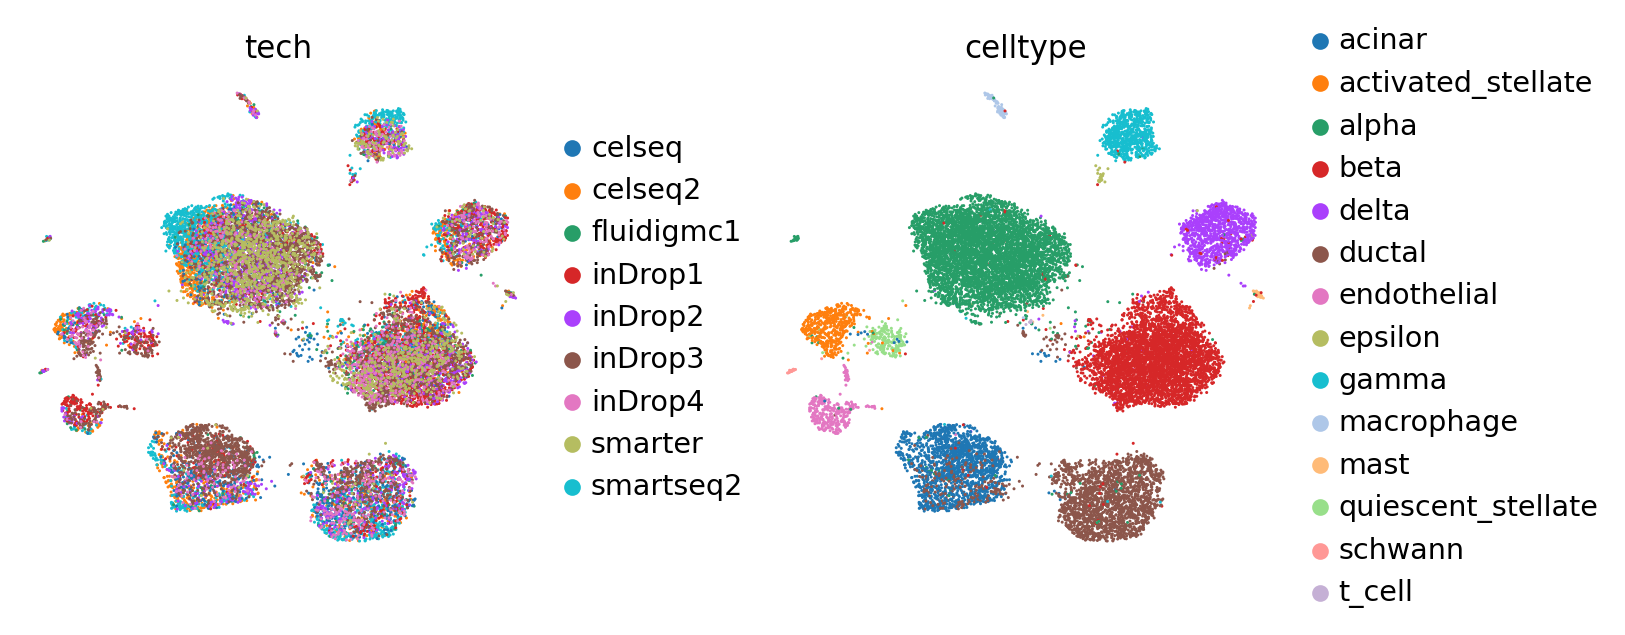

In [35]:
sc.pl.umap(
    adata_full,
    color=["tech", "celltype"],
    frameon=False,
    wspace = 0.3,
    ncols=2,
    save = '_pancreas_clcvae_200epochs.png'
)

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


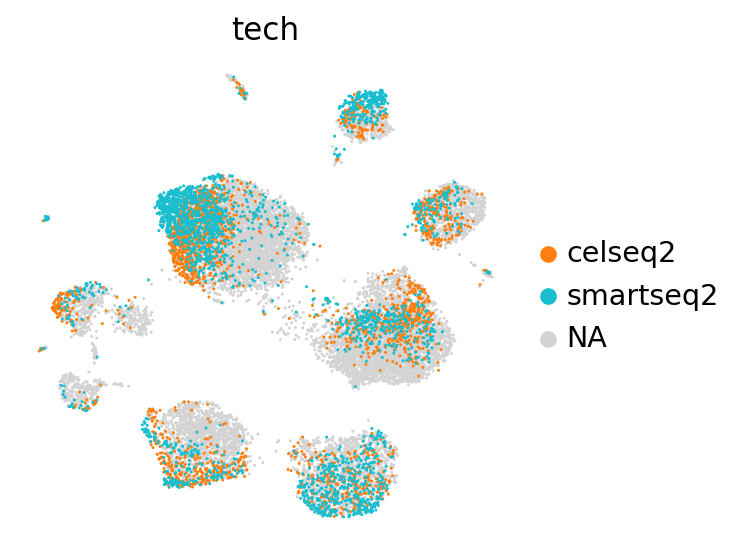

In [36]:
sc.pl.umap(
    adata_full,
    color=["tech"],
    groups = ['celseq2','smartseq2'],
    frameon=False,
    ncols=2,
)

In [37]:
techs = adata_full.obs.tech.cat.categories.tolist()
techs = [x for x in techs if x not in ['celseq2','smartseq2']]

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/otdd/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


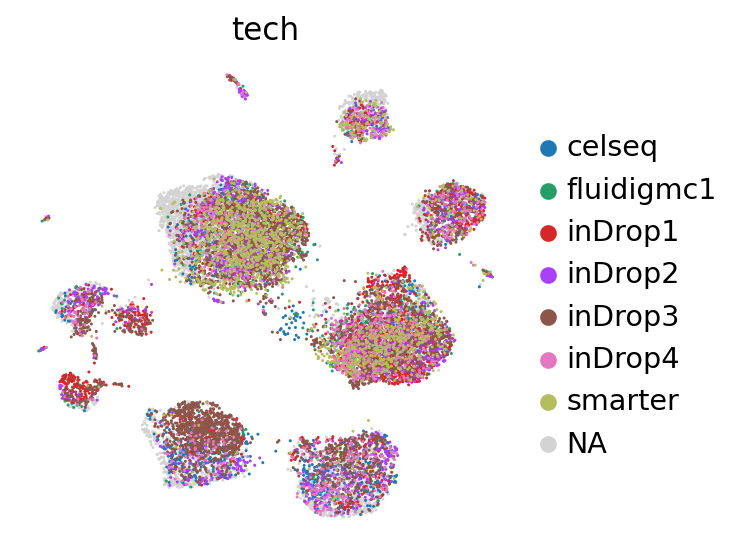

In [38]:
sc.pl.umap(
    adata_full,
    color=["tech"],
    groups = techs,
    frameon=False,
    ncols=2,
)

In [39]:
adata_full.write('../results/pancreas_clcvae_latent_200epochs.h5ad')